In [597]:
# std lib
from getpass import getpass

# standard
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import pandas as pd

from numpy.polynomial import polynomial as P

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc

# others
from dl.helpers.utils import convert
import os

pd.set_option('mode.chained_assignment', None)

In [608]:
print('hi')

hi


In [3]:
# machine learning and other packages

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, PrecisionRecallDisplay, RocCurveDisplay, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.calibration import calibration_curve

import warnings
from pathlib import Path
from typing import Iterable, List, Optional, Union
import matplotlib.lines as mlines
import seaborn as sns

In [4]:
# Login

token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))

Enter user name: (+ENTER)  malinadesai
Enter password: (+ENTER)  ·········


In [5]:
# Importing the UltracoolSheet

sc.put('/Users/malina/Downloads/UltracoolSheet.xlsx','vos://UltracoolSheet')
ultracoolsheet = pd.read_excel(r'UltracoolSheet.xlsx', sheet_name='Main')

In [6]:
# getting desired columns from the UltracoolSheet

ucs = ultracoolsheet[['name', 'ra_j2000_formula', 'dec_j2000_formula', 'pmra_formula', 'r_P1', 'i_P1', 'z_P1', 'y_P1', 'rerr_P1', 'ierr_P1', 'zerr_P1', \
                      'yerr_P1', 'ra_epoch_2mass', 'dec_epoch_2mass', 'J_2MASS', 'H_2MASS', 'Ks_2MASS', 'Jerr_2MASS', 'Herr_2MASS', 'Kserr_2MASS', \
                      'ra_j2000_allwise', 'dec_j2000_allwise', 'W1', 'W2', 'W1err', 'W2err', 'multiple_unresolved_in_this_table', 'sptnumabs_formula', \
                     ]].copy()


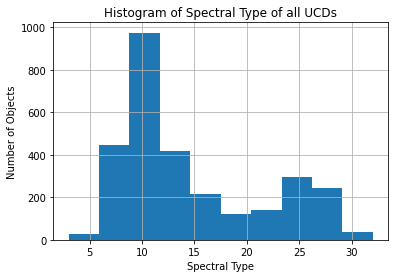

In [7]:
# checking the spectral type

plt.hist(ucs['sptnumabs_formula'])
plt.xlabel('Spectral Type')
plt.ylabel('Number of Objects')
plt.title('Histogram of Spectral Type of all UCDs')
plt.grid()


In [8]:
# see what photometry the t-dwarfs have

tdwarfs = ucs.loc[ucs['sptnumabs_formula'] >= 20]
tdwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 2938
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               738 non-null    object 
 1   ra_j2000_formula                   738 non-null    float64
 2   dec_j2000_formula                  738 non-null    float64
 3   pmra_formula                       659 non-null    float64
 4   r_P1                               0 non-null      float64
 5   i_P1                               17 non-null     float64
 6   z_P1                               276 non-null    float64
 7   y_P1                               377 non-null    float64
 8   rerr_P1                            0 non-null      float64
 9   ierr_P1                            17 non-null     float64
 10  zerr_P1                            276 non-null    float64
 11  yerr_P1                            377 non-null    float6

In [9]:
# coordinate comparision

coords = ultracoolsheet[['name', 'ra_j2000_formula', 'dec_j2000_formula', 'pmra_formula','ra_epoch_2mass', 'dec_epoch_2mass', \
                         'ra_j2000_allwise', 'dec_j2000_allwise']].copy()

In [10]:
# conversions

# convert proper motion from milliarcseconds/yr to arcseconds/yr
coords['pmra_formula'] = coords['pmra_formula'].apply(lambda x: x * 0.001)

# convert ra's and dec's to arcseconds
coords['ra_j2000_formula'] = coords['ra_j2000_formula'].apply(lambda x: x * 3600)
coords['dec_j2000_formula'] = coords['dec_j2000_formula'].apply(lambda x: x * 3600)
coords['ra_epoch_2mass'] = coords['ra_epoch_2mass'].apply(lambda x: x * 3600)
coords['dec_epoch_2mass'] = coords['dec_epoch_2mass'].apply(lambda x: x * 3600)
coords['ra_j2000_allwise'] = coords['ra_j2000_allwise'].apply(lambda x: x * 3600)
coords['dec_j2000_allwise'] = coords['dec_j2000_allwise'].apply(lambda x: x * 3600)


In [11]:
# differences in coordinates: compare these to see if using different coordinates is significant

coords['dec_j20002mass'] = coords['dec_j2000_formula'] - coords['dec_epoch_2mass']
coords['dec_j2000allwise'] = coords['dec_j2000_formula'] - coords['dec_j2000_allwise']
coords['dec_2massallwise'] = coords['dec_epoch_2mass'] - coords['dec_j2000_allwise']
coords['ra_j20002mass'] = (coords['ra_j2000_formula'] - coords['ra_epoch_2mass']) * np.cos(coords['dec_j2000_formula'] * (np.pi/648000))
coords['ra_j2000allwise'] = (coords['ra_j2000_formula'] - coords['ra_j2000_allwise']) * np.cos(coords['dec_j2000_formula'] * (np.pi/648000))
coords['ra_2massallwise'] = (coords['ra_epoch_2mass'] - coords['ra_j2000_allwise']) * np.cos(coords['dec_epoch_2mass'] * (np.pi/648000))
coords

,name,ra_j2000_formula,dec_j2000_formula,pmra_formula,ra_epoch_2mass,dec_epoch_2mass,ra_j2000_allwise,dec_j2000_allwise,dec_j20002mass,dec_j2000allwise,dec_2massallwise,ra_j20002mass,ra_j2000allwise,ra_2massallwise
0,ULAS J000010.43+113602.2,156.24,41767.20,-0.09000,NaN,NaN,1.560640e+02,41767.25868,NaN,-0.05868,NaN,NaN,0.172443,NaN
1,SDSS J000013.54+255418.6,202.68,93259.80,-0.01910,2.031732e+02,93258.0648,NaN,NaN,1.7352,NaN,NaN,-0.443641,NaN,NaN
2,SDSS J000112.18+153535.5,1082.52,56135.52,0.14300,1.082686e+03,56135.5164,1.084135e+03,56133.68112,0.0036,1.83888,1.83528,-0.159505,-1.555867,-1.396362
3,WISEA J000131.93-084126.9,1375.56,-31284.00,0.33990,1.374912e+03,-31283.4960,1.379028e+03,-31287.23568,-0.5040,3.23568,3.73968,0.640561,-3.428070,-4.068632
4,SDSS J000250.98+245413.8,2564.64,89654.04,0.02200,2.564636e+03,89654.1696,2.564772e+03,89653.64868,-0.1296,0.39132,0.52092,0.003265,-0.119835,-0.123100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,SDSS J235841.98+000622.0,1294829.64,381.60,0.12800,1.294830e+06,381.2940,1.294831e+06,381.59460,0.3060,0.00540,-0.30060,0.097200,-1.254238,-1.351438
2936,APMPM J2359-6246,1294843.32,-225942.48,0.59065,1.294843e+06,-225942.3540,1.294857e+06,-225941.55516,-0.1260,-0.92484,-0.79884,0.222438,-6.172565,-6.395010
2937,PSO J359.8867-01.8651,1295592.48,-6712.92,-0.00600,1.295592e+06,-6712.6824,1.295592e+06,-6714.37224,-0.2376,1.45224,1.68984,0.259063,0.082037,-0.177026
2938,WISEP J235941.07-733504.8,1295716.68,-264904.92,0.28100,1.295705e+06,-264905.5032,1.295717e+06,-264905.01144,0.5832,0.09144,-0.49176,3.233143,0.030622,-3.202490


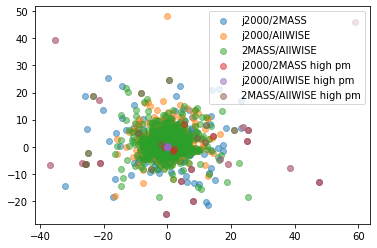

In [12]:
# visualize difference in coordinnates from all 3 surveys

highpm_coords = coords.reindex(coords.pmra_formula.abs().sort_values(ascending = False).index).head(20)

plt.scatter(coords['ra_j20002mass'], coords['dec_j20002mass'], alpha = 0.5, label = 'j2000/2MASS')
plt.scatter(coords['ra_j2000allwise'], coords['dec_j2000allwise'], alpha = 0.5, label = 'j2000/AllWISE')
plt.scatter(coords['ra_2massallwise'], coords['dec_2massallwise'], alpha = 0.5, label = '2MASS/AllWISE')
plt.scatter(highpm_coords['ra_j20002mass'], highpm_coords['dec_j20002mass'], alpha = 0.5, label = 'j2000/2MASS high pm')
plt.scatter(highpm_coords['ra_j2000allwise'], highpm_coords['dec_j2000allwise'], alpha = 0.5, label = 'j2000/AllWISE high pm')
plt.scatter(highpm_coords['ra_2massallwise'], highpm_coords['dec_2massallwise'], alpha = 0.5, label = '2MASS/AllWISE high pm')
plt.legend()

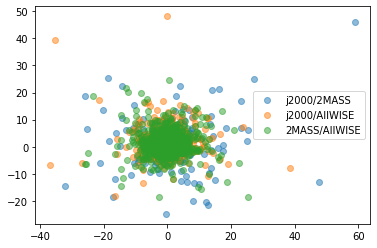

In [13]:
# without labelling high proper motion objects

plt.scatter(coords['ra_j20002mass'], coords['dec_j20002mass'], alpha = 0.5, label = 'j2000/2MASS')
plt.scatter(coords['ra_j2000allwise'], coords['dec_j2000allwise'], alpha = 0.5, label = 'j2000/AllWISE')
plt.scatter(coords['ra_2massallwise'], coords['dec_2massallwise'], alpha = 0.5, label = '2MASS/AllWISE')
plt.legend()

In [14]:
# finds all UC Stars with an ra/dec that returns a DES query result

insearch = []
ra_list = []
dec_list = []
radius = 0.007

for i in range(len(ucs)):
    ra0 = ucs.iloc[i, 1]  # in degrees, right ascension
    ra_list.append(ra0)
    dec0 = ucs.iloc[i, 2] # in degrees, declinarion
    dec_list.append(dec0)
    query = """
    SELECT ra, dec, wavg_mag_psf_r, wavg_mag_psf_i, wavg_mag_psf_z, wavg_mag_psf_y FROM des_dr2.main as dr2,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
      WHERE dr2.EXTENDED_CLASS_COADD <= 1
        AND dr2.IMAFLAGS_ISO_I = 0
        AND dr2.IMAFLAGS_ISO_Z = 0
        AND dr2.FLAGS_I < 4 
        AND dr2.FLAGS_Z < 4
        AND (dr2.MAG_AUTO_I - dr2.MAG_AUTO_Z >= 1 or dr2.WAVG_MAG_PSF_I - dr2.WAVG_MAG_PSF_Z >= 1)
        AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0,dec0,ra0,dec0,radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    if len(sources) >= 1:   # need at least one result 
        insearch.append(True)
    else:
        insearch.append(False)


In [15]:
# create a true/false column with the search results

ucs['DES_Search'] = np.array(insearch)

In [16]:
# take only the columns labelled with 'true' to get all potential matches

des_search = ucs.loc[ucs['DES_Search']==True]
des_search = des_search.reset_index(drop=True)
des_search

,name,ra_j2000_formula,dec_j2000_formula,pmra_formula,r_P1,i_P1,z_P1,y_P1,rerr_P1,ierr_P1,...,Kserr_2MASS,ra_j2000_allwise,dec_j2000_allwise,W1,W2,W1err,W2err,multiple_unresolved_in_this_table,sptnumabs_formula,DES_Search
0,2MASS J00040288-6410358,1.0127,-64.1768,64.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046,1.012502,-64.176769,13.409,12.959,0.024,0.026,N,11.0,True
1,DENIS J0006579-643654,1.7414,-64.6151,86.90,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033,1.742045,-64.615257,11.741,11.421,0.022,0.021,N,10.0,True
2,ULAS J000734.90+011247.1,1.8957,1.2132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.895655,1.213159,17.289,15.874,0.165,0.187,N,27.0,True
3,ULAS J001040.57+010013.1,2.6688,1.0039,47.00,NaN,NaN,20.71,19.99,NaN,NaN,...,NaN,2.669044,1.003637,16.526,16.227,0.085,0.237,N,11.0,True
4,2MASS J00145575-4844171,3.7324,-48.7380,870.73,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030,3.736285,-48.737199,12.267,11.987,0.023,0.022,N,12.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,SDSS J234841.38-004022.1,357.1724,-0.6727,92.00,NaN,21.82,20.29,19.32,NaN,0.06,...,NaN,357.172569,-0.673057,16.069,16.156,0.074,0.284,N,11.5,True
298,WISE J235425.33-564928.6,358.6058,-56.8247,390.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,358.605757,-56.824706,16.835,14.872,0.081,0.054,N,26.0,True
299,ULAS J235715.98+013240.3,359.3166,1.5445,47.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,25.5,True
300,SDSS J235835.45-000909.5,359.6478,-0.1526,-97.00,NaN,21.09,19.55,18.73,NaN,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,10.0,True


In [17]:
# takes the 302 stars in DES field and matches them to DES query

des_mags = pd.DataFrame()
no_of_matches = []

for i in range(len(des_search)):
    ra0 = des_search.iloc[i, 1] # in degrees, right ascension
    dec0 = des_search.iloc[i, 2] # in degrees, declinarion
    query = """
    SELECT ra, dec, wavg_mag_psf_r, wavg_mag_psf_i, wavg_mag_psf_z, wavg_mag_psf_y, wavg_magerr_psf_r, wavg_magerr_psf_i, wavg_magerr_psf_z, wavg_magerr_psf_y
    FROM des_dr2.main as dr2,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
      WHERE dr2.EXTENDED_CLASS_COADD <= 1
        AND dr2.IMAFLAGS_ISO_I = 0
        AND dr2.IMAFLAGS_ISO_Z = 0
        AND dr2.FLAGS_I < 4 
        AND dr2.FLAGS_Z < 4
        AND (dr2.MAG_AUTO_I - dr2.MAG_AUTO_Z >= 1 or dr2.WAVG_MAG_PSF_I - dr2.WAVG_MAG_PSF_Z >= 1)
        AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0,dec0,ra0,dec0,radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_comp'] = (sources['ra'] - ra0) * np.cos(dec0 * (np.pi / 180))       # difference in right ascension  
    sources['dec_comp'] = sources['dec'] - dec0                                     # difference in declination
    closestmatch = sources.head(1)
    no_of_matches.append(len(sources))
    des_mags = pd.concat([des_mags, closestmatch], ignore_index = True)


In [18]:
# matching columns of DES matches to UCS

des_mags['name'] = des_search['name']
des_mags['j2000_ra'] = des_search['ra_j2000_formula']
des_mags['j2000_dec'] = des_search['dec_j2000_formula']
des_mags['r_P1'] = des_search['r_P1']
des_mags['i_P1'] = des_search['i_P1']
des_mags['z_P1'] = des_search['z_P1']
des_mags['y_P1'] = des_search['y_P1']
des_mags['ierr_P1'] = des_search['ierr_P1']
des_mags['zerr_P1'] = des_search['zerr_P1']
des_mags['yerr_P1'] = des_search['yerr_P1']
des_mags['pmra'] = des_search['pmra_formula']
des_mags['spectral_type'] = des_search['sptnumabs_formula']
des_mags['binary'] = des_search['multiple_unresolved_in_this_table']

# replace -99 with NaN
des_mags = des_mags.replace(-99.000000, np.NaN)

# difference in magnitudes
des_mags['r_diff'] = des_mags['r_P1'] - des_mags['wavg_mag_psf_r']
des_mags['i_diff'] = des_mags['i_P1'] - des_mags['wavg_mag_psf_i']
des_mags['z_diff'] = des_mags['z_P1'] - des_mags['wavg_mag_psf_z']
des_mags['y_diff'] = des_mags['y_P1'] - des_mags['wavg_mag_psf_y']

des_mags

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,ierr_P1,zerr_P1,yerr_P1,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818,...,NaN,NaN,NaN,64.00,11.0,N,NaN,NaN,NaN,NaN
1,1.742311,-64.615360,19.942392,17.264570,15.659860,15.111554,0.003207,0.000811,0.000423,0.000699,...,NaN,NaN,NaN,86.90,10.0,N,NaN,NaN,NaN,NaN
2,1.895924,1.213136,NaN,NaN,21.823662,20.577265,NaN,NaN,0.034881,0.042860,...,NaN,NaN,NaN,NaN,27.0,N,NaN,NaN,NaN,NaN
3,2.666957,1.005466,24.037722,23.675348,NaN,NaN,0.251121,0.285420,NaN,NaN,...,NaN,0.16,0.12,47.00,11.0,N,NaN,NaN,NaN,NaN
4,3.735926,-48.737337,23.668186,23.184174,NaN,NaN,0.069855,0.091890,NaN,NaN,...,NaN,NaN,NaN,870.73,12.5,N,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,357.173019,-0.668376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.03,0.04,92.00,11.5,N,NaN,NaN,NaN,NaN
298,358.606541,-56.824933,NaN,NaN,20.677748,19.547394,NaN,NaN,0.018851,0.021544,...,NaN,NaN,NaN,390.00,26.0,N,NaN,NaN,NaN,NaN
299,359.316761,1.544574,NaN,NaN,22.119720,21.036600,NaN,NaN,0.047793,0.070025,...,NaN,NaN,NaN,47.00,25.5,N,NaN,NaN,NaN,NaN
300,359.647526,-0.154361,24.022510,23.454973,NaN,NaN,0.246901,0.211333,NaN,NaN,...,0.04,0.02,0.02,-97.00,10.0,N,NaN,-2.364973,NaN,NaN


In [19]:
# converting to arc seconds

des_mags['dec_comp'] = des_mags['dec_comp'].apply(lambda x: x*3600)
des_mags['ra_comp'] = des_mags['ra_comp'].apply(lambda x: x*3600)

In [20]:
# high proper motion objects - top 20
highpmra = des_mags.reindex(des_mags.pmra.abs().sort_values(ascending = False).index).head(20)

# unresolved binary objects - 16 total
binaries = des_mags[des_mags.binary != 'N']

In [21]:
# statistics

ra_comp_array = des_mags['ra_comp'].to_numpy()
dec_comp_array = des_mags['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
ra_comp_array = [x for x in ra_comp_array if (x <= 12 and x >= -12)]
ra_comp_array = np.asarray(ra_comp_array)
dec_comp_array = [x for x in dec_comp_array  if (x <= 12 and x >= -12)]
dec_comp_array = np.asarray(dec_comp_array )

mu_ra = ra_comp_array.mean()
mu_dec = dec_comp_array.mean()
sigma_ra = ra_comp_array.std()
sigma_dec = dec_comp_array.std()
sigma_pos = np.sqrt(sigma_ra**2 + sigma_dec**2)

In [22]:
des_mags.columns

Index(['ra', 'dec', 'wavg_mag_psf_r', 'wavg_mag_psf_i', 'wavg_mag_psf_z',
       'wavg_mag_psf_y', 'wavg_magerr_psf_r', 'wavg_magerr_psf_i',
       'wavg_magerr_psf_z', 'wavg_magerr_psf_y', 'ra_comp', 'dec_comp', 'name',
       'j2000_ra', 'j2000_dec', 'r_P1', 'i_P1', 'z_P1', 'y_P1', 'ierr_P1',
       'zerr_P1', 'yerr_P1', 'pmra', 'spectral_type', 'binary', 'r_diff',
       'i_diff', 'z_diff', 'y_diff'],
      dtype='object')

In [23]:
# flag 3 sigma outliers

upper_ra, lower_ra = mu_ra + 3*sigma_pos, mu_ra - 3*sigma_pos
upper_dec, lower_dec = mu_dec + 3*sigma_pos, mu_dec - 3*sigma_pos
sigma_flag = []

for i in range(len(des_mags)):
    if des_mags.iloc[i, 10] >= upper_ra:
        sigma_flag.append(True)
    elif des_mags.iloc[i, 11] >= upper_dec:
        sigma_flag.append(True)
    elif des_mags.iloc[i, 10] <= lower_ra:
        sigma_flag.append(True)
    elif des_mags.iloc[i, 11] <= lower_dec:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
des_mags['sigma_3'] = np.array(sigma_flag)
des_mags_3sigma = des_mags.loc[des_mags['sigma_3']==True]
des_mags

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,zerr_P1,yerr_P1,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818,...,NaN,NaN,64.00,11.0,N,NaN,NaN,NaN,NaN,False
1,1.742311,-64.615360,19.942392,17.264570,15.659860,15.111554,0.003207,0.000811,0.000423,0.000699,...,NaN,NaN,86.90,10.0,N,NaN,NaN,NaN,NaN,False
2,1.895924,1.213136,NaN,NaN,21.823662,20.577265,NaN,NaN,0.034881,0.042860,...,NaN,NaN,NaN,27.0,N,NaN,NaN,NaN,NaN,False
3,2.666957,1.005466,24.037722,23.675348,NaN,NaN,0.251121,0.285420,NaN,NaN,...,0.16,0.12,47.00,11.0,N,NaN,NaN,NaN,NaN,False
4,3.735926,-48.737337,23.668186,23.184174,NaN,NaN,0.069855,0.091890,NaN,NaN,...,NaN,NaN,870.73,12.5,N,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,357.173019,-0.668376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.04,92.00,11.5,N,NaN,NaN,NaN,NaN,False
298,358.606541,-56.824933,NaN,NaN,20.677748,19.547394,NaN,NaN,0.018851,0.021544,...,NaN,NaN,390.00,26.0,N,NaN,NaN,NaN,NaN,False
299,359.316761,1.544574,NaN,NaN,22.119720,21.036600,NaN,NaN,0.047793,0.070025,...,NaN,NaN,47.00,25.5,N,NaN,NaN,NaN,NaN,False
300,359.647526,-0.154361,24.022510,23.454973,NaN,NaN,0.246901,0.211333,NaN,NaN,...,0.02,0.02,-97.00,10.0,N,NaN,-2.364973,NaN,NaN,False


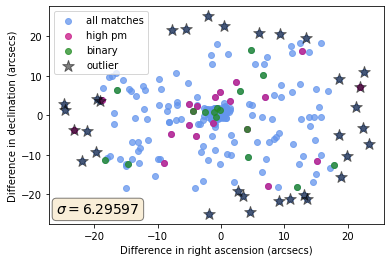

In [24]:
# plot separation in right ascention and declination for closest coordinate matches

textstr = ''r'$\sigma=%.5f$' % (sigma_pos, )

plt.scatter(des_mags['dec_comp'].values, des_mags['ra_comp'].values, alpha = 0.75, color = 'cornflowerblue', label = 'all matches')
plt.scatter(highpmra['dec_comp'].values, highpmra['ra_comp'].values, alpha = 0.75, color = 'mediumvioletred', label = 'high pm')
plt.scatter(binaries['dec_comp'].values, binaries['ra_comp'].values, alpha = 0.75, color = 'forestgreen', label = 'binary')
plt.scatter(des_mags_3sigma['dec_comp'].values, des_mags_3sigma['ra_comp'].values, 150, alpha = 0.5, \
            color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
#plt.title('Coordinate Accuracy Between DES and UltracoolSheet ', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-26, -22, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('coordaccuracydesucs.png')

In [25]:
# need to convert to radians from degrees (1" × π/(180))

des_mags['ra'] = des_mags['ra'].apply(lambda x: x * (np.pi/180))
des_mags['dec'] = des_mags['dec'].apply(lambda x: x * (np.pi/180))
des_mags['j2000_ra'] = des_mags['j2000_ra'].apply(lambda x: x * (np.pi/180))
des_mags['j2000_dec'] = des_mags['j2000_dec'].apply(lambda x: x * (np.pi/180))

In [26]:
# calculate radial and angular separation

ang_dis_list = []

for i in range(len(des_mags)):
    ra_des = des_mags.iloc[i, 0]      # in radians, right ascension of DES
    dec_des = des_mags.iloc[i, 1]     # in radians, declinarion of DES
    ra_ucs = des_mags.iloc[i, 13]     # in radians, declinarion of UCS
    dec_ucs = des_mags.iloc[i, 14]    # in radians, declinarion of UCS
    ang_dis = np.arccos(np.sin(dec_ucs)*np.sin(dec_des) + np.cos(dec_ucs)*np.cos(dec_des)*np.cos(ra_ucs - ra_des))
    ang_dis_list.append(ang_dis)

des_mags['angular_sep'] = np.array(ang_dis_list)

# convert angular separation from radians to arcseconds
des_mags['angular_sep'] = des_mags['angular_sep'].apply(lambda x: x * (648000/ np.pi))

# convert ra, and dec from radians back to degrees
des_mags['j2000_dec'] = des_mags['j2000_dec'].apply(lambda x: x * (180/ np.pi))
des_mags['j2000_ra'] = des_mags['j2000_ra'].apply(lambda x: x * (180/ np.pi))
des_mags['dec'] = des_mags['dec'].apply(lambda x: x * (180/ np.pi))
des_mags['ra'] = des_mags['ra'].apply(lambda x: x * (180/ np.pi))

In [27]:
# statistics

ang_array = des_mags['angular_sep'].to_numpy()

# manually get rid of outliers: +/- 15
ang_array = [x for x in ang_array if (x <= 15 and x >= -15)]
ang_array = np.asarray(ang_array)

mu_ang = ang_array.mean()
sigma_ang = ang_array.std()


In [28]:
des_mags.columns.get_loc('angular_sep')

30

In [29]:
# flag 3 sigma outliers for angular separation:

upper_ang, lower_ang = mu_ang + 3*sigma_ang, mu_ang - 3*sigma_ang
sigma_flag = []

for i in range(len(des_mags)):
    if des_mags.iloc[i, 30] >= upper_ang:
        sigma_flag.append(True)
    elif des_mags.iloc[i, 30] <= lower_ang:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
des_mags['sigma_3ang'] = np.array(sigma_flag)
des_mags

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818,...,64.00,11.0,N,NaN,NaN,NaN,NaN,False,0.317711,False
1,1.742311,-64.615360,19.942392,17.264570,15.659860,15.111554,0.003207,0.000811,0.000423,0.000699,...,86.90,10.0,N,NaN,NaN,NaN,NaN,False,1.689018,False
2,1.895924,1.213136,NaN,NaN,21.823662,20.577265,NaN,NaN,0.034881,0.042860,...,NaN,27.0,N,NaN,NaN,NaN,NaN,False,0.838497,False
3,2.666957,1.005466,24.037722,23.675348,NaN,NaN,0.251121,0.285420,NaN,NaN,...,47.00,11.0,N,NaN,NaN,NaN,NaN,False,8.705721,False
4,3.735926,-48.737337,23.668186,23.184174,NaN,NaN,0.069855,0.091890,NaN,NaN,...,870.73,12.5,N,NaN,NaN,NaN,NaN,False,8.705129,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,357.173019,-0.668376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.00,11.5,N,NaN,NaN,NaN,NaN,False,15.725072,False
298,358.606541,-56.824933,NaN,NaN,20.677748,19.547394,NaN,NaN,0.018851,0.021544,...,390.00,26.0,N,NaN,NaN,NaN,NaN,False,1.683550,False
299,359.316761,1.544574,NaN,NaN,22.119720,21.036600,NaN,NaN,0.047793,0.070025,...,47.00,25.5,N,NaN,NaN,NaN,NaN,False,0.637700,False
300,359.647526,-0.154361,24.022510,23.454973,NaN,NaN,0.246901,0.211333,NaN,NaN,...,-97.00,10.0,N,NaN,-2.364973,NaN,NaN,False,6.415880,False


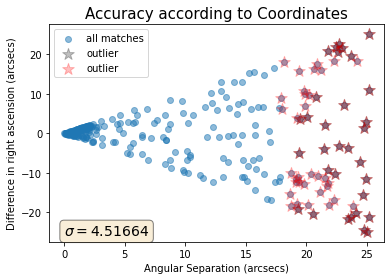

In [30]:
# plot separation in right ascention and declination for closest coordinate matches

des_mags_3sigma = des_mags.loc[des_mags['sigma_3']==True]
des_mags_3sigma_ang = des_mags.loc[des_mags['sigma_3ang']==True]

textstr = ''r'$\sigma=%.5f$' % (sigma_ang, )

plt.scatter(des_mags['angular_sep'].values, des_mags['ra_comp'].values, alpha = 0.5, label = 'all matches')
plt.scatter(des_mags_3sigma['angular_sep'].values, des_mags_3sigma['ra_comp'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
plt.scatter(des_mags_3sigma_ang['angular_sep'].values, des_mags_3sigma_ang['ra_comp'].values, 150, alpha = 0.25, \
            color = 'r', marker= '*', label = 'outlier')
plt.xlabel('Angular Separation (arcsecs)')
plt.ylabel('Difference in right ascension (arcsecs)')
plt.title('Accuracy according to Coordinates', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-0.0001, -23, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [31]:
# comparing DES magnitudes to the original ones in the sheet - there are very few objects with complete data, most in the z-band, y-band

comparisonmags_z = des_mags.copy()
comparisonmags_z = comparisonmags_z[comparisonmags_z['z_diff'].notna()]
comparisonmags_z

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,-33.5,11.0,N,0.432742,0.487024,0.547305,0.092830,False,0.804628,False
16,5.539349,-1.177579,21.936010,19.327848,17.805836,17.341230,0.012653,0.002216,0.001219,0.002712,...,116.3,10.0,N,NaN,0.442152,0.504164,0.088770,False,2.130136,False
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,10.3,9.5,N,-0.278687,0.430611,0.547234,0.128399,False,0.104457,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,98.2,11.0,N,0.111762,0.528675,0.547025,0.019914,False,1.609696,False
34,11.014324,2.469513,23.827797,21.602148,20.050516,19.511297,0.115728,0.018050,0.008203,0.021189,...,105.0,17.0,N,NaN,0.207852,0.459484,0.078703,False,2.149280,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,351.883753,1.047916,NaN,22.421238,20.735980,20.101490,NaN,0.032769,0.013626,0.034480,...,-60.0,14.0,N,NaN,0.358762,0.694020,0.268510,False,0.683657,False
291,354.066735,0.714808,23.137613,20.478704,18.882511,18.371986,0.047207,0.006513,0.003090,0.006026,...,14.0,10.0,N,NaN,0.491296,0.547489,0.058014,False,0.354370,False
293,356.029159,1.254371,22.711845,20.271175,18.783188,18.274845,0.026288,0.004554,0.002776,0.005966,...,122.0,13.0,N,NaN,0.488825,0.546812,0.115155,False,2.028089,False
294,356.413036,0.920224,20.288544,17.526035,15.948458,15.440567,0.003564,0.000711,0.000370,0.000908,...,93.1,9.0,N,0.421456,0.463965,0.531542,0.099433,False,1.857486,False


In [32]:
# statistics on mag spread

z_diff_array = comparisonmags_z['z_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 1
z_diff_array = [x for x in z_diff_array if (x <= 1 and x >= -1)]
z_diff_array = np.asarray(z_diff_array)

mu_z = z_diff_array.mean()
sigma_z = z_diff_array.std()

upper_z, lower_z = mu_z + 3*sigma_z, mu_z - 3*sigma_z

In [33]:
comparisonmags_z.columns.get_loc('z_diff')

27

In [34]:
# flag 3 sigma

sigma_flag3 = []

for i in range(len(comparisonmags_z)):
    if comparisonmags_z.iloc[i, 27] >= upper_z:
        sigma_flag3.append(True)
    elif comparisonmags_z.iloc[i, 27] <= lower_z:
        sigma_flag3.append(True)
    else:
        sigma_flag3.append(False)

comparisonmags_z['sigma_3z'] = np.array(sigma_flag3)
comparisonmags_z

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang,sigma_3z
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,11.0,N,0.432742,0.487024,0.547305,0.092830,False,0.804628,False,False
16,5.539349,-1.177579,21.936010,19.327848,17.805836,17.341230,0.012653,0.002216,0.001219,0.002712,...,10.0,N,NaN,0.442152,0.504164,0.088770,False,2.130136,False,False
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,9.5,N,-0.278687,0.430611,0.547234,0.128399,False,0.104457,False,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,11.0,N,0.111762,0.528675,0.547025,0.019914,False,1.609696,False,False
34,11.014324,2.469513,23.827797,21.602148,20.050516,19.511297,0.115728,0.018050,0.008203,0.021189,...,17.0,N,NaN,0.207852,0.459484,0.078703,False,2.149280,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,351.883753,1.047916,NaN,22.421238,20.735980,20.101490,NaN,0.032769,0.013626,0.034480,...,14.0,N,NaN,0.358762,0.694020,0.268510,False,0.683657,False,False
291,354.066735,0.714808,23.137613,20.478704,18.882511,18.371986,0.047207,0.006513,0.003090,0.006026,...,10.0,N,NaN,0.491296,0.547489,0.058014,False,0.354370,False,False
293,356.029159,1.254371,22.711845,20.271175,18.783188,18.274845,0.026288,0.004554,0.002776,0.005966,...,13.0,N,NaN,0.488825,0.546812,0.115155,False,2.028089,False,False
294,356.413036,0.920224,20.288544,17.526035,15.948458,15.440567,0.003564,0.000711,0.000370,0.000908,...,9.0,N,0.421456,0.463965,0.531542,0.099433,False,1.857486,False,False


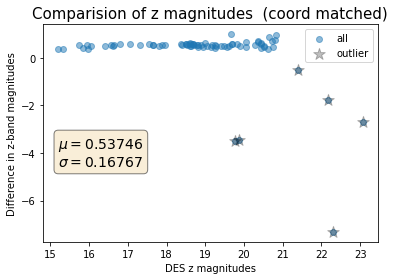

In [35]:
# compare z-band magnitudes from UCS with DES

comparisonmags_z_3sigmaz = comparisonmags_z.loc[comparisonmags_z['sigma_3z']==True]

y = comparisonmags_z['z_diff']
x = comparisonmags_z['wavg_mag_psf_z']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_z, ),
    r'$\sigma=%.5f$' % (sigma_z, )))

plt.xlabel('DES z magnitudes')
plt.ylabel('Difference in z-band magnitudes')
plt.title('Comparision of z magnitudes  (coord matched)', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_z_3sigmaz['wavg_mag_psf_z'].values, comparisonmags_z_3sigmaz['z_diff'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(15.2, -3.3, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [36]:
# comparing DES magnitudes to the original ones in the sheet - i band

comparisonmags_i = des_mags.copy()
comparisonmags_i = comparisonmags_i[comparisonmags_i['i_diff'].notna()]
comparisonmags_i

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,-33.5,11.0,N,0.432742,0.487024,0.547305,0.092830,False,0.804628,False
16,5.539349,-1.177579,21.936010,19.327848,17.805836,17.341230,0.012653,0.002216,0.001219,0.002712,...,116.3,10.0,N,NaN,0.442152,0.504164,0.088770,False,2.130136,False
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,10.3,9.5,N,-0.278687,0.430611,0.547234,0.128399,False,0.104457,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,98.2,11.0,N,0.111762,0.528675,0.547025,0.019914,False,1.609696,False
34,11.014324,2.469513,23.827797,21.602148,20.050516,19.511297,0.115728,0.018050,0.008203,0.021189,...,105.0,17.0,N,NaN,0.207852,0.459484,0.078703,False,2.149280,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,354.066735,0.714808,23.137613,20.478704,18.882511,18.371986,0.047207,0.006513,0.003090,0.006026,...,14.0,10.0,N,NaN,0.491296,0.547489,0.058014,False,0.354370,False
293,356.029159,1.254371,22.711845,20.271175,18.783188,18.274845,0.026288,0.004554,0.002776,0.005966,...,122.0,13.0,N,NaN,0.488825,0.546812,0.115155,False,2.028089,False
294,356.413036,0.920224,20.288544,17.526035,15.948458,15.440567,0.003564,0.000711,0.000370,0.000908,...,93.1,9.0,N,0.421456,0.463965,0.531542,0.099433,False,1.857486,False
295,356.999173,-0.263156,23.324759,20.400578,18.951616,18.533712,0.051839,0.005045,0.002780,0.006658,...,28.4,10.0,N,-0.324759,0.459422,0.458384,0.046288,False,0.838610,False


In [37]:
# statistics on mag spread

i_diff_array = comparisonmags_i['i_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 1
i_diff_array = [x for x in i_diff_array if (x <= 1 and x >= -1)]
i_diff_array = np.asarray(i_diff_array)

mu_i = i_diff_array.mean()
sigma_i = i_diff_array.std()

upper_i, lower_i = mu_i + 3*sigma_i, mu_i - 3*sigma_i

In [38]:
comparisonmags_i.columns.get_loc('i_diff')

26

In [39]:
# flag 3 sigma

sigma_flag = []

for i in range(len(comparisonmags_i)):
    if comparisonmags_i.iloc[i, 26] >= upper_i:
        sigma_flag.append(True)
    elif comparisonmags_i.iloc[i, 26] <= lower_i:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)

comparisonmags_i['sigma_3i'] = np.array(sigma_flag)

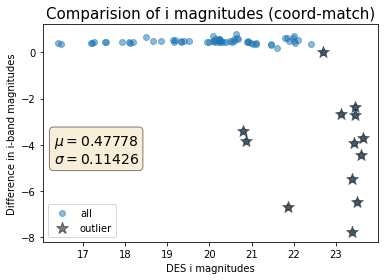

In [40]:
# compare i-band magnitudes from UCS with DES

comparisonmags_i_3sigma = comparisonmags_i.loc[comparisonmags_i['sigma_3i']==True]

y = comparisonmags_i['i_diff']
x = comparisonmags_i['wavg_mag_psf_i']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_i, ),
    r'$\sigma=%.5f$' % (sigma_i, )))

plt.xlabel('DES i magnitudes')
plt.ylabel('Difference in i-band magnitudes')
plt.title('Comparision of i magnitudes (coord-match)', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_i_3sigma['wavg_mag_psf_i'].values, comparisonmags_i_3sigma['i_diff'].values, 150, \
            alpha = 0.5, color = 'k', marker = '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(16.3, -3.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [41]:
# comparing DES magnitudes to the original ones in the sheet - r band

comparisonmags_r = des_mags.copy()
comparisonmags_r = comparisonmags_r[comparisonmags_r['r_diff'].notna()]
comparisonmags_r

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,-33.50,11.0,N,0.432742,0.487024,0.547305,0.092830,False,0.804628,False
17,6.103404,-1.979070,23.852380,NaN,NaN,NaN,0.133633,NaN,NaN,NaN,...,-77.20,9.5,N,-5.292380,NaN,NaN,NaN,True,24.900591,True
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,10.30,9.5,N,-0.278687,0.430611,0.547234,0.128399,False,0.104457,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,98.20,11.0,N,0.111762,0.528675,0.547025,0.019914,False,1.609696,False
36,11.565060,2.866338,20.792824,18.196533,16.641771,16.150927,0.006158,0.001142,0.000677,0.001351,...,95.10,9.7,N,0.507176,0.463467,0.538229,0.089073,False,2.613202,False
37,12.357942,-6.597361,23.839092,NaN,NaN,NaN,0.275371,NaN,NaN,NaN,...,-102.60,8.5,N,-3.649092,NaN,NaN,NaN,False,11.472683,False
41,13.228173,-27.099528,19.865374,17.267017,15.747114,15.269650,0.002824,0.000722,0.000400,0.000878,...,50.50,8.0,N,0.354626,0.452983,0.522886,0.070350,False,1.599662,False
50,16.816845,-15.299260,19.043943,16.407341,15.198553,14.840422,0.001867,0.000501,0.000525,0.001111,...,-30.10,7.0,N,0.396057,0.402659,0.391447,0.049578,False,0.737366,False
57,19.227374,-13.960142,20.563538,17.918947,16.418690,15.952736,0.003914,0.000879,0.000496,0.001135,...,-9.40,9.0,N,0.426462,0.451053,0.511310,0.067264,False,2.672743,False
70,23.511629,5.136971,22.307564,19.954689,18.496838,18.027025,0.042573,0.008362,0.004085,0.011803,...,-33.00,11.0,N,0.502436,0.465311,0.563162,0.032975,False,0.147372,False


In [42]:
# statistics on mag spread

r_diff_array = comparisonmags_r['r_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 1
r_diff_array = [x for x in r_diff_array if (x <= 1 and x >= -1)]
r_diff_array = np.asarray(r_diff_array)

mu_r = r_diff_array.mean()
sigma_r = r_diff_array.std()

upper_r, lower_r = mu_r + 3*sigma_r, mu_r - 3*sigma_r

In [43]:
comparisonmags_r.columns.get_loc('r_diff')

25

In [44]:
# flag 3 sigma

sigma_flag = []

for i in range(len(comparisonmags_r)):
    if comparisonmags_r.iloc[i, 25] >= upper_r:
        sigma_flag.append(True)
    elif comparisonmags_r.iloc[i, 25] <= lower_r:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)

comparisonmags_r['sigma_3r'] = np.array(sigma_flag)

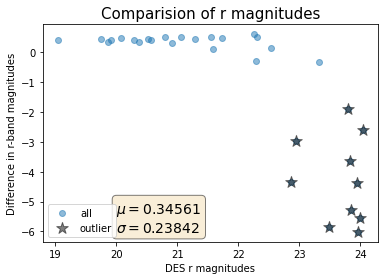

In [45]:
# compare r-band magnitudes from UCS with DES

comparisonmags_r_3sigma = comparisonmags_r.loc[comparisonmags_r['sigma_3r']==True]

y = comparisonmags_r['r_diff']
x = comparisonmags_r['wavg_mag_psf_r']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_r, ),
    r'$\sigma=%.5f$' % (sigma_r, )))

plt.xlabel('DES r magnitudes')
plt.ylabel('Difference in r-band magnitudes')
plt.title('Comparision of r magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_r_3sigma['wavg_mag_psf_r'].values, comparisonmags_r_3sigma['r_diff'].values, 150, \
            alpha = 0.5, color = 'k', marker = '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(20, -5., textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [46]:
# comparing DES magnitudes to the original ones in the sheet - y band

comparisonmags_y = des_mags.copy()
comparisonmags_y = comparisonmags_y[comparisonmags_y['y_diff'].notna()]
comparisonmags_y

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,pmra,spectral_type,binary,r_diff,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,-33.5,11.0,N,0.432742,0.487024,0.547305,0.092830,False,0.804628,False
16,5.539349,-1.177579,21.936010,19.327848,17.805836,17.341230,0.012653,0.002216,0.001219,0.002712,...,116.3,10.0,N,NaN,0.442152,0.504164,0.088770,False,2.130136,False
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,10.3,9.5,N,-0.278687,0.430611,0.547234,0.128399,False,0.104457,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,98.2,11.0,N,0.111762,0.528675,0.547025,0.019914,False,1.609696,False
34,11.014324,2.469513,23.827797,21.602148,20.050516,19.511297,0.115728,0.018050,0.008203,0.021189,...,105.0,17.0,N,NaN,0.207852,0.459484,0.078703,False,2.149280,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,354.066735,0.714808,23.137613,20.478704,18.882511,18.371986,0.047207,0.006513,0.003090,0.006026,...,14.0,10.0,N,NaN,0.491296,0.547489,0.058014,False,0.354370,False
293,356.029159,1.254371,22.711845,20.271175,18.783188,18.274845,0.026288,0.004554,0.002776,0.005966,...,122.0,13.0,N,NaN,0.488825,0.546812,0.115155,False,2.028089,False
294,356.413036,0.920224,20.288544,17.526035,15.948458,15.440567,0.003564,0.000711,0.000370,0.000908,...,93.1,9.0,N,0.421456,0.463965,0.531542,0.099433,False,1.857486,False
295,356.999173,-0.263156,23.324759,20.400578,18.951616,18.533712,0.051839,0.005045,0.002780,0.006658,...,28.4,10.0,N,-0.324759,0.459422,0.458384,0.046288,False,0.838610,False


In [47]:
# statistics on mag spread

y_diff_array = comparisonmags_y['y_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 1
y_diff_array = [x for x in y_diff_array if (x <= 1 and x >= -1)]
y_diff_array = np.asarray(y_diff_array)

mu_y = y_diff_array.mean()
sigma_y = y_diff_array.std()

upper_y, lower_y = mu_y + 3*sigma_y, mu_y - 3*sigma_y

In [48]:
comparisonmags_y.columns.get_loc('y_diff')

28

In [49]:
# flag 3 sigma

sigma_flag = []

for i in range(len(comparisonmags_y)):
    if comparisonmags_y.iloc[i, 28] >= upper_y:
        sigma_flag.append(True)
    elif comparisonmags_y.iloc[i, 28] <= lower_y:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)

comparisonmags_y['sigma_3y'] = np.array(sigma_flag)

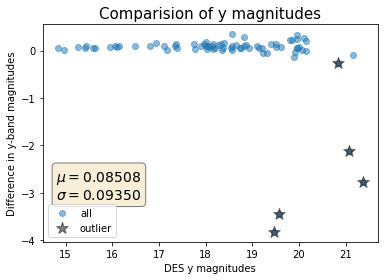

In [50]:
# compare y-band magnitudes from UCS with DES

comparisonmags_y_3sigma = comparisonmags_y.loc[comparisonmags_y['sigma_3y']==True]

y = comparisonmags_y['y_diff']
x = comparisonmags_y['wavg_mag_psf_y']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_y, ),
    r'$\sigma=%.5f$' % (sigma_y, )))

plt.xlabel('DES y magnitudes')
plt.ylabel('Difference in y-band magnitudes')
plt.title('Comparision of y magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_y_3sigma['wavg_mag_psf_y'].values, comparisonmags_y_3sigma['y_diff'].values, 150, \
            alpha = 0.5, color = 'k', marker = '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(14.8, -2.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

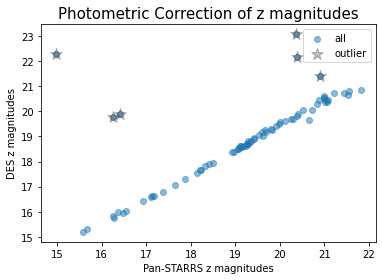

In [51]:
# visualizing the difference between DES and PS magnitudes

x = comparisonmags_z['z_P1']
y = comparisonmags_z['wavg_mag_psf_z']


plt.ylabel('DES z magnitudes')
plt.xlabel('Pan-STARRS z magnitudes')
plt.title('Photometric Correction of z magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_z_3sigmaz['z_P1'].values, comparisonmags_z_3sigmaz['wavg_mag_psf_z'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')

plt.legend()

In [52]:
correctionz = comparisonmags_z.loc[comparisonmags_z['sigma_3z'] == False]
correctionz['z-y'] = correctionz['z_P1'] - correctionz['y_P1']
correctionz['i-z'] = correctionz['i_P1'] - correctionz['z_P1']

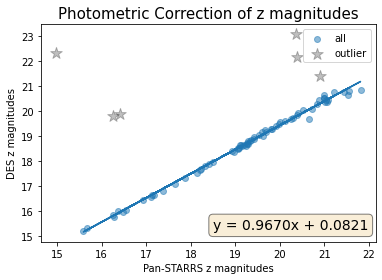

In [53]:
# making the color correction - z band

x = correctionz['z_P1']
y = correctionz['wavg_mag_psf_z']

az, bz = np.polyfit(x, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(az, bz)

plt.ylabel('DES z magnitudes')
plt.xlabel('Pan-STARRS z magnitudes')
plt.title('Photometric Correction of z magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_z_3sigmaz['z_P1'].values, comparisonmags_z_3sigmaz['wavg_mag_psf_z'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
plt.plot(x, az*x + bz) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(18.5, 15.7, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

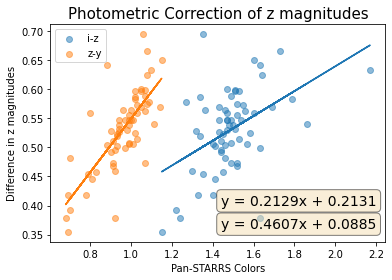

In [54]:
# making the color correction - z band

correctionz = correctionz[correctionz['i-z'].notna()]

x = correctionz['i-z']
x2 = correctionz['z-y']
y = correctionz['z_diff']

azc, bzc = np.polyfit(x, y, 1)
azc2, bzc2 = np.polyfit(x2, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(azc, bzc)
textstr2 = 'y = {:.4f}x + {:.4f}'.format(azc2, bzc2)

plt.ylabel('Difference in z magnitudes')
plt.xlabel('Pan-STARRS Colors')
plt.title('Photometric Correction of z magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(x, y, alpha = 0.5, label = 'i-z')
plt.plot(x, azc*x + bzc)
plt.text(1.44, 0.42, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.show

plt.scatter(x2, y, alpha = 0.5, label = 'z-y')
plt.plot(x2, azc2*x2 + bzc2) 
plt.text(1.44, 0.38, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.show()

In [55]:
# calculate standard deviations

zy_array = correctionz['z-y'].to_numpy()
zy_array = np.asarray(zy_array)
sigma_zy = zy_array.std()

iz_array = correctionz['i-z'].to_numpy()
iz_array = np.asarray(iz_array)
sigma_iz = iz_array.std()

print(sigma_zy, sigma_iz)

0.11394946124406649 0.15287420168867644


In [56]:
# get a bigger sample

correctionz2 = comparisonmags_z.loc[comparisonmags_z['sigma_3z'] == False]
correctionz2['z-y'] = correctionz2['z_P1'] - correctionz2['y_P1']
correctionz2 = correctionz2[correctionz2['z-y'].notna()]

In [57]:
# standard deviation: 

zy_array2 = correctionz2['z-y'].to_numpy()
zdiff_array = correctionz2['z_diff'].to_numpy()
sigma_zy2 = zy_array2.std()
sigma_zdiff = zdiff_array.std()
sigma_zy2diff = np.sqrt(sigma_zy2 ** 2 + sigma_zdiff ** 2)

[0.17934739] [0.00256211]


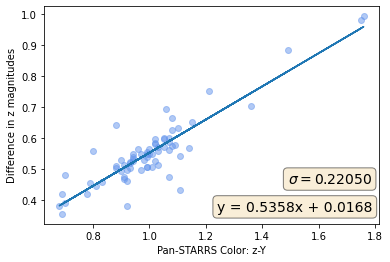

In [489]:
# plot best fit color

y = correctionz2['z_diff']
x = correctionz2['z-y']
x2 = correctionz['z-y']

az_final, bz_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

zcorr_mse = 1/(len(y)) * residual
print(residual, zcorr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(az_final, bz_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_zy2diff, )

plt.ylabel('Difference in z magnitudes')
plt.xlabel('Pan-STARRS Color: z-Y')
#plt.title('Photometric Correction of z magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'z-y')
plt.plot(x, az_final*x + bz_final) 
#plt.plot(x2, azc2*x2 + bzc2, label = 'previous fit') 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.24, 0.4, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(1.49, 0.49, textstr2, fontsize=14, verticalalignment='top', bbox=props)
#plt.legend()
plt.savefig('zmagcorrdes.png')

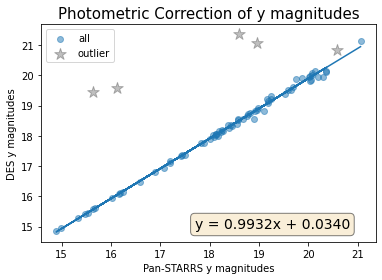

In [59]:
# making the color correction - y band

correctiony = comparisonmags_y.loc[comparisonmags_y['sigma_3y'] == False]

x = correctiony['y_P1']
y = correctiony['wavg_mag_psf_y']

ay, by = np.polyfit(x, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(ay, by)

plt.ylabel('DES y magnitudes')
plt.xlabel('Pan-STARRS y magnitudes')
plt.title('Photometric Correction of y magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_y_3sigma['y_P1'].values, comparisonmags_y_3sigma['wavg_mag_psf_y'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
plt.plot(x, ay*x + by) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(17.7, 15.3, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()


In [60]:
# making the color columns

correctiony['z-y'] = correctiony['z_P1'] - correctiony['y_P1']
correctiony['i-z'] = correctiony['i_P1'] - correctiony['z_P1']
correctiony = correctiony[correctiony['i-z'].notna()]

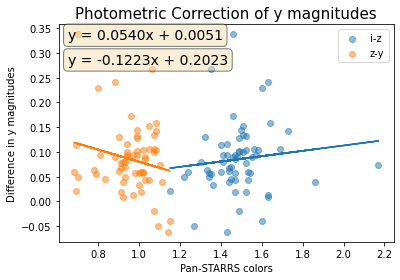

In [61]:
# correction in y

x = correctiony['i-z']
x2 = correctiony['z-y']
y = correctiony['y_diff']

ayc, byc = np.polyfit(x, y, 1)
ayc2, byc2 = np.polyfit(x2, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(ayc, byc)
textstr2 = 'y = {:.4f}x + {:.4f}'.format(ayc2, byc2)

plt.ylabel('Difference in y magnitudes')
plt.xlabel('Pan-STARRS colors')
plt.title('Photometric Correction of y magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(x, y, alpha = 0.5, label = 'i-z')
plt.plot(x, ayc*x + byc) 
plt.text(0.65, 0.35, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.scatter(x2, y, alpha = 0.5, label = 'z-y')
plt.plot(x2, ayc2*x2 + byc2) 
plt.text(0.65, 0.3, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [62]:
# standard deviations

zyy_array = correctiony['z-y'].to_numpy()
zyy_array = np.asarray(zyy_array)
sigma_zyy = zyy_array.std()

izy_array = correctiony['i-z'].to_numpy()
izy_array = np.asarray(izy_array)
sigma_izy = izy_array.std()

print(sigma_zyy, sigma_izy)

0.1145979943636658 0.14920810739773968


In [63]:
# bigger sample

correctiony2 = comparisonmags_y.loc[comparisonmags_y['sigma_3y'] == False]
correctiony2['z-y'] = correctiony2['z_P1'] - correctiony2['y_P1']
correctiony2 = correctiony2[correctiony2['z-y'].notna()]

In [64]:
# standard deviation

zyy_array2 = correctiony2['z-y'].to_numpy()
ydiff_array = correctiony2['y_diff'].to_numpy()
sigma_zyy2 = zyy_array2.std()
sigma_ydiff = ydiff_array.std()
sigma_zyy2diff = np.sqrt(sigma_zyy2 ** 2 + sigma_ydiff ** 2)

[0.42345205] [0.00613699]


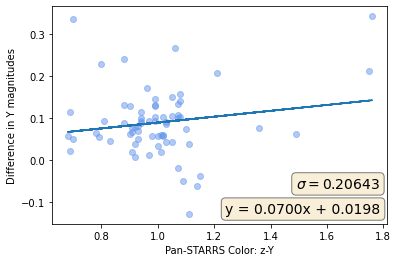

In [488]:
# improved color correction in y band

y = correctiony2['y_diff']
x = correctiony2['z-y']
x2 = correctiony['z-y']

ay_final, by_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

zcorr_mse = 1/(len(y)) * residual
print(residual, zcorr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(ay_final, by_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_zyy2diff, )

plt.ylabel('Difference in Y magnitudes')
plt.xlabel('Pan-STARRS Color: z-Y')
#plt.title('Photometric Correction of y magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'z-y')
plt.plot(x, ay_final*x + by_final) 
#plt.plot(x2, ayc2*x2 + byc2, label = 'previous fit') 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.24, -0.1, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(1.49, -0.04, textstr2, fontsize=14, verticalalignment='top', bbox=props)
#plt.legend()
plt.savefig('ymagcorrdes.png')

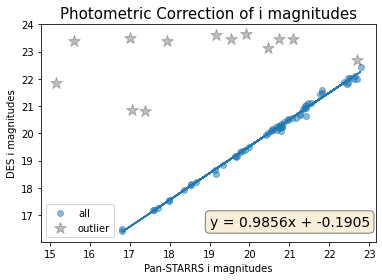

In [66]:
# making the color correction - i band

correctioni = comparisonmags_i.loc[comparisonmags_i['sigma_3i'] == False]

x = correctioni['i_P1']
y = correctioni['wavg_mag_psf_i']

ai, bi = np.polyfit(x, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(ai, bi)

plt.ylabel('DES i magnitudes')
plt.xlabel('Pan-STARRS i magnitudes')
plt.title('Photometric Correction of i magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_i_3sigma['i_P1'].values, comparisonmags_i_3sigma['wavg_mag_psf_i'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
plt.plot(x, ai*x + bi) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(19, 17, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()


In [67]:
# creating color columns

correctioni['i-z'] = correctiony['i_P1'] - correctiony['z_P1']
correctioni['r-i'] = correctiony['r_P1'] - correctiony['i_P1']
correctioni = correctioni[correctioni['i-z'].notna()]

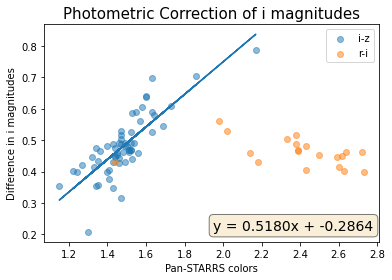

In [68]:
# making the color correction - i band

x = correctioni['i-z']
x2 = correctioni['r-i']
y = correctioni['i_diff']

aic, bic = np.polyfit(x, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(aic, bic)

plt.ylabel('Difference in i magnitudes')
plt.xlabel('Pan-STARRS colors')
plt.title('Photometric Correction of i magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(x, y, alpha = 0.5, label = 'i-z')
plt.plot(x, aic*x + bic) 
plt.text(1.95, 0.25, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.scatter(x2, y, alpha = 0.5, label = 'r-i')
plt.legend()


In [69]:
# standard deviation

izi_array = correctioni['i-z'].to_numpy()
idiff_array = correctioni['i_diff'].to_numpy()
sigma_izi = izi_array.std()
sigma_idiff = idiff_array.std()
sigma_izidiff = np.sqrt(sigma_izi ** 2 + sigma_idiff ** 2)

[0.19698909] [0.00322933]


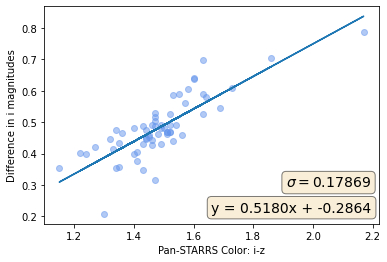

In [487]:
# final i color correction

x = correctioni['i-z']
y = correctioni['i_diff']

ai_final, bi_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

icorr_mse = 1/(len(y)) * residual
print(residual, icorr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(ai_final, bi_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_izidiff, )

plt.ylabel('Difference in i magnitudes')
plt.xlabel('Pan-STARRS Color: i-z')
#plt.title('Photometric Correction of i magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'i-z')
plt.plot(x, ai_final*x + bi_final) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.66, 0.25, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(1.91, 0.33, textstr2, fontsize=14, verticalalignment='top', bbox=props)
#plt.legend()
plt.savefig('imagcorrdes.png')

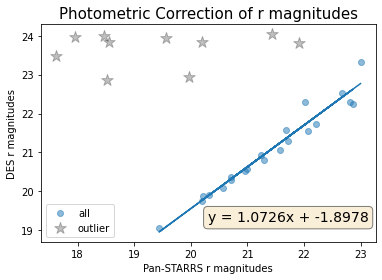

In [71]:
# making the color correction - r band

correctionr = comparisonmags_r.loc[comparisonmags_r['sigma_3r'] == False]

x = correctionr['r_P1']
y = correctionr['wavg_mag_psf_r']

ar, br = np.polyfit(x, y, 1)

textstr = 'y = {:.4f}x + {:.4f}'.format(ar, br)

plt.ylabel('DES r magnitudes')
plt.xlabel('Pan-STARRS r magnitudes')
plt.title('Photometric Correction of r magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(comparisonmags_r_3sigma['r_P1'].values, comparisonmags_r_3sigma['wavg_mag_psf_r'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'outlier')
plt.plot(x, ar*x + br) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(20.3, 19.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()


In [72]:
# standard deviation

correctionr['r-i'] = correctionr['r_P1'] - correctionr['i_P1']
ri_array = correctionr['r-i'].to_numpy()
rdiff_array = correctionr['r_diff'].to_numpy()
sigma_ri = ri_array.std()
sigma_rdiff = rdiff_array.std()
sigma_ridiff = np.sqrt(sigma_ri ** 2 + sigma_rdiff ** 2)

[0.54794679] [0.0260927]


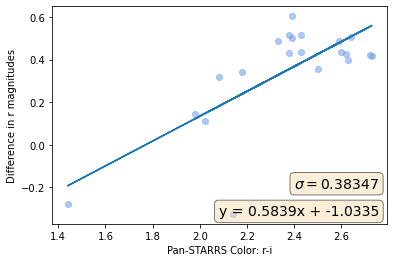

In [486]:
# making the color correction - r band

y = correctionr['r_diff']
x = correctionr['r-i']

ar_final, br_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

rcorr_mse = 1/(len(y)) * residual
print(residual, rcorr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(ar_final, br_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_ridiff, )

plt.ylabel('Difference in r magnitudes')
plt.xlabel('Pan-STARRS Color: r-i')
#plt.title('Photometric Correction of r magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'r-i')
plt.plot(x, ar_final*x + br_final) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2.4, -0.15, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.text(2.08, -0.28, textstr, fontsize=14, verticalalignment='top', bbox=props)
#plt.plot(x, 0.142*x + 0.01, label = 'PS1 correction')
#plt.legend()
plt.savefig('rmagcorrdes.png')

In [74]:
# start forming the training sample 
# y-band outliers: 4, none of which are angular or position separation outliers
# i-band outliers: 13, 1 of which is an angular separation outlier
# r-band outliers: 8, 2 of which are angular separation outliers

# take out angular separation outliers first
trainingDES = des_mags.loc[des_mags['sigma_3ang'] == False]

# get the sigma flags

# z: 

sigma_flag = []

for i in range(len(trainingDES)):
    if trainingDES.iloc[i, 27] >= upper_z:
        sigma_flag.append(True)
    elif trainingDES.iloc[i, 27] <= lower_z:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)

trainingDES['sigma_3z'] = np.array(sigma_flag)

# y: 

sigma_flag2 = []

for i in range(len(trainingDES)):
    if trainingDES.iloc[i, 28] >= upper_y:
        sigma_flag2.append(True)
    elif trainingDES.iloc[i, 28] <= lower_y:
        sigma_flag2.append(True)
    else:
        sigma_flag2.append(False)

trainingDES['sigma_3y'] = np.array(sigma_flag2)

# i:

sigma_flag3 = []

for i in range(len(trainingDES)):
    if trainingDES.iloc[i, 26] >= upper_i:
        sigma_flag3.append(True)
    elif trainingDES.iloc[i, 26] <= lower_i:
        sigma_flag3.append(True)
    else:
        sigma_flag3.append(False)

trainingDES['sigma_3i'] = np.array(sigma_flag3)

# r: 

sigma_flag4 = []

for i in range(len(trainingDES)):
    if trainingDES.iloc[i, 25] >= upper_r:
        sigma_flag4.append(True)
    elif trainingDES.iloc[i, 25] <= lower_r:
        sigma_flag4.append(True)
    else:
        sigma_flag4.append(False)

trainingDES['sigma_3r'] = np.array(sigma_flag4)

# remove the photometric band outliers
trainingDES = trainingDES.loc[trainingDES['sigma_3z'] == False]
trainingDES = trainingDES.loc[trainingDES['sigma_3y'] == False]
trainingDES = trainingDES.loc[trainingDES['sigma_3i'] == False]
trainingDES = trainingDES.loc[trainingDES['sigma_3r'] == False]

# remove stars with no photometric data from DES 
trainingDES = trainingDES.dropna(subset=['wavg_mag_psf_r', 'wavg_mag_psf_i', 'wavg_mag_psf_z', 'wavg_mag_psf_y'], thresh=1)

# remove stars with no photometric data from Pan-STARRS
trainingDES = trainingDES.dropna(subset = ['r_P1', 'i_P1', 'z_P1', 'y_P1'], thresh = 1)


# trainingDES = trainingDES[trainingDES.name != 'ULAS J012906.88+011350.4']
# trainingDES = trainingDES[trainingDES.name != 'ULAS J013117.53-003128.6']

trainingDES

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,i_diff,z_diff,y_diff,sigma_3,angular_sep,sigma_3ang,sigma_3z,sigma_3y,sigma_3i,sigma_3r
3,2.666957,1.005466,24.037722,23.675348,NaN,NaN,0.251121,0.285420,NaN,NaN,...,NaN,NaN,NaN,False,8.705721,False,False,False,False,False
10,4.798389,0.504706,21.287258,18.852976,17.322695,16.807170,0.008878,0.001935,0.000912,0.002228,...,0.487024,0.547305,0.092830,False,0.804628,False,False,False,False,False
16,5.539349,-1.177579,21.936010,19.327848,17.805836,17.341230,0.012653,0.002216,0.001219,0.002712,...,0.442152,0.504164,0.088770,False,2.130136,False,False,False,False,False
20,6.924922,5.061581,22.288687,20.139389,18.532766,17.961601,0.034705,0.009296,0.004204,0.008451,...,0.430611,0.547234,0.128399,False,0.104457,False,False,False,False,False
25,8.180081,-22.624253,21.578238,19.141325,17.652975,17.170086,0.014811,0.003452,0.002137,0.004460,...,0.528675,0.547025,0.019914,False,1.609696,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,354.066735,0.714808,23.137613,20.478704,18.882511,18.371986,0.047207,0.006513,0.003090,0.006026,...,0.491296,0.547489,0.058014,False,0.354370,False,False,False,False,False
293,356.029159,1.254371,22.711845,20.271175,18.783188,18.274845,0.026288,0.004554,0.002776,0.005966,...,0.488825,0.546812,0.115155,False,2.028089,False,False,False,False,False
294,356.413036,0.920224,20.288544,17.526035,15.948458,15.440567,0.003564,0.000711,0.000370,0.000908,...,0.463965,0.531542,0.099433,False,1.857486,False,False,False,False,False
295,356.999173,-0.263156,23.324759,20.400578,18.951616,18.533712,0.051839,0.005045,0.002780,0.006658,...,0.459422,0.458384,0.046288,False,0.838610,False,False,False,False,False


In [75]:
# add pan-starrs color columns

trainingDES['r_i_ps'] = trainingDES['r_P1'] - trainingDES['i_P1']
trainingDES['i_z_ps'] = trainingDES['i_P1'] - trainingDES['z_P1']
trainingDES['z_y_ps'] = trainingDES['z_P1'] - trainingDES['y_P1']

# create DES color columns

trainingDES['r_i_des'] = trainingDES['wavg_mag_psf_r'] - trainingDES['wavg_mag_psf_i']
trainingDES['i_z_des'] = trainingDES['wavg_mag_psf_i'] - trainingDES['wavg_mag_psf_z']
trainingDES['z_y_des'] = trainingDES['wavg_mag_psf_z'] - trainingDES['wavg_mag_psf_y']

In [76]:
# do photometric correction for four bands (skipping g, as there are not enough values in that band for any star)

# r:
trainingDES['r_P1_new'] = trainingDES['r_P1'] - (ar_final * trainingDES['r_i_ps']) - br_final

# i: 
trainingDES['i_P1_new'] = trainingDES['i_P1'] - (ai_final * trainingDES['i_z_ps']) - bi_final

# z:
trainingDES['z_P1_new'] = trainingDES['z_P1'] - (az_final * trainingDES['z_y_ps']) - bz_final

# y:
trainingDES['y_P1_new'] = trainingDES['y_P1'] - (ay_final * trainingDES['z_y_ps']) - by_final

In [77]:
# re-calculate the new differences

trainingDES['r_diff_new'] = trainingDES['r_P1_new'] - trainingDES['wavg_mag_psf_r']
trainingDES['i_diff_new'] = trainingDES['i_P1_new'] - trainingDES['wavg_mag_psf_i']
trainingDES['z_diff_new'] = trainingDES['z_P1_new'] - trainingDES['wavg_mag_psf_z']
trainingDES['y_diff_new'] = trainingDES['y_P1_new'] - trainingDES['wavg_mag_psf_y']

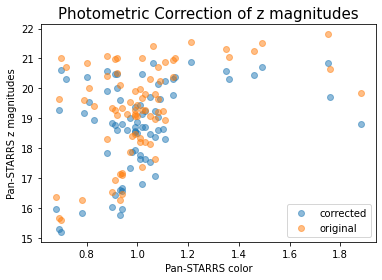

In [78]:
# check the photometric correction

x = trainingDES['z_y_ps']
y = trainingDES['z_P1_new']
z = trainingDES['z_P1']

plt.xlabel('Pan-STARRS color')
plt.ylabel('Pan-STARRS z magnitudes')
plt.title('Photometric Correction of z magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'corrected')
plt.scatter(x, z, alpha = 0.5, label = 'original')

plt.legend()

Text(0, 0.5, 'DES z-y color')

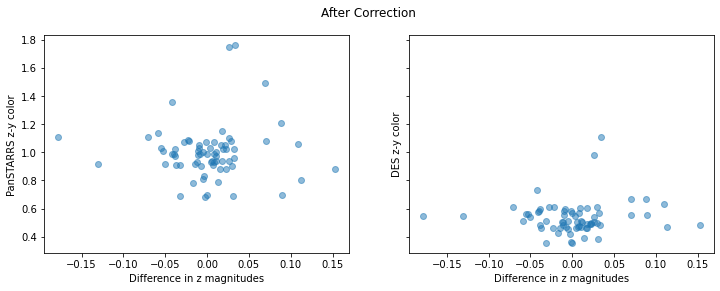

In [79]:
# check the photometric correction

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

x = trainingDES['z_diff_new']
y1 = trainingDES['z_y_ps']
y2 = trainingDES['z_y_des']

fig.suptitle('After Correction')

ax1.scatter(x, y1, alpha = 0.5)
ax1.set_xlabel('Difference in z magnitudes')

ax2.scatter(x, y2, alpha = 0.5)
ax2.set_xlabel('Difference in z magnitudes')

ax1.set_ylabel('PanSTARRS z-y color')
ax2.set_ylabel('DES z-y color')

Text(0, 0.5, 'DES color')

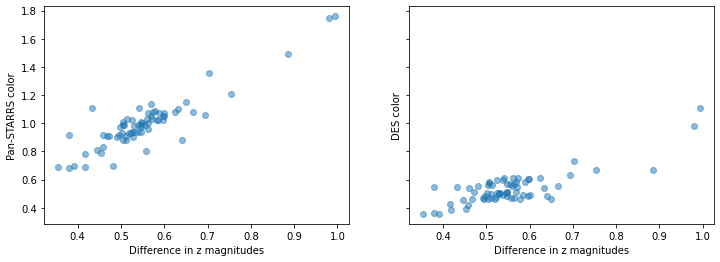

In [80]:
# check the photometric correction

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))

x1 = trainingDES['z_diff']
y1 = trainingDES['z_y_ps']
y2 = trainingDES['z_y_des']

ax1.scatter(x1, y1, alpha = 0.5)
ax1.set_xlabel('Difference in z magnitudes')
ax1.set_ylabel('Pan-STARRS color')

ax2.scatter(x1, y2, alpha = 0.5)
ax2.set_xlabel('Difference in z magnitudes')
ax2.set_ylabel('DES color')

Text(0.5, 1.0, 'Comparision of Survey Colors')

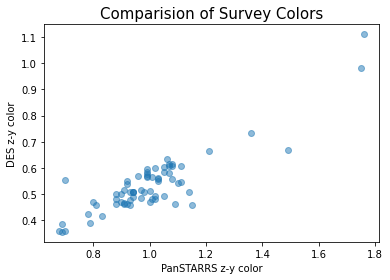

In [81]:
# plotting the colors

x = trainingDES['z_y_ps']
y = trainingDES['z_y_des']

plt.scatter(x, y, alpha = 0.5)
plt.xlabel('PanSTARRS z-y color')
plt.ylabel('DES z-y color')
plt.title('Comparision of Survey Colors', fontsize = 15)

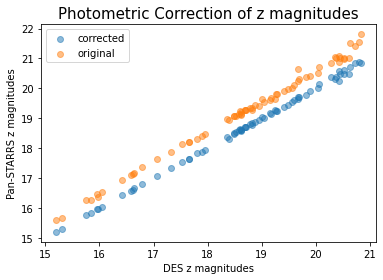

In [82]:
# check the photometric correction

x = trainingDES['wavg_mag_psf_z']
y = trainingDES['z_P1_new']
z = trainingDES['z_P1']

plt.xlabel('DES z magnitudes')
plt.ylabel('Pan-STARRS z magnitudes')
plt.title('Photometric Correction of z magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'corrected')
plt.scatter(x, z, alpha = 0.5, label = 'original')
plt.legend()

In [78]:
# get just the photometric data (without the g band)

DESphotometry = pd.DataFrame().assign(DES_r = trainingDES['wavg_mag_psf_r'], DES_i = trainingDES['wavg_mag_psf_i'], \
                                      DES_z = trainingDES['wavg_mag_psf_z'], DES_y = trainingDES['wavg_mag_psf_y'], \
                                      r_P1 = trainingDES['r_P1'], i_P1 = trainingDES['i_P1'], z_P1 = trainingDES['z_P1'], \
                                      y_P1 = trainingDES['y_P1'])
DESphotometry

,DES_r,DES_i,DES_z,DES_y,r_P1,i_P1,z_P1,y_P1
0,22.338305,20.059380,18.519573,17.932535,NaN,NaN,NaN,NaN
1,19.942392,17.264570,15.659860,15.111554,NaN,NaN,NaN,NaN
2,NaN,NaN,21.823662,20.577265,NaN,NaN,NaN,NaN
3,24.037722,23.675348,NaN,NaN,NaN,NaN,20.71,19.99
5,23.828634,23.382893,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
294,20.288544,17.526035,15.948458,15.440567,20.71,17.99,16.48,15.54
295,23.324759,20.400578,18.951616,18.533712,23.00,20.86,19.41,18.58
296,NaN,NaN,22.224321,21.149017,NaN,NaN,NaN,21.06
298,NaN,NaN,20.677748,19.547394,NaN,NaN,NaN,NaN


In [130]:
# try to fill in missing data using a linear regression algorithm
DESphotometry.isnull().sum()

DES_r    13
DES_i     3
DES_z     3
DES_y     3
r_P1     49
i_P1      8
z_P1      1
y_P1      0
dtype: int64

In [197]:
# Predict the r_P1 values first

# new_data: dataframe without the r_P1 column
new_data1 = DESphotometry.drop(['r_P1'], axis = 1)

# target: target column
target_r = pd.DataFrame().assign(r_P1 = DESphotometry['r_P1'])

# training_data: rows from new_data where column "r_P1" does not have missing values
training_data_r = DESphotometry[DESphotometry['r_P1'].notna()]
training_data_r = training_data_r.dropna()

# predict_data: rows from new_data where column "r_P1" have missing values
predict_data_r = DESphotometry[DESphotometry['r_P1'].isnull()]

# target_class_training: non-missing values in column "r_P1"
target_class_training_r = target_r[target_r['r_P1'].notna()]



In [198]:
# create training data

x_train = training_data_r.drop('r_P1', axis = 1).dropna()
y_train = training_data_r['r_P1']

test_df_r = predict_data_r.dropna(subset = ['DES_r', 'DES_i', 'DES_z', 'DES_y', 'i_P1', 'z_P1', 'y_P1'])
x_test = test_df_r.drop('r_P1', axis = 1)


In [199]:
# fitting the  model

from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [200]:
# predicting the values

y_pred_r = lr.predict(x_test)
y_pred_r

array([21.63804997, 22.98441842, 23.15675859, 23.00883636, 22.94121864,
       23.42141843, 22.23635048, 22.73444277, 22.92872175, 22.91688688,
       22.58408762, 22.78898904, 21.06226274, 22.26870018, 22.96827593,
       22.74416364, 21.94351584, 23.041367  , 23.10045276, 22.49016681,
       22.61583473, 18.92214726, 21.75192002, 21.91954961, 22.68808381,
       23.01860212, 22.93671941, 23.50450848, 22.52796809, 22.8861075 ,
       22.72293819, 23.47542566, 23.80325605, 22.90486814, 22.81383821,
       22.87415645])

In [201]:
# replace r_P1 with the predicted values

test_df_r['r_P1'] = y_pred_r
test_df_r 

<ipython-input-201-11dbdd6e6491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_r['r_P1'] = y_pred_r


,DES_r,DES_i,DES_z,DES_y,r_P1,i_P1,z_P1,y_P1
16,21.936010,19.327848,17.805836,17.341230,21.638050,19.293567,17.788724,17.347062
34,23.827797,21.602148,20.050516,19.511297,22.984418,21.306039,19.916987,19.491958
40,23.727709,21.980852,20.369678,19.908897,23.156759,22.105108,20.410358,19.770000
43,23.440931,21.105978,19.600355,19.139910,23.008836,20.960762,19.539704,19.094755
44,22.933437,20.664843,19.165040,18.566833,22.941219,20.773326,19.123726,18.578391
54,23.925373,21.851200,20.064663,19.508469,23.421418,21.947267,20.129814,19.551539
78,22.996466,20.329750,18.812746,18.350557,22.236350,20.309668,18.727095,18.280489
86,22.579151,20.219133,18.688183,18.139223,22.734443,20.319533,18.707747,18.141468
89,23.798887,21.455448,19.699722,19.206480,22.928722,21.266578,19.713835,19.154336
104,23.245823,20.526550,19.156326,18.764833,22.916887,20.467509,19.046334,18.727343


In [ ]:
# concatenate this with the previous dataframe 

In [247]:
# Read the file into a list of strings
with open('vlm-plx-all.txt', 'r') as f:
    lines = f.readlines()

# Split each line into a list of values
data = [line.split() for line in lines]

# Convert the list to a DataFrame
dupuy = pd.DataFrame(data)

In [248]:
# drop header comments

dupuy.drop(index=dupuy.index[0], axis=0, inplace = True)
dupuy = dupuy.reset_index(drop = True)

# put column names

dupuy.columns = dupuy.iloc[0]
dupuy.drop(index=dupuy.index[0], axis=0, inplace = True)
dupuy = dupuy.reset_index(drop = True)

# convert RA, Dec, mags into floats
dupuy['RA(deg)'] = dupuy['RA(deg)'].astype(float)
dupuy['Dec(deg)'] = dupuy['Dec(deg)'].astype(float)
dupuy['W1mag'] = dupuy['W1mag'].astype(float)
dupuy['eW1mag'] = dupuy['eW1mag'].astype(float)
dupuy['W2mag'] = dupuy['W2mag'].astype(float)
dupuy['eW2mag'] = dupuy['eW2mag'].astype(float)
dupuy['J2mag'] = dupuy['J2mag'].astype(float)
dupuy['eJ2mag'] = dupuy['eJ2mag'].astype(float)
dupuy['H2mag'] = dupuy['H2mag'].astype(float)
dupuy['eH2mag'] = dupuy['eH2mag'].astype(float)
dupuy['K2mag'] = dupuy['K2mag'].astype(float)
dupuy['eK2mag'] = dupuy['eK2mag'].astype(float)
dupuy['PMtot'] = dupuy['PMtot'].astype(float)
dupuy['PM_PA'] = dupuy['PM_PA'].astype(float)
dupuy['Epoch(JD)'] = dupuy['Epoch(JD)'].astype(float)
dupuy

,Name,OptSpT,NIRSpT,SpTRefs,flag,RA(deg),Dec(deg),Epoch(JD),plx,eplx,...,MIRRefs,sysID,bin,"compsep("")",HST/AO,Refs,Optgrav,Ref,IRgrav,Ref
0,SDSSJ000013.54+255418.6,null,T4.5,44,null,0.05644,25.90502,2451089.69,70.80,1.90,...,210,141,1,NaN,K,106,null,null,null,null
1,2MASSIJ0003422-282241,M7.5,M7,"8,82",over-L,0.92616,-28.37806,2451124.53,25.70,0.93,...,"89,90,377",242,1,66.000,null,null,null,null,FLD-G,8
2,GJ1001B,null,L5,106,null,1.14519,-40.73497,2451392.79,77.02,2.07,...,"89,90,288,377",637,2,18.600,NV,"106,",null,null,null,null
3,GJ1001C,null,L5,106,null,1.14519,-40.73497,2451392.79,77.02,2.07,...,"89,90,288,377",637,2,18.600,NV,"106,",null,null,null,null
4,2MASSJ00070787-2458042,M7,null,82,null,1.78282,-24.96786,2451124.57,38.80,1.33,...,"89,90,377",392,1,NaN,null,null,null,null,null,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,APMPMJ2354-3316C,M8.5,M8,"49,335",null,358.53870,-33.27406,2451386.84,44.24,1.78,...,"89,90,377",208,1,103.000,null,null,null,null,null,null
614,SSSPMJ2356-3426,M9,L0.5,235,null,359.04506,-34.43456,2451386.85,53.12,0.66,...,"89,90,377",587,1,NaN,null,null,null,null,null,null
615,2MASSIJ2356547-155310,null,T5.5,44,null,359.22821,-15.88643,2451011.83,68.97,3.42,...,"89,90,288,377",289,1,NaN,W,42,null,null,null,null
616,APMPMJ2359-6246,null,null,null,null,359.67856,-62.76176,2451526.59,47.98,2.22,...,"89,90,377",119,1,NaN,null,null,null,null,null,null


In [249]:
# select the desired columns

dupuy_select = dupuy[['Name', 'SpTRefs', 'RA(deg)', 'Dec(deg)', 'Epoch(JD)', 'PMtot', 'PM_PA', 'J2mag', 'eJ2mag', 'H2mag', \
               'eH2mag', 'K2mag', 'eK2mag', 'W1mag', 'eW1mag', 'W2mag', 'eW2mag', ]]
dupuy_select

,Name,SpTRefs,RA(deg),Dec(deg),Epoch(JD),PMtot,PM_PA,J2mag,eJ2mag,H2mag,eH2mag,K2mag,eK2mag,W1mag,eW1mag,W2mag,eW2mag
0,SDSSJ000013.54+255418.6,44,0.05644,25.90502,2451089.69,128.10,351.430,15.063,0.041,14.731,0.074,14.836,0.120,NaN,NaN,NaN,NaN
1,2MASSIJ0003422-282241,"8,82",0.92616,-28.37806,2451124.53,314.46,116.750,13.068,0.024,12.376,0.028,11.972,0.025,11.671,0.025,11.502,0.023
2,GJ1001B,106,1.14519,-40.73497,2451392.79,1643.00,156.000,13.814,0.034,12.735,0.032,12.101,0.035,NaN,NaN,NaN,NaN
3,GJ1001C,106,1.14519,-40.73497,2451392.79,1643.00,156.000,13.912,0.035,12.886,0.034,12.199,0.037,NaN,NaN,NaN,NaN
4,2MASSJ00070787-2458042,82,1.78282,-24.96786,2451124.57,193.30,107.011,13.115,0.024,12.447,0.024,12.060,0.023,11.840,0.022,11.636,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,APMPMJ2354-3316C,"49,335",358.53870,-33.27406,2451386.84,515.40,218.000,13.051,0.024,12.365,0.027,11.884,0.023,11.613,0.023,11.387,0.021
614,SSSPMJ2356-3426,235,359.04506,-34.43456,2451386.85,313.39,165.112,12.947,0.024,12.376,0.023,11.965,0.023,11.629,0.023,11.313,0.020
615,2MASSIJ2356547-155310,44,359.22821,-15.88643,2451011.83,746.20,216.460,15.824,0.057,15.630,0.100,15.771,0.183,15.584,0.055,13.708,0.042
616,APMPMJ2359-6246,null,359.67856,-62.76176,2451526.59,578.90,81.700,11.387,0.026,10.827,0.023,10.515,0.023,10.289,0.023,10.077,0.020


In [83]:
# finds all UC Stars with an ra/dec that returns a catwise2020 query result

insearch_cat = []
ra_list = []
dec_list = []
radius = 0.007

for i in range(len(ucs)):
    ra0 = ucs.iloc[i, 1] # in degrees, right ascension
    ra_list.append(ra0)
    dec0 = ucs.iloc[i, 2] # in degrees, declinarion
    dec_list.append(dec0)
    query = """
    SELECT ra, dec, w1mpro, w2mpro
    FROM catwise2020.main,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
    WHERE cc_flags = '0000'
    AND ab_flags = '00'
    AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    if len(sources) >= 1:   # need at least one result 
        insearch_cat.append(True)
    else:
        insearch_cat.append(False)


In [84]:
# create a true/false column with the search results

ucs['Cat_Search'] = np.array(insearch_cat)

In [85]:
# take only the columns labelled with 'true' to get all potential matches

cat_search = ucs.loc[ucs['Cat_Search']==True]
cat_search = cat_search.reset_index(drop=True)
cat_search = cat_search.rename(columns={'ra_j2000_formula' : 'ucs_ra', 'dec_j2000_formula' : 'ucs_dec'})
cat_search

,name,ucs_ra,ucs_dec,pmra_formula,r_P1,i_P1,z_P1,y_P1,rerr_P1,ierr_P1,...,ra_j2000_allwise,dec_j2000_allwise,W1,W2,W1err,W2err,multiple_unresolved_in_this_table,sptnumabs_formula,DES_Search,Cat_Search
0,ULAS J000010.43+113602.2,0.0434,11.6020,-90.00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.043351,11.602016,16.868,16.613,0.116,NaN,N,21.5,False,True
1,SDSS J000112.18+153535.5,0.3007,15.5932,143.00,NaN,20.37,18.85,17.81,NaN,0.01,...,0.301149,15.592689,12.965,12.539,0.024,0.024,N,13.7,False,True
2,WISEA J000131.93-084126.9,0.3821,-8.6900,339.90,NaN,20.21,18.57,17.57,NaN,0.03,...,0.383063,-8.690899,14.344,13.993,0.031,0.047,N,11.0,False,True
3,SDSS J000250.98+245413.8,0.7124,24.9039,22.00,NaN,22.30,20.30,19.31,NaN,0.08,...,0.712437,24.903791,14.819,14.574,0.032,0.058,N,15.5,False,True
4,2MASS J00040288-6410358,1.0127,-64.1768,64.00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.012502,-64.176769,13.409,12.959,0.024,0.026,N,11.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,SDSS J235835.45-000909.5,359.6478,-0.1526,-97.00,NaN,21.09,19.55,18.73,NaN,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,N,10.0,True,True
2686,SDSS J235841.98+000622.0,359.6749,0.1060,128.00,NaN,21.82,20.41,19.54,NaN,0.02,...,359.675248,0.105998,15.439,15.177,0.044,0.094,N,11.5,False,True
2687,APMPM J2359-6246,359.6787,-62.7618,590.65,NaN,NaN,NaN,NaN,NaN,NaN,...,359.682446,-62.761543,10.305,10.088,0.023,0.020,N,6.0,True,True
2688,WISEP J235941.07-733504.8,359.9213,-73.5847,281.00,NaN,NaN,NaN,NaN,NaN,NaN,...,359.921270,-73.584725,15.263,13.338,0.034,0.028,N,26.5,False,True


In [86]:
cat_search.iloc[1, 26]

'N'

In [87]:
cat_search['w1_w2'] = cat_search['W1'] - cat_search['W2']
wdiff_array = cat_search['w1_w2'].to_numpy()
wdiff_array = wdiff_array[~np.isnan(wdiff_array)]
mu_wdiff = wdiff_array.mean()
sigma_wdiff = wdiff_array.std()
print(mu_wdiff, sigma_wdiff)

0.668109751121991 0.8185728401838394


In [88]:
# takes the 2690 stars in catwise field and matches them to catwise query

cat_mags = pd.DataFrame()
no_of_matches = []

for i in range(len(cat_search)):
    ra0 = cat_search.iloc[i, 1]  # in degrees, right ascension
    dec0 = cat_search.iloc[i, 2] # in degrees, declinarion
    w1s = cat_search.iloc[i, 22] # w1 allwise photometry
    w2s = cat_search.iloc[i, 23] # w2 allwise photometry
    query = """
    SELECT ra, dec, w1mpro, w2mpro, w1sigflux, w2sigflux, pmra, pmdec
    FROM catwise2020.main,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
    WHERE cc_flags = '0000'
    AND ab_flags = '00'
    AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_comp'] = (sources['ra'] - ra0) * np.cos(dec0 * (np.pi / 180))       # difference in right ascension
    sources['dec_comp'] = sources['dec'] - dec0                                     # difference in declination
    sources['w1_comp'] = w1s - sources['w1mpro']
    sources['w2_comp'] = w2s - sources['w2mpro']
    sources = sources[sources.w1_comp.abs() <= 0.5]
    sources = sources[sources.w2_comp.abs() <= 0.5]
    closestmatch = sources.head(1)
    closestmatch['ucs_ra'] = ra0
    closestmatch['ucs_dec'] = dec0
    closestmatch['W1'] = w1s
    closestmatch['W2'] = w2s
    no_of_matches.append(len(sources))
    cat_mags = pd.concat([cat_mags, closestmatch], ignore_index = True)


In [89]:
cat_mags['binary'] = cat_search['multiple_unresolved_in_this_table']
cat_mags

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,w1_comp,w2_comp,ucs_ra,ucs_dec,W1,W2,binary
0,0.043334,11.601974,16.877,16.869,7.2116,24.366,0.03135,-0.01090,-0.000065,-0.000026,-0.009,-0.256,0.0434,11.6020,16.868,16.613,N
1,0.301335,15.592465,12.967,12.557,73.6710,82.578,0.14627,-0.17977,0.000612,-0.000735,-0.002,-0.018,0.3007,15.5932,12.965,12.539,N
2,0.383510,-8.691290,14.354,14.067,27.2720,35.877,0.34928,-0.33492,0.001394,-0.001290,-0.010,-0.074,0.3821,-8.6900,14.344,13.993,N
3,0.712486,24.903770,14.833,14.576,16.6640,28.090,0.07238,-0.02756,0.000078,-0.000130,-0.014,-0.002,0.7124,24.9039,14.819,14.574,N
4,1.012763,-64.176842,13.405,12.974,56.8650,61.898,0.10060,-0.06658,0.000027,-0.000042,0.004,-0.015,1.0127,-64.1768,13.409,12.959,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,359.045483,-34.435950,11.659,11.340,242.0300,225.920,0.09938,-0.33788,0.000316,-0.001350,-0.030,-0.027,359.0451,-34.4346,11.629,11.313,N
2003,359.075358,7.905365,15.650,15.311,10.9120,26.633,0.17212,-0.19156,0.000255,-0.000235,-0.033,0.039,359.0751,7.9056,15.617,15.350,N
2004,359.318792,12.460781,15.969,14.153,11.0500,38.529,0.03453,-0.48802,0.000090,-0.000719,-0.227,-0.135,359.3187,12.4615,15.742,14.018,N
2005,359.675408,0.105863,15.413,15.143,13.0380,29.465,0.11342,-0.07621,0.000508,-0.000137,0.026,0.034,359.6749,0.1060,15.439,15.177,N


In [255]:
# match dupuy to catwise

# insearch_cat2 = []
# ra_list = []
# dec_list = []
# radius = 0.007

# for i in range(len(dupuy_select)):
#     ra0 = dupuy_select.iloc[i, 2] # in degrees, right ascension
#     ra_list.append(ra0)
#     dec0 = dupuy_select.iloc[i, 3] # in degrees, declinarion
#     dec_list.append(dec0)
#     query = """
#     SELECT ra, dec, w1mpro, w2mpro
#     FROM catwise2020.main
#     WHERE cc_flags = '0000'
#     AND ab_flags = '00'
#     AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
#     """.format(ra0,dec0,radius)
#     response = qc.query(sql=query,format='csv')
#     sources = convert(response,'pandas')
#     if len(sources) >= 1:   # need at least one result 
#         insearch_cat2.append(True)
#     else:
#         insearch_cat2.append(False)

In [256]:
# create a true/false column with the search results
# pd.options.mode.chained_assignment = None  # default='warn'
# dupuy_select['Cat_Search'] = np.array(insearch_cat2)

In [205]:
# take only the columns labelled with 'true' to get all potential matches

# dupuy_searchstars = dupuy_select.loc[dupuy_select['Cat_Search']==True]
# dupuy_searchstars = dupuy_searchstars.reset_index(drop=True)
# dupuy_searchstars

In [259]:
# takes the 516 stars in dupuy and matches them to catwise query

# cat_dupuy_mags = pd.DataFrame()
# no_of_matches = []

# for i in range(len(dupuy_searchstars)):
#     ra0 = dupuy_searchstars.iloc[i, 2] # in degrees, right ascension
#     dec0 = dupuy_searchstars.iloc[i, 3] # in degrees, declinarion
#     query = """
#     SELECT ra, dec, w1mpro, w2mpro
#     FROM catwise2020.main
#     WHERE cc_flags = '0000'
#     AND ab_flags = '00'
#     AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
#     """.format(ra0,dec0,radius)
#     response = qc.query(sql=query,format='csv')
#     sources = convert(response,'pandas')
#     sources['ra_comp'] = sources['ra'] - ra0
#     sources['dec_comp'] = sources['dec'] - dec0                     # difference in declination
#     sources['overall_comp'] = (sources['ra_comp'] * np.cos(dec0))   # difference in right ascension
#     closestmatch = sources.reindex(sources.overall_comp.abs().sort_values().index).head(1)
#     no_of_matches.append(len(sources))
#     cat_dupuy_mags = pd.concat([cat_dupuy_mags, closestmatch], ignore_index = True)


In [206]:
# matching columns of dupuy matches to catwise

# cat_dupuy_mags['name'] = dupuy_searchstars['Name']
# cat_dupuy_mags['dupuy_ra'] = dupuy_searchstars['RA(deg)']
# cat_dupuy_mags['dupuy_dec'] = dupuy_searchstars['Dec(deg)']
# cat_dupuy_mags['dupuy_epoch'] = dupuy_searchstars['Epoch(JD)']
# cat_dupuy_mags['pmtot'] = dupuy_searchstars['PMtot']
# cat_dupuy_mags['pmpa'] = dupuy_searchstars['PM_PA']
# cat_dupuy_mags['spectral_type'] = dupuy_searchstars['SpTRefs']
# cat_dupuy_mags['w1mag'] = dupuy_searchstars['W1mag']
# cat_dupuy_mags['w1mag_err'] = dupuy_searchstars['eW1mag']
# cat_dupuy_mags['w2mag'] = dupuy_searchstars['W2mag']
# cat_dupuy_mags['w2mag_err'] = dupuy_searchstars['eW2mag']
# cat_dupuy_mags

In [90]:
# converting to arc seconds

cat_mags['dec_comp'] = cat_mags['dec_comp'].apply(lambda x: x*3600)
cat_mags['ra_comp'] = cat_mags['ra_comp'].apply(lambda x: x*3600)

In [91]:
# high proper motion objects - top 20
highpmra_cat = cat_mags.reindex(cat_mags.pmra.abs().sort_values(ascending = False).index).head(20)
binary_cat = cat_mags[cat_mags.binary != 'N']

In [92]:
# statistics

ra_c_array = cat_mags['ra_comp'].to_numpy()
dec_c_array = cat_mags['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
ra_c_array = [x for x in ra_c_array if (x <= 10 and x >= -10)]
ra_c_array = np.asarray(ra_c_array)
dec_c_array = [x for x in dec_c_array  if (x <= 10 and x >= -10)]
dec_c_array = np.asarray(dec_c_array )

mu_ra_c = ra_c_array.mean()
mu_dec_c = dec_c_array.mean()
sigma_ra_c = ra_c_array.std()
sigma_dec_c = dec_c_array.std()
sigma_pos_c = np.sqrt(sigma_ra_c**2 + sigma_dec_c**2)

In [93]:
cat_mags.columns

Index(['ra', 'dec', 'w1mpro', 'w2mpro', 'w1sigflux', 'w2sigflux', 'pmra',
       'pmdec', 'ra_comp', 'dec_comp', 'w1_comp', 'w2_comp', 'ucs_ra',
       'ucs_dec', 'W1', 'W2', 'binary'],
      dtype='object')

In [94]:
# flag 3 sigma outliers

upper_ra_c, lower_ra_c = mu_ra_c + 3*sigma_pos_c, mu_ra_c - 3*sigma_pos_c
upper_dec_c, lower_dec_c = mu_dec_c + 3*sigma_pos_c, mu_dec_c - 3*sigma_pos_c
sigma_flag = []

for i in range(len(cat_mags)):
    if cat_mags.iloc[i, 8] >= upper_ra_c:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 9] >= upper_dec_c:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 8] <= lower_ra_c:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 9] <= lower_dec_c:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
cat_mags['sigma_3'] = np.array(sigma_flag)
cat_mags_3sigma = cat_mags.loc[cat_mags['sigma_3']==True]
cat_mags

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,w1_comp,w2_comp,ucs_ra,ucs_dec,W1,W2,binary,sigma_3
0,0.043334,11.601974,16.877,16.869,7.2116,24.366,0.03135,-0.01090,-0.233098,-0.09216,-0.009,-0.256,0.0434,11.6020,16.868,16.613,N,False
1,0.301335,15.592465,12.967,12.557,73.6710,82.578,0.14627,-0.17977,2.203596,-2.64528,-0.002,-0.018,0.3007,15.5932,12.965,12.539,N,False
2,0.383510,-8.691290,14.354,14.067,27.2720,35.877,0.34928,-0.33492,5.018085,-4.64364,-0.010,-0.074,0.3821,-8.6900,14.344,13.993,N,False
3,0.712486,24.903770,14.833,14.576,16.6640,28.090,0.07238,-0.02756,0.281465,-0.46692,-0.014,-0.002,0.7124,24.9039,14.819,14.574,N,False
4,1.012763,-64.176842,13.405,12.974,56.8650,61.898,0.10060,-0.06658,0.098636,-0.15012,0.004,-0.015,1.0127,-64.1768,13.409,12.959,N,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,359.045483,-34.435950,11.659,11.340,242.0300,225.920,0.09938,-0.33788,1.136305,-4.86108,-0.030,-0.027,359.0451,-34.4346,11.629,11.313,N,False
2003,359.075358,7.905365,15.650,15.311,10.9120,26.633,0.17212,-0.19156,0.918546,-0.84564,-0.033,0.039,359.0751,7.9056,15.617,15.350,N,False
2004,359.318792,12.460781,15.969,14.153,11.0500,38.529,0.03453,-0.48802,0.323749,-2.58948,-0.227,-0.135,359.3187,12.4615,15.742,14.018,N,False
2005,359.675408,0.105863,15.413,15.143,13.0380,29.465,0.11342,-0.07621,1.827717,-0.49464,0.026,0.034,359.6749,0.1060,15.439,15.177,N,False


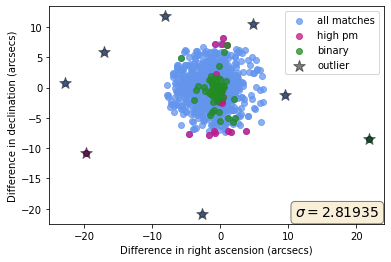

In [95]:
# plot the separation

textstr = ''r'$\sigma=%.5f$' % (sigma_pos_c, )

plt.scatter(cat_mags['dec_comp'].values, cat_mags['ra_comp'].values, alpha = 0.75, color = 'cornflowerblue', label = 'all matches')
plt.scatter(highpmra_cat['dec_comp'].values, highpmra_cat['ra_comp'].values, alpha = 0.75, color = 'mediumvioletred', label = 'high pm')
plt.scatter(binary_cat['dec_comp'].values, binary_cat['ra_comp'].values, alpha = 0.75, color = 'forestgreen', label = 'binary')
plt.scatter(cat_mags_3sigma['dec_comp'].values, cat_mags_3sigma['ra_comp'].values, 150, alpha = 0.5, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
#plt.title('Accuracy according to Coordinates (CatWISE)', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(11, -19.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('coordaccuracycatucs.png')

In [96]:
# need to convert to radians from degrees (1" × π/(180))

cat_mags['ra'] = cat_mags['ra'].apply(lambda x: x * (np.pi/180))
cat_mags['dec'] = cat_mags['dec'].apply(lambda x: x * (np.pi/180))
cat_mags['ucs_ra'] = cat_mags['ucs_ra'].apply(lambda x: x * (np.pi/180))
cat_mags['ucs_dec'] = cat_mags['ucs_dec'].apply(lambda x: x * (np.pi/180))

In [97]:
# calculate radial and angular separation

ang_dis_list = []

for i in range(len(cat_mags)):
    ra_cat = cat_mags.iloc[i, 0]      # in radians, right ascension of DES
    dec_cat = cat_mags.iloc[i, 1]     # in radians, declinarion of DES
    ra_ucs = cat_mags.iloc[i, 12]      # in radians, right ascension of CatWISE
    dec_ucs = cat_mags.iloc[i, 13]    # in radians, declinarion of CatWISE
    ang_dis = np.arccos(np.sin(dec_ucs)*np.sin(dec_cat) + np.cos(dec_ucs)*np.cos(dec_cat)*np.cos(ra_ucs - ra_cat))
    ang_dis_list.append(ang_dis)

cat_mags['angular_sep'] = np.array(ang_dis_list)

# convert angular separation from radians to arcseconds
cat_mags['angular_sep'] = cat_mags['angular_sep'].apply(lambda x: x * (648000/ np.pi))

# convert ra, and dec from radians back to degrees
cat_mags['ucs_dec'] = cat_mags['ucs_dec'].apply(lambda x: x * (180/ np.pi))
cat_mags['ucs_ra'] = cat_mags['ucs_ra'].apply(lambda x: x * (180/ np.pi))
cat_mags['dec'] = cat_mags['dec'].apply(lambda x: x * (180/ np.pi))
cat_mags['ra'] = cat_mags['ra'].apply(lambda x: x * (180/ np.pi))

In [98]:
# statistics

ang_array_c = cat_mags['angular_sep'].to_numpy()

# manually get rid of outliers: +/- 15
ang_array_c = [x for x in ang_array_c if (x <= 15 and x >= -15)]
ang_array_c = np.asarray(ang_array_c)

mu_ang_c = ang_array_c.mean()
sigma_ang_c = ang_array_c.std()


In [99]:
cat_mags.columns.get_loc('angular_sep')

18

In [100]:
# flag 3 sigma outliers for angular separation:

upper_ang_c, lower_ang_c = mu_ang_c + 3*sigma_ang_c, mu_ang_c - 3*sigma_ang_c
sigma_flag = []

for i in range(len(cat_mags)):
    if cat_mags.iloc[i, 18] >= upper_ang_c:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 18] <= lower_ang_c:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
cat_mags['sigma_3ang'] = np.array(sigma_flag)
cat_mags

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,w1_comp,w2_comp,ucs_ra,ucs_dec,W1,W2,binary,sigma_3,angular_sep,sigma_3ang
0,0.043334,11.601974,16.877,16.869,7.2116,24.366,0.03135,-0.01090,-0.233098,-0.09216,-0.009,-0.256,0.0434,11.6020,16.868,16.613,N,False,0.250662,False
1,0.301335,15.592465,12.967,12.557,73.6710,82.578,0.14627,-0.17977,2.203596,-2.64528,-0.002,-0.018,0.3007,15.5932,12.965,12.539,N,False,3.442871,False
2,0.383510,-8.691290,14.354,14.067,27.2720,35.877,0.34928,-0.33492,5.018085,-4.64364,-0.010,-0.074,0.3821,-8.6900,14.344,13.993,N,False,6.836994,False
3,0.712486,24.903770,14.833,14.576,16.6640,28.090,0.07238,-0.02756,0.281465,-0.46692,-0.014,-0.002,0.7124,24.9039,14.819,14.574,N,False,0.545195,False
4,1.012763,-64.176842,13.405,12.974,56.8650,61.898,0.10060,-0.06658,0.098636,-0.15012,0.004,-0.015,1.0127,-64.1768,13.409,12.959,N,False,0.179614,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,359.045483,-34.435950,11.659,11.340,242.0300,225.920,0.09938,-0.33788,1.136305,-4.86108,-0.030,-0.027,359.0451,-34.4346,11.629,11.313,N,False,4.992119,False
2003,359.075358,7.905365,15.650,15.311,10.9120,26.633,0.17212,-0.19156,0.918546,-0.84564,-0.033,0.039,359.0751,7.9056,15.617,15.350,N,False,1.248530,False
2004,359.318792,12.460781,15.969,14.153,11.0500,38.529,0.03453,-0.48802,0.323749,-2.58948,-0.227,-0.135,359.3187,12.4615,15.742,14.018,N,False,2.609640,False
2005,359.675408,0.105863,15.413,15.143,13.0380,29.465,0.11342,-0.07621,1.827717,-0.49464,0.026,0.034,359.6749,0.1060,15.439,15.177,N,False,1.893466,False


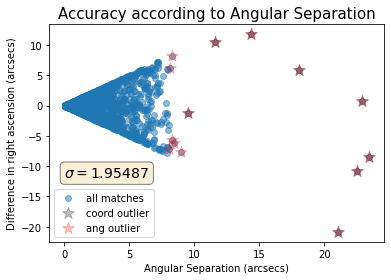

In [101]:
# plot separation in right ascention and declination for closest coordinate matches

cat_mags_3sigma = cat_mags.loc[cat_mags['sigma_3']==True]
cat_mags_3sigma_ang = cat_mags.loc[cat_mags['sigma_3ang']==True]

textstr = ''r'$\sigma=%.5f$' % (sigma_ang_c, )

plt.scatter(cat_mags['angular_sep'].values, cat_mags['ra_comp'].values, alpha = 0.5, label = 'all matches')
plt.scatter(cat_mags_3sigma['angular_sep'].values, cat_mags_3sigma['ra_comp'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'coord outlier')
plt.scatter(cat_mags_3sigma_ang['angular_sep'].values, cat_mags_3sigma_ang['ra_comp'].values, 150, alpha = 0.25, \
            color = 'r', marker= '*', label = 'ang outlier')
plt.xlabel('Angular Separation (arcsecs)')
plt.ylabel('Difference in right ascension (arcsecs)')
plt.title('Accuracy according to Angular Separation', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0, -10, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [102]:
# magnitude difference between allwise and catwise

cat_mags['w1_diff'] = cat_mags['W1'] - cat_mags['w1mpro']
cat_mags['w2_diff'] = cat_mags['W2'] - cat_mags['w2mpro']

In [103]:
# statistics on mag spread

w1_diff_array = cat_mags['w1_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 0.2
w1_diff_array = [x for x in w1_diff_array if (x <= 0.25 and x >= -0.25)]
w1_diff_array = np.asarray(w1_diff_array)

mu_w1 = w1_diff_array.mean()
sigma_w1 = w1_diff_array.std()

upper_w1, lower_w1 = mu_w1 + 3*sigma_w1, mu_w1 - 3*sigma_w1

In [104]:
cat_mags.columns.get_loc('w1_diff')

20

In [105]:
# flag 3 sigma outliers for w1 mags:

sigma_flag = []

for i in range(len(cat_mags)):
    if cat_mags.iloc[i, 20] >= upper_w1:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 20] <= lower_w1:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
cat_mags['sigma_3w1'] = np.array(sigma_flag)
cat_mags

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,...,ucs_dec,W1,W2,binary,sigma_3,angular_sep,sigma_3ang,w1_diff,w2_diff,sigma_3w1
0,0.043334,11.601974,16.877,16.869,7.2116,24.366,0.03135,-0.01090,-0.233098,-0.09216,...,11.6020,16.868,16.613,N,False,0.250662,False,-0.009,-0.256,False
1,0.301335,15.592465,12.967,12.557,73.6710,82.578,0.14627,-0.17977,2.203596,-2.64528,...,15.5932,12.965,12.539,N,False,3.442871,False,-0.002,-0.018,False
2,0.383510,-8.691290,14.354,14.067,27.2720,35.877,0.34928,-0.33492,5.018085,-4.64364,...,-8.6900,14.344,13.993,N,False,6.836994,False,-0.010,-0.074,False
3,0.712486,24.903770,14.833,14.576,16.6640,28.090,0.07238,-0.02756,0.281465,-0.46692,...,24.9039,14.819,14.574,N,False,0.545195,False,-0.014,-0.002,False
4,1.012763,-64.176842,13.405,12.974,56.8650,61.898,0.10060,-0.06658,0.098636,-0.15012,...,-64.1768,13.409,12.959,N,False,0.179614,False,0.004,-0.015,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,359.045483,-34.435950,11.659,11.340,242.0300,225.920,0.09938,-0.33788,1.136305,-4.86108,...,-34.4346,11.629,11.313,N,False,4.992119,False,-0.030,-0.027,False
2003,359.075358,7.905365,15.650,15.311,10.9120,26.633,0.17212,-0.19156,0.918546,-0.84564,...,7.9056,15.617,15.350,N,False,1.248530,False,-0.033,0.039,False
2004,359.318792,12.460781,15.969,14.153,11.0500,38.529,0.03453,-0.48802,0.323749,-2.58948,...,12.4615,15.742,14.018,N,False,2.609640,False,-0.227,-0.135,True
2005,359.675408,0.105863,15.413,15.143,13.0380,29.465,0.11342,-0.07621,1.827717,-0.49464,...,0.1060,15.439,15.177,N,False,1.893466,False,0.026,0.034,False


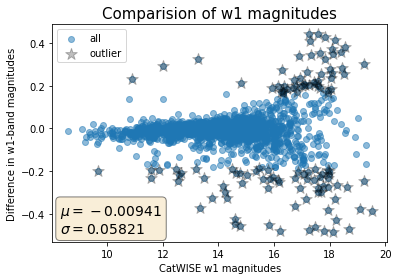

In [106]:
# compare w1-band magnitudes from allwise with catwise

cat_mags_3sigmaw1 = cat_mags.loc[cat_mags['sigma_3w1']==True]

y = cat_mags['w1_comp']
x = cat_mags['w1mpro']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_w1, ),
    r'$\sigma=%.5f$' % (sigma_w1, )))

plt.xlabel('CatWISE w1 magnitudes')
plt.ylabel('Difference in w1-band magnitudes')
plt.title('Comparision of w1 magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(cat_mags_3sigmaw1['w1mpro'].values, cat_mags_3sigmaw1['w1_diff'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(8.3, -0.35, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [107]:
# statistics on mag spread

w2_diff_array = cat_mags['w2_diff'].to_numpy()

# getting rid of outliers by hand first: +/- 0.2
w2_diff_array = [x for x in w2_diff_array if (x <= 0.25 and x >= -0.25)]
w2_diff_array = np.asarray(w2_diff_array)

mu_w2 = w2_diff_array.mean()
sigma_w2 = w2_diff_array.std()

upper_w2, lower_w2 = mu_w2 + 3*sigma_w2, mu_w2 - 3*sigma_w2

In [108]:
cat_mags.columns.get_loc('w2_diff')

21

In [109]:
# flag 3 sigma outliers for w1 mags:

sigma_flag = []

for i in range(len(cat_mags)):
    if cat_mags.iloc[i, 21] >= upper_w2:
        sigma_flag.append(True)
    elif cat_mags.iloc[i, 21] <= lower_w2:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
cat_mags['sigma_3w2'] = np.array(sigma_flag)
cat_mags

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,...,W1,W2,binary,sigma_3,angular_sep,sigma_3ang,w1_diff,w2_diff,sigma_3w1,sigma_3w2
0,0.043334,11.601974,16.877,16.869,7.2116,24.366,0.03135,-0.01090,-0.233098,-0.09216,...,16.868,16.613,N,False,0.250662,False,-0.009,-0.256,False,True
1,0.301335,15.592465,12.967,12.557,73.6710,82.578,0.14627,-0.17977,2.203596,-2.64528,...,12.965,12.539,N,False,3.442871,False,-0.002,-0.018,False,False
2,0.383510,-8.691290,14.354,14.067,27.2720,35.877,0.34928,-0.33492,5.018085,-4.64364,...,14.344,13.993,N,False,6.836994,False,-0.010,-0.074,False,False
3,0.712486,24.903770,14.833,14.576,16.6640,28.090,0.07238,-0.02756,0.281465,-0.46692,...,14.819,14.574,N,False,0.545195,False,-0.014,-0.002,False,False
4,1.012763,-64.176842,13.405,12.974,56.8650,61.898,0.10060,-0.06658,0.098636,-0.15012,...,13.409,12.959,N,False,0.179614,False,0.004,-0.015,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,359.045483,-34.435950,11.659,11.340,242.0300,225.920,0.09938,-0.33788,1.136305,-4.86108,...,11.629,11.313,N,False,4.992119,False,-0.030,-0.027,False,False
2003,359.075358,7.905365,15.650,15.311,10.9120,26.633,0.17212,-0.19156,0.918546,-0.84564,...,15.617,15.350,N,False,1.248530,False,-0.033,0.039,False,False
2004,359.318792,12.460781,15.969,14.153,11.0500,38.529,0.03453,-0.48802,0.323749,-2.58948,...,15.742,14.018,N,False,2.609640,False,-0.227,-0.135,True,False
2005,359.675408,0.105863,15.413,15.143,13.0380,29.465,0.11342,-0.07621,1.827717,-0.49464,...,15.439,15.177,N,False,1.893466,False,0.026,0.034,False,False


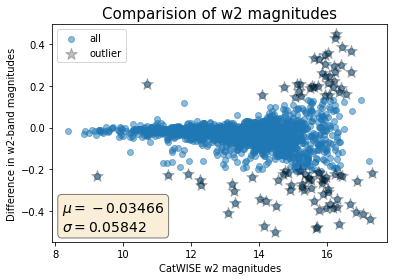

In [110]:
# compare w1-band magnitudes from dupuy with catwise

cat_mags_3sigmaw2 = cat_mags.loc[cat_mags['sigma_3w2']==True]

y = cat_mags['w2_comp']
x = cat_mags['w2mpro']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_w2, ),
    r'$\sigma=%.5f$' % (sigma_w2, )))

plt.xlabel('CatWISE w2 magnitudes')
plt.ylabel('Difference in w2-band magnitudes')
plt.title('Comparision of w2 magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(cat_mags_3sigmaw2['w2mpro'].values, cat_mags_3sigmaw2['w2_diff'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(8.2, -0.35, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [111]:
# adding color column

cat_mags['w1_w2_allwise'] = cat_mags['W1'] - cat_mags['W2']
cat_mags['w1_w2_catwise'] = cat_mags['w1mpro'] - cat_mags['w2mpro']

In [112]:
# mask outliers:

correctioncat = cat_mags.loc[cat_mags['sigma_3']==False]   
correctioncat = correctioncat.loc[correctioncat['sigma_3w1']==False]    
correctioncat = correctioncat.loc[correctioncat['sigma_3w2']==False]    
correctioncat = correctioncat.loc[correctioncat['sigma_3ang']==False]   
correctioncat

,ra,dec,w1mpro,w2mpro,w1sigflux,w2sigflux,pmra,pmdec,ra_comp,dec_comp,...,binary,sigma_3,angular_sep,sigma_3ang,w1_diff,w2_diff,sigma_3w1,sigma_3w2,w1_w2_allwise,w1_w2_catwise
1,0.301335,15.592465,12.967,12.557,73.671,82.578,0.14627,-0.17977,2.203596,-2.64528,...,N,False,3.442871,False,-0.002,-0.018,False,False,0.426,0.410
2,0.383510,-8.691290,14.354,14.067,27.272,35.877,0.34928,-0.33492,5.018085,-4.64364,...,N,False,6.836994,False,-0.010,-0.074,False,False,0.351,0.287
3,0.712486,24.903770,14.833,14.576,16.664,28.090,0.07238,-0.02756,0.281465,-0.46692,...,N,False,0.545195,False,-0.014,-0.002,False,False,0.245,0.257
4,1.012763,-64.176842,13.405,12.974,56.865,61.898,0.10060,-0.06658,0.098636,-0.15012,...,N,False,0.179614,False,0.004,-0.015,False,False,0.450,0.431
5,1.127779,-26.067689,15.193,14.169,14.935,34.900,0.02852,-0.28664,-0.068557,-3.92112,...,N,False,3.921721,False,0.018,-0.042,False,False,1.084,1.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,358.748851,-18.872939,12.587,12.342,110.650,95.579,-0.16255,-0.06135,-2.893790,-0.85896,...,N,False,3.018580,False,-0.014,-0.061,False,False,0.292,0.245
2002,359.045483,-34.435950,11.659,11.340,242.030,225.920,0.09938,-0.33788,1.136305,-4.86108,...,N,False,4.992119,False,-0.030,-0.027,False,False,0.316,0.319
2003,359.075358,7.905365,15.650,15.311,10.912,26.633,0.17212,-0.19156,0.918546,-0.84564,...,N,False,1.248530,False,-0.033,0.039,False,False,0.267,0.339
2005,359.675408,0.105863,15.413,15.143,13.038,29.465,0.11342,-0.07621,1.827717,-0.49464,...,N,False,1.893466,False,0.026,0.034,False,False,0.262,0.270


In [113]:
# standard deviation

w1w2_array = correctioncat['w1_w2_allwise'].to_numpy()
w1w2_array = np.asarray(izi_array)
sigma_w1w2 = w1w2_array.std()
print(sigma_w1w2)

0.1504242857221449


[3.37538565] [0.00185359]


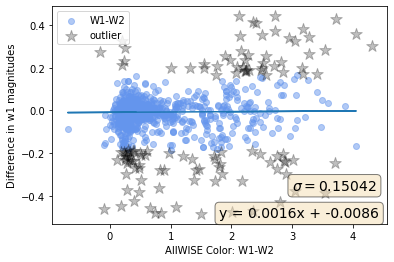

In [485]:
# making the color correction - w1 band

cat_mags_3sigmaw1 = cat_mags.loc[cat_mags['sigma_3w1']==True]

y = correctioncat['w1_comp']
x = correctioncat['w1_w2_allwise']

aw1_final, bw1_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

w1corr_mse = 1/(len(y)) * residual
print(residual, w1corr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(aw1_final, bw1_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_w1w2, )

plt.ylabel('Difference in w1 magnitudes')
plt.xlabel('AllWISE Color: W1-W2')
#plt.title('Photometric Correction of w1 magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'W1-W2')
plt.scatter(cat_mags_3sigmaw1['w1_w2_allwise'], cat_mags_3sigmaw1['w1_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.plot(x, aw1_final*x + bw1_final) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.8, -0.45, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(3, -0.32, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('w1corr.png')

[3.89429797] [0.00213855]


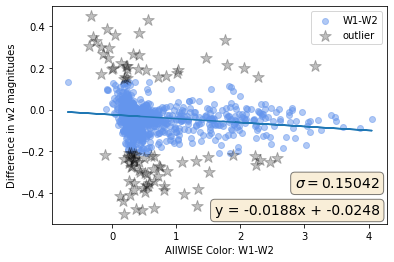

In [484]:
# making the color correction - w2 band

cat_mags_3sigmaw2 = cat_mags.loc[cat_mags['sigma_3w2']==True]

y = correctioncat['w2_comp']
x = correctioncat['w1_w2_allwise']

aw2_final, bw2_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

w2corr_mse = 1/(len(y)) * residual
print(residual, w2corr_mse)

textstr = 'y = {:.4f}x + {:.4f}'.format(aw2_final, bw2_final)
textstr2 = r'$\sigma=%.5f$' % (sigma_w1w2, )

plt.ylabel('Difference in w2 magnitudes')
plt.xlabel('AllWISE Color: W1-W2')
#plt.title('Photometric Correction of w2 magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'W1-W2')
plt.scatter(cat_mags_3sigmaw2['w1_w2_allwise'], cat_mags_3sigmaw2['w2_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.plot(x, aw2_final*x + bw2_final) 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.6, -0.45, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(2.85, -0.32, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('w2corr.png')

In [116]:
# finds all UC Stars with an ra/dec that returns a vista query result

insearch_vista = []
ra_list = []
dec_list = []
radius = 0.007

for i in range(len(ucs)):
    ra0 = ucs.iloc[i, 1] # in degrees, right ascension
    ra_list.append(ra0)
    dec0 = ucs.iloc[i, 2] # in degrees, declinarion
    dec_list.append(dec0)
    query = """
    SELECT ra2000, dec2000, japermag3, ksapermag3, sourcename
    FROM vhs_dr5.vhs_cat_v3,
    q3c_dist(ra2000, dec2000, {:f}, {:f}) as rdist
    WHERE q3c_radial_query(ra2000, dec2000, {:f}, {:f}, {:f}) 
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    if len(sources) >= 1:   # need at least one result 
        insearch_vista.append(True)
    else:
        insearch_vista.append(False)


In [117]:
# add true/false search column

ucs['Vista_Search'] = np.array(insearch_vista)

In [118]:
# take only the columns labelled with 'true' to get all potential matches

vista_search = ucs.loc[ucs['Vista_Search']==True]
vista_search = vista_search.reset_index(drop=True)
vista_search = vista_search.rename(columns={'ra_j2000_formula' : 'ucs_ra', 'dec_j2000_formula' : 'ucs_dec'})
vista_search

,name,ucs_ra,ucs_dec,pmra_formula,r_P1,i_P1,z_P1,y_P1,rerr_P1,ierr_P1,...,dec_j2000_allwise,W1,W2,W1err,W2err,multiple_unresolved_in_this_table,sptnumabs_formula,DES_Search,Cat_Search,Vista_Search
0,WISEA J000131.93-084126.9,0.3821,-8.6900,339.90,NaN,20.21,18.57,17.57,NaN,0.03,...,-8.690899,14.344,13.993,0.031,0.047,N,11.0,False,True,True
1,2MASS J00040288-6410358,1.0127,-64.1768,64.00,NaN,NaN,NaN,NaN,NaN,NaN,...,-64.176769,13.409,12.959,0.024,0.026,N,11.0,True,True,True
2,WISEA J000430.66-260402.3,1.1278,-26.0666,-1.00,NaN,NaN,20.12,18.62,NaN,NaN,...,-26.067316,15.211,14.127,0.038,0.044,N,22.0,False,True,True
3,LHS 102BC,1.1453,-40.7351,671.10,NaN,NaN,NaN,NaN,NaN,NaN,...,-40.739533,10.736,10.463,0.022,0.020,Y: Goli04b,15.0,False,False,True
4,2MASS J00044144-2058298,1.1728,-20.9750,758.23,19.15,16.41,14.94,14.06,0.01,0.00,...,-20.974705,11.056,10.745,0.023,0.020,N,8.0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,SDSS J235835.45-000909.5,359.6478,-0.1526,-97.00,NaN,21.09,19.55,18.73,NaN,0.04,...,NaN,NaN,NaN,NaN,NaN,N,10.0,True,True,True
999,SDSS J235841.98+000622.0,359.6749,0.1060,128.00,NaN,21.82,20.41,19.54,NaN,0.02,...,0.105998,15.439,15.177,0.044,0.094,N,11.5,False,True,True
1000,APMPM J2359-6246,359.6787,-62.7618,590.65,NaN,NaN,NaN,NaN,NaN,NaN,...,-62.761543,10.305,10.088,0.023,0.020,N,6.0,True,True,True
1001,PSO J359.8867-01.8651,359.8868,-1.8647,-6.00,NaN,NaN,20.32,19.10,NaN,NaN,...,-1.865103,15.263,14.552,0.040,0.058,N,21.0,False,False,True


In [119]:
# color spread

vista_search['J_H'] = vista_search['J_2MASS'] - vista_search['H_2MASS']
vista_search['H_K'] = vista_search['H_2MASS'] - vista_search['Ks_2MASS']

jh_array = vista_search['J_H'].to_numpy()
jh_array = jh_array[~np.isnan(jh_array)]
mu_jh = jh_array.mean()
sigma_jh = jh_array.std()
print(mu_jh, sigma_jh)

hk_array = vista_search['H_K'].to_numpy()
hk_array = hk_array[~np.isnan(hk_array)]
mu_hk = hk_array.mean()
sigma_hk = hk_array.std()
print(mu_hk, sigma_hk)

0.7354949494949495 0.30826365711469256
0.4763765743073048 0.2753330303237464


In [120]:
vista_search.columns

Index(['name', 'ucs_ra', 'ucs_dec', 'pmra_formula', 'r_P1', 'i_P1', 'z_P1',
       'y_P1', 'rerr_P1', 'ierr_P1', 'zerr_P1', 'yerr_P1', 'ra_epoch_2mass',
       'dec_epoch_2mass', 'J_2MASS', 'H_2MASS', 'Ks_2MASS', 'Jerr_2MASS',
       'Herr_2MASS', 'Kserr_2MASS', 'ra_j2000_allwise', 'dec_j2000_allwise',
       'W1', 'W2', 'W1err', 'W2err', 'multiple_unresolved_in_this_table',
       'sptnumabs_formula', 'DES_Search', 'Cat_Search', 'Vista_Search', 'J_H',
       'H_K'],
      dtype='object')

In [121]:
# takes the 1003 stars from ucs and matches them to vista

vista_mags = pd.DataFrame()
no_of_matches = []

for i in range(len(vista_search)):
    ra0 = vista_search.iloc[i, 1]  # in degrees, right ascension
    dec0 = vista_search.iloc[i, 2] # in degrees, declinarion
    js = vista_search.iloc[i, 14] # j 2mass photometry
    hs = vista_search.iloc[i, 15] # h 2mass photometry
    ks = vista_search.iloc[i, 16] # k 2mass photometry
    query = """
    SELECT ra2000, dec2000, japermag3, hapermag3, ksapermag3, japermag3err, hapermag3err, ksapermag3err
    FROM vhs_dr5.vhs_cat_v3,
    q3c_dist(ra2000, dec2000, {:f}, {:f}) as rdist
    WHERE q3c_radial_query(ra2000, dec2000, {:f}, {:f}, {:f})
    order by rdist
    """.format(ra0,dec0,ra0,dec0,radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_comp'] = (sources['ra2000'] - ra0) * np.cos(dec0 * (np.pi / 180))  # difference in right ascension
    sources['dec_comp'] = sources['dec2000'] - dec0                                # difference in declination
    sources['j_comp'] = js - sources['japermag3']
    sources['h_comp'] = hs - sources['hapermag3']
    sources['k_comp'] = ks - sources['ksapermag3']
    sources = sources[sources.j_comp.abs() <= 0.5]
    sources = sources[sources.k_comp.abs() <= 0.5]
    closestmatch = sources.head(1)
    closestmatch['ucs_ra'] = ra0
    closestmatch['ucs_dec'] = dec0
    closestmatch['J_2mass'] = js
    closestmatch['H_2mass'] = hs
    closestmatch['Ks_2mass'] = ks
    no_of_matches.append(len(sources))
    vista_mags = pd.concat([vista_mags, closestmatch], ignore_index = True)


In [122]:
vista_mags['binary'] = vista_search['multiple_unresolved_in_this_table']
vista_mags['pmra'] = vista_search['pmra_formula']
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,j_comp,h_comp,k_comp,ucs_ra,ucs_dec,J_2mass,H_2mass,Ks_2mass,binary,pmra
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,0.001140,-0.001020,0.084979,NaN,0.042324,0.3821,-8.6900,15.712,15.034,14.698,N,339.90
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.000028,-0.000016,0.121377,NaN,0.018933,1.0127,-64.1768,15.786,14.831,14.009,N,64.00
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.000032,-0.001110,0.353457,NaN,-0.108360,1.1278,-26.0666,16.487,15.587,15.523,N,-1.00
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,0.002477,-0.005665,0.129911,NaN,0.006006,1.1453,-40.7351,13.109,12.055,11.396,Y: Goli04b,671.10
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,0.003482,0.000447,0.049769,NaN,-0.096594,1.1728,-20.9750,12.404,11.834,11.396,N,758.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.000265,-0.000585,0.029043,-0.288622,0.441587,359.6478,-0.1526,17.111,16.451,16.669,N,-8.00
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,0.000325,-0.000067,0.002208,0.029338,-0.262735,359.6749,0.1060,17.172,16.523,15.622,N,-150.00
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,0.002131,0.000362,-0.040283,NaN,-0.085347,359.6787,-62.7618,11.387,10.827,10.515,N,-9.00
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.000082,-0.000339,0.256980,-0.275471,0.137027,359.8868,-1.8647,17.241,16.030,16.090,N,-6.30


In [123]:
highpmra_vhs = vista_mags.reindex(vista_mags.pmra.abs().sort_values(ascending = False).index).head(20)
binaries_vhs = vista_mags[vista_mags.binary != 'N']

In [124]:
# converting to arc seconds

vista_mags['dec_comp'] = vista_mags['dec_comp'].apply(lambda x: x*3600)
vista_mags['ra_comp'] = vista_mags['ra_comp'].apply(lambda x: x*3600)

In [125]:
# statistics

ra_v_array = vista_mags['ra_comp'].to_numpy()
dec_v_array = vista_mags['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 15 arcseconds
ra_v_array = [x for x in ra_v_array if (x <= 15 and x >= -15)]
ra_v_array = np.asarray(ra_v_array)
dec_v_array = [x for x in dec_v_array  if (x <= 15 and x >= -15)]
dec_v_array = np.asarray(dec_v_array )

mu_ra_v = ra_v_array.mean()
mu_dec_v = dec_v_array.mean()
sigma_ra_v = ra_v_array.std()
sigma_dec_v = dec_v_array.std()
sigma_pos_v = np.sqrt(sigma_ra_v**2 + sigma_dec_v**2)

In [126]:
vista_mags.columns

Index(['ra2000', 'dec2000', 'japermag3', 'hapermag3', 'ksapermag3',
       'japermag3err', 'hapermag3err', 'ksapermag3err', 'ra_comp', 'dec_comp',
       'j_comp', 'h_comp', 'k_comp', 'ucs_ra', 'ucs_dec', 'J_2mass', 'H_2mass',
       'Ks_2mass', 'binary', 'pmra'],
      dtype='object')

In [127]:
# flag 3 sigma outliers

upper_ra_v, lower_ra_v = mu_ra_v + 3*sigma_pos_v, mu_ra_v - 3*sigma_pos_v
upper_dec_v, lower_dec_v = mu_dec_v + 3*sigma_pos_v, mu_dec_v - 3*sigma_pos_v
sigma_flag = []

for i in range(len(vista_mags)):
    if vista_mags.iloc[i, 8] >= upper_ra_v:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 9] >= upper_dec_v:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 8] <= lower_ra_v:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 9] <= lower_dec_v:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vista_mags['sigma_3'] = np.array(sigma_flag)
vista_mags_3sigma = vista_mags.loc[vista_mags['sigma_3']==True]
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,h_comp,k_comp,ucs_ra,ucs_dec,J_2mass,H_2mass,Ks_2mass,binary,pmra,sigma_3
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,NaN,0.042324,0.3821,-8.6900,15.712,15.034,14.698,N,339.90,False
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,NaN,0.018933,1.0127,-64.1768,15.786,14.831,14.009,N,64.00,False
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,NaN,-0.108360,1.1278,-26.0666,16.487,15.587,15.523,N,-1.00,False
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,8.918503,-20.393698,...,NaN,0.006006,1.1453,-40.7351,13.109,12.055,11.396,Y: Goli04b,671.10,True
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,12.534193,1.610209,...,NaN,-0.096594,1.1728,-20.9750,12.404,11.834,11.396,N,758.23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.953008,-2.104428,...,-0.288622,0.441587,359.6478,-0.1526,17.111,16.451,16.669,N,-8.00,False
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,1.168728,-0.239582,...,0.029338,-0.262735,359.6749,0.1060,17.172,16.523,15.622,N,-150.00,False
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,NaN,-0.085347,359.6787,-62.7618,11.387,10.827,10.515,N,-9.00,False
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.296332,-1.219063,...,-0.275471,0.137027,359.8868,-1.8647,17.241,16.030,16.090,N,-6.30,False


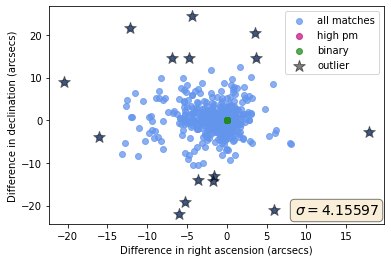

In [128]:
# plot the separation

textstr = ''r'$\sigma=%.5f$' % (sigma_pos_v, )

plt.scatter(vista_mags['dec_comp'].values, vista_mags['ra_comp'].values, alpha = 0.75, color = 'cornflowerblue', label = 'all matches')
plt.scatter(highpmra_vhs['dec_comp'].values, highpmra_vhs['ra_comp'].values, alpha = 0.75, color = 'mediumvioletred', label = 'high pm')
plt.scatter(binaries_vhs['dec_comp'].values, binaries_vhs['ra_comp'].values, alpha = 0.75, color = 'forestgreen', label = 'binary')
plt.scatter(vista_mags_3sigma['dec_comp'].values, vista_mags_3sigma['ra_comp'].values, 150, alpha = 0.5, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
#plt.title('Accuracy according to Coordinates (VISTA)', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(8.5, -19.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('cooreaccuracyvhs.png')

In [129]:
# need to convert to radians from degrees (1" × π/(180))
vista_mags['ra2000'] = vista_mags['ra2000'].apply(lambda x: x * (np.pi/180))
vista_mags['dec2000'] = vista_mags['dec2000'].apply(lambda x: x * (np.pi/180))
vista_mags['ucs_ra'] = vista_mags['ucs_ra'].apply(lambda x: x * (np.pi/180))
vista_mags['ucs_dec'] = vista_mags['ucs_dec'].apply(lambda x: x * (np.pi/180))

In [130]:
vista_mags.columns

Index(['ra2000', 'dec2000', 'japermag3', 'hapermag3', 'ksapermag3',
       'japermag3err', 'hapermag3err', 'ksapermag3err', 'ra_comp', 'dec_comp',
       'j_comp', 'h_comp', 'k_comp', 'ucs_ra', 'ucs_dec', 'J_2mass', 'H_2mass',
       'Ks_2mass', 'binary', 'pmra', 'sigma_3'],
      dtype='object')

In [131]:
# calculate radial and angular separation

ang_dis_list = []

for i in range(len(vista_mags)):
    ra_vista = vista_mags.iloc[i, 0]     # in radians, right ascension of VISTA
    dec_vista = vista_mags.iloc[i, 1]    # in radians, declinarion of VISTA
    ra_ucs = vista_mags.iloc[i, 13]      # in radians, right ascension of DES
    dec_ucs = vista_mags.iloc[i, 14]     # in radians, declinarion of DES
    ang_dis = np.arccos(np.sin(dec_ucs)*np.sin(dec_vista) + np.cos(dec_ucs)*np.cos(dec_vista)*np.cos(ra_ucs - ra_vista))
    ang_dis_list.append(ang_dis)

vista_mags['angular_sep'] = np.array(ang_dis_list)

# convert ra and dec from radians back to degrees
vista_mags['ucs_dec'] = vista_mags['ucs_dec'].apply(lambda x: x * (180/ np.pi))
vista_mags['ucs_ra'] = vista_mags['ucs_ra'].apply(lambda x: x * (180/ np.pi))
vista_mags['dec2000'] = vista_mags['dec2000'].apply(lambda x: x * (180/ np.pi))
vista_mags['ra2000'] = vista_mags['ra2000'].apply(lambda x: x * (180/ np.pi))

In [132]:
# convert angular separation to arcseconds
vista_mags['angular_sep'] = vista_mags['angular_sep'].apply(lambda x: x * (648000/np.pi))


In [133]:
# statistics

ang_array_v = vista_mags['angular_sep'].to_numpy()

# manually get rid of outliers: +/- 12
ang_array_v = [x for x in ang_array_v if (x <= 12 and x >= -12)]
ang_array_v = np.asarray(ang_array_v)

mu_ang_v = ang_array_v.mean()
sigma_ang_v = ang_array_v.std()


In [134]:
vista_mags.columns.get_loc('angular_sep')

21

In [135]:
# flag 3 sigma outliers for angular separation:

upper_ang_v, lower_ang_v = mu_ang_v + 3*sigma_ang_v, mu_ang_v - 3*sigma_ang_v
sigma_flag = []

for i in range(len(vista_mags)):
    if vista_mags.iloc[i, 21] >= upper_ang_v:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 21] <= lower_ang_v:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vista_mags['sigma_3ang'] = np.array(sigma_flag)
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,ucs_ra,ucs_dec,J_2mass,H_2mass,Ks_2mass,binary,pmra,sigma_3,angular_sep,sigma_3ang
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,0.3821,-8.6900,15.712,15.034,14.698,N,339.90,False,5.506140,False
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,1.0127,-64.1768,15.786,14.831,14.009,N,64.00,False,0.118003,False
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,1.1278,-26.0666,16.487,15.587,15.523,N,-1.00,False,3.997529,False
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,8.918503,-20.393698,...,1.1453,-40.7351,13.109,12.055,11.396,Y: Goli04b,671.10,True,22.258388,True
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,12.534193,1.610209,...,1.1728,-20.9750,12.404,11.834,11.396,N,758.23,False,12.637216,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.953008,-2.104428,...,359.6478,-0.1526,17.111,16.451,16.669,N,-8.00,False,2.310159,False
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,1.168728,-0.239582,...,359.6749,0.1060,17.172,16.523,15.622,N,-150.00,False,1.193034,False
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,359.6787,-62.7618,11.387,10.827,10.515,N,-9.00,False,7.780011,False
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.296332,-1.219063,...,359.8868,-1.8647,17.241,16.030,16.090,N,-6.30,False,1.254561,False


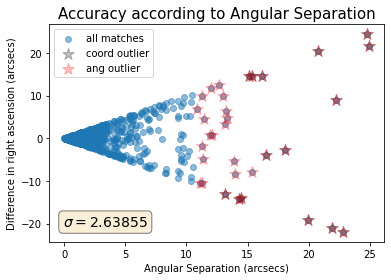

In [136]:
# plot separation in right ascention and declination for closest coordinate matches

vista_mags_3sigma = vista_mags.loc[vista_mags['sigma_3']==True]
vista_mags_3sigma_ang = vista_mags.loc[vista_mags['sigma_3ang']==True]

textstr = ''r'$\sigma=%.5f$' % (sigma_ang_v, )

plt.scatter(vista_mags['angular_sep'].values, vista_mags['ra_comp'].values, alpha = 0.5, label = 'all matches')
plt.scatter(vista_mags_3sigma['angular_sep'].values, vista_mags_3sigma['ra_comp'].values, 150, alpha = 0.25, \
            color = 'k', marker= '*', label = 'coord outlier')
plt.scatter(vista_mags_3sigma_ang['angular_sep'].values, vista_mags_3sigma_ang['ra_comp'].values, 150, alpha = 0.25, \
            color = 'r', marker= '*', label = 'ang outlier')
plt.xlabel('Angular Separation (arcsecs)')
plt.ylabel('Difference in right ascension (arcsecs)')
plt.title('Accuracy according to Angular Separation', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-0.1, -18, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [137]:
# statistics on mag spread

j_diff_array = vista_mags['j_comp'].to_numpy()

# getting rid of outliers by hand first: +/- 0.3
j_diff_array = [x for x in j_diff_array if (x <= 0.3 and x >= -0.3)]
j_diff_array = np.asarray(j_diff_array)

mu_j = j_diff_array.mean()
sigma_j = j_diff_array.std()

upper_j, lower_j = mu_j + 3*sigma_j, mu_j - 3*sigma_j

In [138]:
vista_mags.columns.get_loc('j_comp')

10

In [139]:
# flag 3 sigma outliers for j mags:

sigma_flag = []

for i in range(len(vista_mags)):
    if vista_mags.iloc[i, 10] >= upper_j:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 10] <= lower_j:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vista_mags['sigma_3j'] = np.array(sigma_flag)
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,ucs_dec,J_2mass,H_2mass,Ks_2mass,binary,pmra,sigma_3,angular_sep,sigma_3ang,sigma_3j
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,-8.6900,15.712,15.034,14.698,N,339.90,False,5.506140,False,False
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,-64.1768,15.786,14.831,14.009,N,64.00,False,0.118003,False,False
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,-26.0666,16.487,15.587,15.523,N,-1.00,False,3.997529,False,False
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,8.918503,-20.393698,...,-40.7351,13.109,12.055,11.396,Y: Goli04b,671.10,True,22.258388,True,False
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,12.534193,1.610209,...,-20.9750,12.404,11.834,11.396,N,758.23,False,12.637216,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.953008,-2.104428,...,-0.1526,17.111,16.451,16.669,N,-8.00,False,2.310159,False,False
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,1.168728,-0.239582,...,0.1060,17.172,16.523,15.622,N,-150.00,False,1.193034,False,False
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,-62.7618,11.387,10.827,10.515,N,-9.00,False,7.780011,False,False
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.296332,-1.219063,...,-1.8647,17.241,16.030,16.090,N,-6.30,False,1.254561,False,False


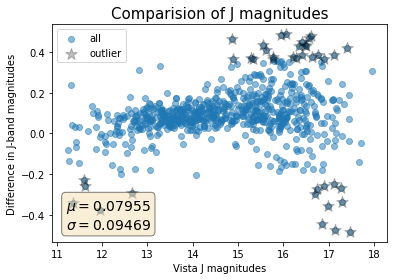

In [140]:
# compare j-band magnitudes from ucs with vista

vista_mags_3sigmaj = vista_mags.loc[vista_mags['sigma_3j']==True]

y = vista_mags['j_comp']
x = vista_mags['japermag3']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_j, ),
    r'$\sigma=%.5f$' % (sigma_j, )))

plt.xlabel('Vista J magnitudes')
plt.ylabel('Difference in J-band magnitudes')
plt.title('Comparision of J magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(vista_mags_3sigmaj['japermag3'].values, vista_mags_3sigmaj['j_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(11.2, -0.32, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [141]:
# statistics on mag spread

h_diff_array = vista_mags['h_comp'].to_numpy()

# getting rid of outliers by hand first: +/- 0.3
h_diff_array = [x for x in h_diff_array if (x <= 0.3 and x >= -0.3)]
h_diff_array = np.asarray(h_diff_array)

mu_h = h_diff_array.mean()
sigma_h = h_diff_array.std()

upper_h, lower_h = mu_h + 3*sigma_h, mu_h - 3*sigma_h

In [142]:
# flag 3 sigma outliers for j mags:

sigma_flag = []

for i in range(len(vista_mags)):
    if vista_mags.iloc[i, 11] >= upper_h:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 11] <= lower_h:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vista_mags['sigma_3h'] = np.array(sigma_flag)
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,J_2mass,H_2mass,Ks_2mass,binary,pmra,sigma_3,angular_sep,sigma_3ang,sigma_3j,sigma_3h
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,15.712,15.034,14.698,N,339.90,False,5.506140,False,False,False
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,15.786,14.831,14.009,N,64.00,False,0.118003,False,False,False
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,16.487,15.587,15.523,N,-1.00,False,3.997529,False,False,False
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,8.918503,-20.393698,...,13.109,12.055,11.396,Y: Goli04b,671.10,True,22.258388,True,False,False
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,12.534193,1.610209,...,12.404,11.834,11.396,N,758.23,False,12.637216,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.953008,-2.104428,...,17.111,16.451,16.669,N,-8.00,False,2.310159,False,False,False
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,1.168728,-0.239582,...,17.172,16.523,15.622,N,-150.00,False,1.193034,False,False,False
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,11.387,10.827,10.515,N,-9.00,False,7.780011,False,False,False
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.296332,-1.219063,...,17.241,16.030,16.090,N,-6.30,False,1.254561,False,False,False


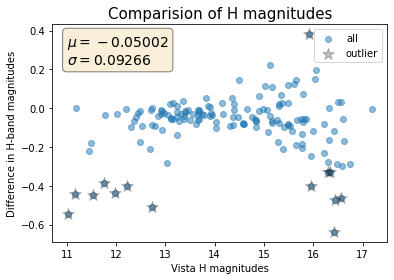

In [144]:
# compare j-band magnitudes from ucs with vista

vista_mags_3sigmah = vista_mags.loc[vista_mags['sigma_3h']==True]

y = vista_mags['h_comp']
x = vista_mags['hapermag3']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_h, ),
    r'$\sigma=%.5f$' % (sigma_h, )))

plt.xlabel('Vista H magnitudes')
plt.ylabel('Difference in H-band magnitudes')
plt.title('Comparision of H magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(vista_mags_3sigmah['hapermag3'].values, vista_mags_3sigmah['h_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(11, 0.38, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [145]:
# statistics on mag spread

k_diff_array = vista_mags['k_comp'].to_numpy()

# getting rid of outliers by hand first: +/- 0.3
k_diff_array = [x for x in k_diff_array if (x <= 0.3 and x >= -0.3)]
k_diff_array = np.asarray(k_diff_array)

mu_k = k_diff_array.mean()
sigma_k = k_diff_array.std()

upper_k, lower_k = mu_k + 3*sigma_k, mu_k - 3*sigma_k

In [146]:
# flag 3 sigma outliers for j mags:

sigma_flag = []

for i in range(len(vista_mags)):
    if vista_mags.iloc[i, 12] >= upper_k:
        sigma_flag.append(True)
    elif vista_mags.iloc[i, 12] <= lower_k:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vista_mags['sigma_3k'] = np.array(sigma_flag)
vista_mags

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,H_2mass,Ks_2mass,binary,pmra,sigma_3,angular_sep,sigma_3ang,sigma_3j,sigma_3h,sigma_3k
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,15.034,14.698,N,339.90,False,5.506140,False,False,False,False
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,14.831,14.009,N,64.00,False,0.118003,False,False,False,False
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,15.587,15.523,N,-1.00,False,3.997529,False,False,False,False
3,1.148569,-40.740765,12.979089,NaN,11.389994,0.001049,NaN,0.000994,8.918503,-20.393698,...,12.055,11.396,Y: Goli04b,671.10,True,22.258388,True,False,False,False
4,1.176529,-20.974553,12.354231,NaN,11.492594,0.000987,NaN,0.001426,12.534193,1.610209,...,11.834,11.396,N,758.23,False,12.637216,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,359.647535,-0.153185,17.081957,16.739622,16.227413,0.017197,0.026261,0.028866,-0.953008,-2.104428,...,16.451,16.669,N,-8.00,False,2.310159,False,False,False,True
698,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.020740,0.019254,1.168728,-0.239582,...,16.523,15.622,N,-150.00,False,1.193034,False,False,False,False
699,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,10.827,10.515,N,-9.00,False,7.780011,False,False,False,False
700,359.886718,-1.865039,16.984020,16.305471,15.952973,0.012848,0.017190,0.025049,-0.296332,-1.219063,...,16.030,16.090,N,-6.30,False,1.254561,False,False,False,False


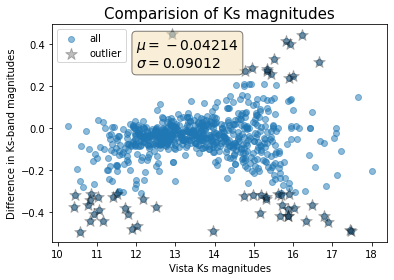

In [147]:
# compare ks-band magnitudes from ucs with vista

vista_mags_3sigmak = vista_mags.loc[vista_mags['sigma_3k']==True]

y = vista_mags['k_comp']
x = vista_mags['ksapermag3']

textstr = '\n'.join((
    r'$\mu=%.5f$' % (mu_k, ),
    r'$\sigma=%.5f$' % (sigma_k, )))

plt.xlabel('Vista Ks magnitudes')
plt.ylabel('Difference in Ks-band magnitudes')
plt.title('Comparision of Ks magnitudes', fontsize = 15)
plt.scatter(x, y, alpha = 0.5, label = 'all')
plt.scatter(vista_mags_3sigmak['ksapermag3'].values, vista_mags_3sigmak['k_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(12, 0.43, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [148]:
# add color columns

vista_mags['J_H'] = vista_mags['J_2mass'] - vista_mags['H_2mass']
vista_mags['H_K'] = vista_mags['H_2mass'] - vista_mags['Ks_2mass']
vista_mags['J_K'] = vista_mags['J_2mass'] - vista_mags['Ks_2mass']

In [149]:
# mask outliers:

correctionvista = vista_mags.loc[vista_mags['sigma_3']==False]    
correctionvista = correctionvista.loc[correctionvista['sigma_3h']==False] 
correctionvista = correctionvista.loc[correctionvista['sigma_3j']==False]   
correctionvista = correctionvista.loc[correctionvista['sigma_3k']==False]   
correctionvista = correctionvista.loc[correctionvista['sigma_3ang']==False]   
correctionvista = correctionvista.reset_index(drop = True)
correctionvista

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_comp,dec_comp,...,pmra,sigma_3,angular_sep,sigma_3ang,sigma_3j,sigma_3h,sigma_3k,J_H,H_K,J_K
0,0.383253,-8.691020,15.627021,NaN,14.655676,0.006469,NaN,0.009785,4.104088,-3.670706,...,339.90,False,5.506140,False,False,False,False,0.678,0.336,1.014
1,1.012635,-64.176816,15.664623,NaN,13.990067,0.005162,NaN,0.005649,-0.102359,-0.058799,...,64.00,False,0.118003,False,False,False,False,0.955,0.822,1.777
2,1.127764,-26.067710,16.133543,NaN,15.631360,0.009123,NaN,0.026405,-0.116139,-3.995843,...,-1.00,False,3.997529,False,False,False,False,0.900,0.064,0.964
3,1.742308,-64.615326,13.275948,NaN,12.163472,0.001580,NaN,0.001751,1.400940,-0.812589,...,86.90,False,1.619540,False,False,False,False,0.721,0.495,1.216
4,1.783835,-24.968135,13.055741,NaN,12.084828,0.001169,NaN,0.001647,3.050032,-0.844344,...,188.54,False,3.164744,False,False,False,False,0.668,0.387,1.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,358.593027,-8.191615,17.083893,NaN,14.927217,0.014772,NaN,0.009681,1.165357,-0.773425,...,-7.00,False,1.398660,False,False,False,False,1.293,1.172,2.465
581,359.226251,-15.889037,15.557752,NaN,15.566377,0.004861,NaN,0.017025,-6.747815,-8.054198,...,-289.40,False,10.507265,False,False,False,False,0.194,-0.141,0.053
582,359.675225,0.105933,17.169792,16.493662,15.884735,0.015772,0.02074,0.019254,1.168728,-0.239582,...,-150.00,False,1.193034,False,False,False,False,0.649,0.901,1.550
583,359.683355,-62.761438,11.427283,NaN,10.600347,0.000592,NaN,0.000795,7.670066,1.303052,...,-9.00,False,7.780011,False,False,False,False,0.560,0.312,0.872


In [150]:
# standard deviation

jk_array = correctionvista['J_K'].to_numpy()
sigma_jk = jk_array.std()
j_array = correctionvista['j_comp'].to_numpy()
sigma_j_diff = j_array.std()
sigma_jcomp = np.sqrt(sigma_jk**2 + sigma_j_diff**2)

[4.86538813] [0.0083169]


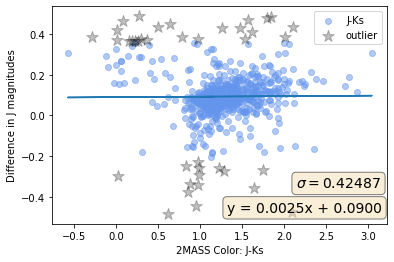

In [483]:
# correction in j

vista_mags_3sigmaj = vista_mags.loc[vista_mags['sigma_3j']==True]

x = correctionvista['J_K']
y = correctionvista['j_comp']

aj_final, bj_final = np.polyfit(x, y, 1)

params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

jcorr_mse = 1/(len(y)) * residual
print(residual, jcorr_mse)

textstr = ''r'$\sigma=%.5f$' % (sigma_jcomp, )
textstr2 = 'y = {:.4f}x + {:.4f}'.format(aj_final, bj_final)

plt.ylabel('Difference in J magnitudes')
plt.xlabel('2MASS Color: J-Ks')
#plt.title('Photometric Correction of J magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'J-Ks')
plt.scatter(vista_mags_3sigmaj['J_K'].values, vista_mags_3sigmaj['j_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.plot(x, aj_final*x + bj_final) 
plt.text(2.14, -0.3, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(1.32, -0.42, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('jcorr.png')

In [152]:
# standard deviation

hdiff_array = correctionvista['h_comp'].to_numpy()
sigma_hdiff = hdiff_array.std()
sigma_hcomp = np.sqrt(sigma_jk**2 + sigma_hdiff**2)

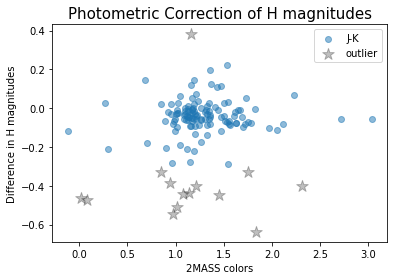

In [153]:
# correction in h

vista_mags_3sigmah = vista_mags.loc[vista_mags['sigma_3h']==True]


x = correctionvista['J_K']
y = correctionvista['h_comp']

ah_final, bh_final = np.polyfit(x, y, 1)

textstr = ''r'$\sigma=%.5f$' % (sigma_hcomp, )
textstr2 = 'y = {:.4f}x + {:.4f}'.format(ah_final, bh_final)

plt.ylabel('Difference in H magnitudes')
plt.xlabel('2MASS colors')
plt.title('Photometric Correction of H magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.scatter(x, y, alpha = 0.5, label = 'J-K')
plt.scatter(vista_mags_3sigmah['J_K'].values, vista_mags_3sigmah['h_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.plot(x, ah_final*x + bh_final) 
#plt.text(2.24, -0.32, textstr, fontsize=14, verticalalignment='top', bbox=props)
#plt.text(1.45, -0.42, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [154]:
# standard deviation

kdiff_array = correctionvista['k_comp'].to_numpy()
sigma_kdiff = kdiff_array.std()
sigma_kcomp = np.sqrt(sigma_jk**2 + sigma_kdiff**2)

[3.96542482] [0.0067785]


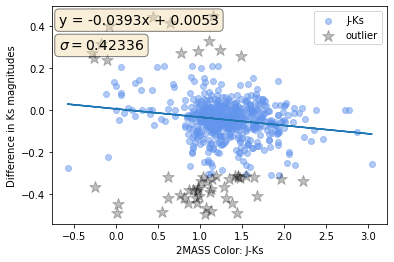

In [482]:
# correction in K

vista_mags_3sigmak = vista_mags.loc[vista_mags['sigma_3k']==True]

x = correctionvista['J_K']
y = correctionvista['k_comp']

ak_final, bk_final = np.polyfit(x, y, 1)
params, residual, stuff1, stuff2, stuff3 = np.polyfit(x, y, 1, full = True)

kcorr_mse = 1/(len(y)) * residual
print(residual, kcorr_mse)

textstr = ''r'$\sigma=%.5f$' % (sigma_kcomp, )
textstr2 = 'y = {:.4f}x + {:.4f}'.format(ak_final, bk_final)

plt.ylabel('Difference in Ks magnitudes')
plt.xlabel('2MASS Color: J-Ks')
#plt.title('Photometric Correction of Ks magnitudes', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.scatter(x, y, alpha = 0.5, color = 'cornflowerblue', label = 'J-Ks')
plt.scatter(vista_mags_3sigmak['J_K'].values, vista_mags_3sigmak['k_comp'].values, 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.plot(x, ak_final*x + bk_final) 
plt.text(-0.68, 0.34, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.text(-0.68, 0.46, textstr2, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('kscorr.png')


In [156]:
sample = ultracoolsheet[['ra_j2000_formula', 'dec_j2000_formula', 'sptnumabs_formula', 'r_P1', 'i_P1', 'z_P1', 'y_P1', \
                         'J_2MASS', 'Ks_2MASS', 'W1', 'W2', 'pmra_formula', 'pmdec_formula']].copy()
sample = sample.rename(columns  = {'pmra_formula' : 'pmra', 'pmdec_formula' : 'pmdec'})
sample = sample.dropna()
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 5 to 2939
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ra_j2000_formula   863 non-null    float64
 1   dec_j2000_formula  863 non-null    float64
 2   sptnumabs_formula  863 non-null    float64
 3   r_P1               863 non-null    float64
 4   i_P1               863 non-null    float64
 5   z_P1               863 non-null    float64
 6   y_P1               863 non-null    float64
 7   J_2MASS            863 non-null    float64
 8   Ks_2MASS           863 non-null    float64
 9   W1                 863 non-null    float64
 10  W2                 863 non-null    float64
 11  pmra               863 non-null    float64
 12  pmdec              863 non-null    float64
dtypes: float64(13)
memory usage: 94.4 KB


In [157]:
# add color columns

sample['r_i'] = sample['r_P1'] - sample['i_P1']
sample['i_z'] = sample['i_P1'] - sample['z_P1']
sample['z_y'] = sample['z_P1'] - sample['y_P1']
sample['J_K'] = sample['J_2MASS'] - sample['Ks_2MASS']
sample['w1_w2'] = sample['W1'] - sample['W2']

In [158]:
# photometric correction of sample

sample['DES_r'] = sample['r_P1'] - (ar_final * sample['r_i']) - br_final
sample['DES_i'] = sample['i_P1'] - (ai_final * sample['i_z']) - bi_final
sample['DES_z'] = sample['z_P1'] - (az_final * sample['z_y']) - bz_final
sample['DES_y'] = sample['y_P1'] - (ay_final * sample['z_y']) - by_final
sample['VISTA_J'] = sample['J_2MASS'] - (aj_final * sample['J_K']) - bj_final
sample['VISTA_Ks'] = sample['Ks_2MASS'] - (ak_final * sample['J_K']) - bk_final
sample['CAT_W1'] = sample['W1'] - (aw1_final * sample['w1_w2']) - bw1_final
sample['CAT_W2'] = sample['W2'] - (aw2_final * sample['w1_w2']) - bw2_final
sample

,ra_j2000_formula,dec_j2000_formula,sptnumabs_formula,r_P1,i_P1,z_P1,y_P1,J_2MASS,Ks_2MASS,W1,...,J_K,w1_w2,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2
5,0.9263,-28.3781,7.5,19.41,16.77,15.43,14.67,13.068,11.972,11.705,...,1.096,0.186,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267
9,1.1728,-20.9750,8.0,19.15,16.41,14.94,14.06,12.404,11.396,11.056,...,1.008,0.311,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614
12,1.4519,-21.9555,9.0,19.95,17.11,15.69,14.84,13.274,12.201,11.891,...,1.073,0.267,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788
15,1.5854,-17.3475,12.5,22.49,20.26,18.83,17.80,15.662,14.010,13.472,...,1.652,0.293,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276
20,1.6977,-8.8765,6.0,17.29,14.95,13.91,13.36,11.967,11.090,10.884,...,0.877,0.224,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,357.9603,-25.6269,8.0,19.29,16.56,15.13,14.23,12.471,11.269,10.951,...,1.202,0.254,18.729468,16.105663,14.631025,14.147254,12.378064,11.311010,10.959220,10.726544
2919,358.0211,-11.0122,7.0,19.18,16.49,15.23,14.49,12.840,11.742,11.463,...,1.098,0.312,18.642824,16.123727,14.816750,14.418452,12.747321,11.779918,11.471128,11.181632
2921,358.4977,-8.5588,8.5,19.68,17.04,15.59,14.71,13.033,11.932,11.615,...,1.101,0.270,19.172018,16.575303,15.101741,14.628654,12.940314,11.970036,11.623195,11.374844
2928,358.7497,-18.8727,12.0,20.98,18.59,17.09,16.09,14.178,13.039,12.573,...,1.139,0.292,20.617988,18.099402,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257


In [159]:
sample.to_csv('corrected_UltracoolSheet.csv')

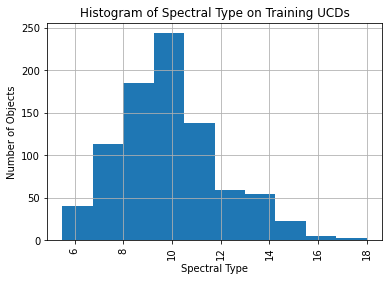

In [160]:

plt.hist(sample['sptnumabs_formula'])
plt.xticks(rotation=90)
plt.xlabel('Spectral Type')
plt.ylabel('Number of Objects')
plt.title('Histogram of Spectral Type on Training UCDs')
plt.grid()


In [161]:
# DES contaminant search

des_contam = pd.DataFrame()
no_of_matches = []
radius = 1

for i in range(len(ucs)):
    ra0 = ucs.iloc[i, 1] # in degrees, right ascension
    dec0 = ucs.iloc[i, 2] # in degrees, declinarion
    query = """
    SELECT ra, dec, wavg_mag_psf_r, wavg_mag_psf_i, wavg_mag_psf_z, wavg_mag_psf_y, wavg_magerr_psf_r, wavg_magerr_psf_i, wavg_magerr_psf_z, wavg_magerr_psf_y
    FROM des_dr2.main as dr2,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
      WHERE dr2.EXTENDED_CLASS_COADD <= 1
        AND dr2.IMAFLAGS_ISO_I = 0
        AND dr2.IMAFLAGS_ISO_Z = 0
        AND dr2.FLAGS_I < 4 
        AND dr2.FLAGS_Z < 4
        AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
        order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    closestmatch = sources.head(15)
    no_of_matches.append(len(sources))
    des_contam = pd.concat([des_contam, closestmatch], ignore_index = True)

des_contam

,ra,dec,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818
1,1.008178,-64.176481,23.735090,-99.000000,-99.000000,-99.000000,0.198386,-99.000000,-99.000000,-99.000000
2,1.019438,-64.175306,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
3,1.005584,-64.178665,-99.000000,-99.000000,22.780905,-99.000000,-99.000000,-99.000000,0.226963,-99.000000
4,1.010736,-64.180564,20.584959,20.012016,19.725468,19.662222,0.004596,0.004433,0.005408,0.019350
...,...,...,...,...,...,...,...,...,...,...
6490,359.870777,-1.866490,20.200306,20.030490,19.889366,19.966192,0.004684,0.004742,0.006814,0.033374
6491,359.885004,-1.880791,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
6492,359.880658,-1.879734,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
6493,359.872202,-1.872622,23.840876,-99.000000,-99.000000,-99.000000,0.193827,-99.000000,-99.000000,-99.000000


In [162]:
des_contam = des_contam[des_contam.wavg_mag_psf_z != -99]
des_contam = des_contam[des_contam.wavg_mag_psf_r != -99] 
des_contam = des_contam[des_contam.wavg_mag_psf_i != -99] 
des_contam = des_contam[des_contam.wavg_mag_psf_y != -99] 
des_contam = des_contam.reset_index(drop = True)
des_contam = des_contam.rename(columns = {'ra' : 'ra_des', 'dec' : 'dec_des'})

des_contam

,ra_des,dec_des,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818
1,1.010736,-64.180564,20.584959,20.012016,19.725468,19.662222,0.004596,0.004433,0.005408,0.019350
2,1.016998,-64.171474,18.311182,16.967161,16.397903,16.249100,0.001148,0.000610,0.000570,0.001511
3,1.026394,-64.176625,18.281527,17.676930,17.378325,17.301603,0.001237,0.001006,0.001072,0.003323
4,1.031448,-64.177201,20.858448,20.615341,20.527925,20.517233,0.006660,0.007961,0.011648,0.054442
...,...,...,...,...,...,...,...,...,...,...
1713,359.684735,-62.770052,22.304466,22.200693,22.088818,21.437908,0.015600,0.022347,0.045256,0.166014
1714,359.697529,-62.757900,22.950760,21.426086,20.791302,20.569508,0.030653,0.011474,0.013519,0.042305
1715,359.889933,-1.877276,20.417646,19.839062,19.557188,19.480694,0.004655,0.004041,0.005179,0.020512
1716,359.870777,-1.866490,20.200306,20.030490,19.889366,19.966192,0.004684,0.004742,0.006814,0.033374


In [163]:
# match contaminants to vista

vista_contam = pd.DataFrame()
no_of_matches = []
radius = 0.007

for i in range(len(des_contam)):
    ra0 = des_contam.iloc[i, 0] # in degrees, right ascension
    dec0 = des_contam.iloc[i, 1] # in degrees, declinarion
    query = """
    SELECT ra2000, dec2000, japermag3, hapermag3, ksapermag3, japermag3err, hapermag3err, ksapermag3err 
    FROM vhs_dr5.vhs_cat_v3,
    q3c_dist(ra2000, dec2000, {:f}, {:f}) as rdist
    WHERE q3c_radial_query(ra2000, dec2000, {:f}, {:f}, {:f}) 
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_des'] = ra0
    sources['dec_des'] = dec0
    sources['ra_comp'] = (sources['ra2000'] - ra0) * np.cos(dec0 * (np.pi/180))   # difference in right ascension  
    sources['dec_comp'] = sources['dec2000'] - dec0                               # difference in declination
    closestmatch = sources.head(1)
    no_of_matches.append(len(sources))
    vista_contam = pd.concat([vista_contam, closestmatch], ignore_index = True) 

vista_contam

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_des,dec_des,ra_comp,dec_comp
0,1.012655,-64.176830,15.672820,NaN,14.057813,0.005674,NaN,0.006040,1.012803,-64.176876,-0.000065,0.000046
1,1.010676,-64.180531,18.557287,NaN,17.806137,0.051041,NaN,0.164020,1.010736,-64.180564,-0.000026,0.000033
2,1.016936,-64.171432,14.998213,NaN,14.220320,0.003375,NaN,0.006733,1.016998,-64.171474,-0.000027,0.000042
3,1.026317,-64.176577,16.135199,NaN,15.403522,0.006939,NaN,0.016329,1.026394,-64.176625,-0.000034,0.000048
4,1.031405,-64.177191,19.721294,NaN,NaN,0.143560,NaN,NaN,1.031448,-64.177201,-0.000019,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...
1421,359.682771,-62.770005,18.958279,NaN,17.495218,0.052296,NaN,0.088010,359.684735,-62.770052,-0.000899,0.000047
1422,359.697407,-62.757859,19.302067,NaN,NaN,0.070567,NaN,NaN,359.697529,-62.757900,-0.000056,0.000041
1423,359.889891,-1.877253,18.325140,17.841940,17.654387,0.039041,0.052028,0.105309,359.889933,-1.877276,-0.000042,0.000023
1424,359.870744,-1.866465,19.118652,18.475100,17.590214,0.079111,0.092072,0.099336,359.870777,-1.866490,-0.000033,0.000025


In [164]:
# converting to arc seconds

vista_contam['dec_comp'] = vista_contam['dec_comp'].apply(lambda x: x*3600)
vista_contam['ra_comp'] = vista_contam['ra_comp'].apply(lambda x: x*3600)

In [165]:
# statistics

vra_comp_array = vista_contam['ra_comp'].to_numpy()
vdec_comp_array = vista_contam['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
vra_comp_array = [x for x in vra_comp_array if (x <= 12 and x >= -12)]
vra_comp_array = np.asarray(vra_comp_array)
vdec_comp_array = [x for x in vdec_comp_array  if (x <= 12 and x >= -12)]
vdec_comp_array = np.asarray(vdec_comp_array )

mu_rav = vra_comp_array.mean()
mu_decv = vdec_comp_array.mean()
sigma_rav = vra_comp_array.std()
sigma_decv = vdec_comp_array.std()
sigma_posv = np.sqrt(sigma_rav**2 + sigma_decv**2)

In [166]:
# flag 3 sigma outliers

upper_ra, lower_ra = mu_rav + 3*sigma_posv, mu_rav - 3*sigma_posv
upper_dec, lower_dec = mu_decv + 3*sigma_posv, mu_decv - 3*sigma_posv
sigma_flag = []

for i in range(len(vista_contam)):
    if vista_contam.iloc[i, 10] >= upper_ra:
        sigma_flag.append(True)
    elif vista_contam.iloc[i, 11] >= upper_dec:
        sigma_flag.append(True)
    elif vista_contam.iloc[i, 10] <= lower_ra:
        sigma_flag.append(True)
    elif vista_contam.iloc[i, 11] <= lower_dec:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
vista_contam['sigma_3'] = np.array(sigma_flag)
vista_contam_3sigma = vista_contam.loc[vista_contam['sigma_3']==True]
vista_contam

,ra2000,dec2000,japermag3,hapermag3,ksapermag3,japermag3err,hapermag3err,ksapermag3err,ra_des,dec_des,ra_comp,dec_comp,sigma_3
0,1.012655,-64.176830,15.672820,NaN,14.057813,0.005674,NaN,0.006040,1.012803,-64.176876,-0.232220,0.165964,False
1,1.010676,-64.180531,18.557287,NaN,17.806137,0.051041,NaN,0.164020,1.010736,-64.180564,-0.093909,0.118520,False
2,1.016936,-64.171432,14.998213,NaN,14.220320,0.003375,NaN,0.006733,1.016998,-64.171474,-0.098028,0.151307,False
3,1.026317,-64.176577,16.135199,NaN,15.403522,0.006939,NaN,0.016329,1.026394,-64.176625,-0.120763,0.173643,False
4,1.031405,-64.177191,19.721294,NaN,NaN,0.143560,NaN,NaN,1.031448,-64.177201,-0.066977,0.035497,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,359.682771,-62.770005,18.958279,NaN,17.495218,0.052296,NaN,0.088010,359.684735,-62.770052,-3.234840,0.169482,False
1422,359.697407,-62.757859,19.302067,NaN,NaN,0.070567,NaN,NaN,359.697529,-62.757900,-0.200443,0.146652,False
1423,359.889891,-1.877253,18.325140,17.841940,17.654387,0.039041,0.052028,0.105309,359.889933,-1.877276,-0.150146,0.082812,False
1424,359.870744,-1.866465,19.118652,18.475100,17.590214,0.079111,0.092072,0.099336,359.870777,-1.866490,-0.119866,0.089842,False


In [167]:
len(vista_contam_3sigma)

106

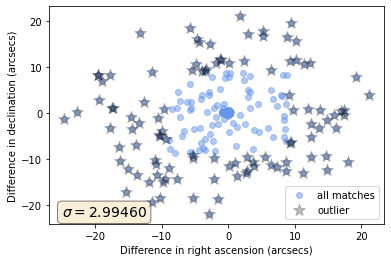

In [168]:
# difference between coordinates of vista and des for contaminants

textstr = ''r'$\sigma=%.5f$' % (sigma_posv, )

plt.scatter(vista_contam['ra_comp'], vista_contam['dec_comp'], alpha = 0.5, color = 'cornflowerblue', label = 'all matches')
plt.scatter(vista_contam_3sigma['ra_comp'], vista_contam_3sigma['dec_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
#plt.title('Accuracy according to Coordinates\n (VISTA-DES Contaminants)', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-25, -20, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('coordaccuracyvistades.png')

In [169]:
# match contaminants to catwise

cat_contam = pd.DataFrame()
no_of_matches = []
radius = 0.007

for i in range(len(des_contam)):
    ra0 = des_contam.iloc[i, 0] # in degrees, right ascension
    dec0 = des_contam.iloc[i, 1] # in degrees, declinarion
    query = """
    SELECT ra, dec, w1mpro, w2mpro, w1sigmpro, w2sigmpro, pmra, pmdec
    FROM catwise2020.main,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
    WHERE cc_flags = '0000'
    AND ab_flags = '00'
    AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_des'] = ra0
    sources['dec_des'] = dec0
    sources['ra_comp'] = (sources['ra'] - ra0) * np.cos(dec0 * (np.pi/180))   # difference in right ascension
    sources['dec_comp'] = sources['dec'] - dec0                               # difference in declination
    closestmatch = sources.head(1)
    no_of_matches.append(len(sources))
    cat_contam = pd.concat([cat_contam, closestmatch], ignore_index = True) 

cat_contam

,ra,dec,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,ra_des,dec_des,ra_comp,dec_comp
0,1.012763,-64.176842,13.405,12.974,0.014,0.010,0.10060,-0.06658,1.012803,-64.176876,-0.000017,0.000034
1,1.012763,-64.176842,13.405,12.974,0.014,0.010,0.10060,-0.06658,1.010736,-64.180564,0.000883,0.003722
2,1.017075,-64.171457,14.140,13.978,0.014,0.013,-0.00140,-0.02549,1.016998,-64.171474,0.000033,0.000017
3,1.026409,-64.176622,15.334,15.355,0.019,0.033,0.00641,-0.03581,1.026394,-64.176625,0.000007,0.000003
4,1.026409,-64.176622,15.334,15.355,0.019,0.033,0.00641,-0.03581,1.031448,-64.177201,-0.002195,0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,359.679230,0.116833,15.351,15.277,0.023,0.039,-0.00121,-0.05250,359.679222,0.116827,0.000008,0.000006
1549,359.696436,-62.773401,13.895,13.943,0.012,0.013,0.05218,-0.02121,359.684735,-62.770052,0.005354,-0.003349
1550,359.891982,-1.875714,15.654,15.721,0.022,0.053,-0.01075,0.00923,359.889933,-1.877276,0.002048,0.001562
1551,359.870779,-1.866543,16.830,15.669,0.051,0.053,0.04148,0.00204,359.870777,-1.866490,0.000002,-0.000053


In [170]:
# converting to arc seconds

cat_contam['dec_comp'] = cat_contam['dec_comp'].apply(lambda x: x*3600)
cat_contam['ra_comp'] = cat_contam['ra_comp'].apply(lambda x: x*3600)

In [171]:
# statistics

cra_comp_array = cat_contam['ra_comp'].to_numpy()
cdec_comp_array = cat_contam['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
cra_comp_array = [x for x in cra_comp_array if (x <= 12 and x >= -12)]
cra_comp_array = np.asarray(cra_comp_array)
cdec_comp_array = [x for x in cdec_comp_array  if (x <= 12 and x >= -12)]
cdec_comp_array = np.asarray(cdec_comp_array )

mu_rac = cra_comp_array.mean()
mu_decc = cdec_comp_array.mean()
sigma_rac = cra_comp_array.std()
sigma_decc = cdec_comp_array.std()
sigma_posc = np.sqrt(sigma_rac**2 + sigma_decc**2)

In [172]:
# flag 3 sigma outliers

upper_ra, lower_ra = mu_rac + 3*sigma_posc, mu_rac - 3*sigma_posc
upper_dec, lower_dec = mu_decc + 3*sigma_posc, mu_decc - 3*sigma_posc
sigma_flag = []

for i in range(len(cat_contam)):
    if cat_contam.iloc[i, 10] >= upper_ra:
        sigma_flag.append(True)
    elif cat_contam.iloc[i, 11] >= upper_dec:
        sigma_flag.append(True)
    elif cat_contam.iloc[i, 10] <= lower_ra:
        sigma_flag.append(True)
    elif cat_contam.iloc[i, 11] <= lower_dec:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
cat_contam['sigma_3'] = np.array(sigma_flag)
cat_contam_3sigma = cat_contam.loc[cat_contam['sigma_3']==True]
cat_contam

,ra,dec,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,ra_des,dec_des,ra_comp,dec_comp,sigma_3
0,1.012763,-64.176842,13.405,12.974,0.014,0.010,0.10060,-0.06658,1.012803,-64.176876,-0.062882,0.12348,False
1,1.012763,-64.176842,13.405,12.974,0.014,0.010,0.10060,-0.06658,1.010736,-64.180564,3.178040,13.40028,False
2,1.017075,-64.171457,14.140,13.978,0.014,0.013,-0.00140,-0.02549,1.016998,-64.171474,0.120143,0.06084,False
3,1.026409,-64.176622,15.334,15.355,0.019,0.033,0.00641,-0.03581,1.026394,-64.176625,0.023836,0.01044,False
4,1.026409,-64.176622,15.334,15.355,0.019,0.033,0.00641,-0.03581,1.031448,-64.177201,-7.901451,2.08404,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,359.679230,0.116833,15.351,15.277,0.023,0.039,-0.00121,-0.05250,359.679222,0.116827,0.030240,0.02052,False
1549,359.696436,-62.773401,13.895,13.943,0.012,0.013,0.05218,-0.02121,359.684735,-62.770052,19.274520,-12.05496,True
1550,359.891982,-1.875714,15.654,15.721,0.022,0.053,-0.01075,0.00923,359.889933,-1.877276,7.372081,5.62500,False
1551,359.870779,-1.866543,16.830,15.669,0.051,0.053,0.04148,0.00204,359.870777,-1.866490,0.007916,-0.19260,False


In [173]:
len(cat_contam_3sigma)

81

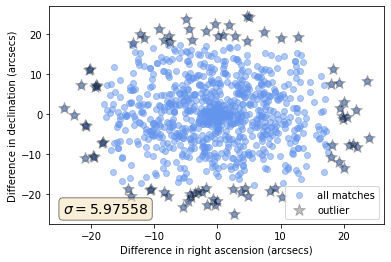

In [174]:
# difference between coordinates of vista and des for contaminants

textstr = ''r'$\sigma=%.5f$' % (sigma_posc, )

plt.scatter(cat_contam['ra_comp'], cat_contam['dec_comp'], alpha = 0.5, color = 'cornflowerblue', label = 'all matches')
plt.scatter(cat_contam_3sigma['ra_comp'], cat_contam_3sigma['dec_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
#plt.title('Accuracy according to Coordinates \n (CatWISE-DES Contaminants)', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-24.5, -22, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('coordaccuracycatdes.png')

In [175]:
contaminants = pd.merge(pd.merge(des_contam, vista_contam, on = 'ra_des'), cat_contam, on = 'ra_des')
contaminants

,ra_des,dec_des_x,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,dec_des,ra_comp_y,dec_comp_y,sigma_3_y
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,0.022949,0.005091,0.002203,0.005818,...,13.405,12.974,0.014,0.010,0.10060,-0.06658,-64.176876,-0.062882,0.12348,False
1,1.010736,-64.180564,20.584959,20.012016,19.725468,19.662222,0.004596,0.004433,0.005408,0.019350,...,13.405,12.974,0.014,0.010,0.10060,-0.06658,-64.180564,3.178040,13.40028,False
2,1.016998,-64.171474,18.311182,16.967161,16.397903,16.249100,0.001148,0.000610,0.000570,0.001511,...,14.140,13.978,0.014,0.013,-0.00140,-0.02549,-64.171474,0.120143,0.06084,False
3,1.026394,-64.176625,18.281527,17.676930,17.378325,17.301603,0.001237,0.001006,0.001072,0.003323,...,15.334,15.355,0.019,0.033,0.00641,-0.03581,-64.176625,0.023836,0.01044,False
4,1.031448,-64.177201,20.858448,20.615341,20.527925,20.517233,0.006660,0.007961,0.011648,0.054442,...,15.334,15.355,0.019,0.033,0.00641,-0.03581,-64.177201,-7.901451,2.08404,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,359.679222,0.116827,20.110435,18.499557,17.792152,17.609930,0.003271,0.001411,0.001410,0.004174,...,15.351,15.277,0.023,0.039,-0.00121,-0.05250,0.116827,0.030240,0.02052,False
1377,359.684735,-62.770052,22.304466,22.200693,22.088818,21.437908,0.015600,0.022347,0.045256,0.166014,...,13.895,13.943,0.012,0.013,0.05218,-0.02121,-62.770052,19.274520,-12.05496,True
1378,359.889933,-1.877276,20.417646,19.839062,19.557188,19.480694,0.004655,0.004041,0.005179,0.020512,...,15.654,15.721,0.022,0.053,-0.01075,0.00923,-1.877276,7.372081,5.62500,False
1379,359.870777,-1.866490,20.200306,20.030490,19.889366,19.966192,0.004684,0.004742,0.006814,0.033374,...,16.830,15.669,0.051,0.053,0.04148,0.00204,-1.866490,0.007916,-0.19260,False


In [176]:
contaminants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1380
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ra_des             1381 non-null   float64
 1   dec_des_x          1381 non-null   float64
 2   wavg_mag_psf_r     1381 non-null   float64
 3   wavg_mag_psf_i     1381 non-null   float64
 4   wavg_mag_psf_z     1381 non-null   float64
 5   wavg_mag_psf_y     1381 non-null   float64
 6   wavg_magerr_psf_r  1381 non-null   float64
 7   wavg_magerr_psf_i  1381 non-null   float64
 8   wavg_magerr_psf_z  1381 non-null   float64
 9   wavg_magerr_psf_y  1381 non-null   float64
 10  ra2000             1381 non-null   float64
 11  dec2000            1381 non-null   float64
 12  japermag3          1345 non-null   float64
 13  hapermag3          569 non-null    float64
 14  ksapermag3         1014 non-null   float64
 15  japermag3err       1345 non-null   float64
 16  hapermag3err       569 n

In [177]:
contaminants = contaminants.loc[contaminants['sigma_3_x']==False]
contaminants = contaminants.loc[contaminants['sigma_3_y']==False]
len(contaminants)

1229

In [178]:
vis_contaminants = contaminants[['ra_des', 'dec_des', 'wavg_mag_psf_r', 'wavg_mag_psf_i', 'wavg_mag_psf_z', 'wavg_mag_psf_y', 'japermag3', 'ksapermag3', \
                                 'w1mpro', 'w2mpro', 'pmra', 'pmdec']].copy()
vis_contaminants['z_J'] = vis_contaminants['wavg_mag_psf_z'] - vis_contaminants['japermag3']
vis_contaminants['J_W1'] = vis_contaminants['japermag3'] - vis_contaminants['w1mpro']
vis_contaminants = vis_contaminants.dropna()
vis_contaminants

,ra_des,dec_des,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro,pmra,pmdec,z_J,J_W1
0,1.012803,-64.176876,22.338305,20.059380,18.519573,17.932535,15.672820,14.057813,13.405,12.974,0.10060,-0.06658,2.846753,2.267820
1,1.010736,-64.180564,20.584959,20.012016,19.725468,19.662222,18.557287,17.806137,13.405,12.974,0.10060,-0.06658,1.168181,5.152287
2,1.016998,-64.171474,18.311182,16.967161,16.397903,16.249100,14.998213,14.220320,14.140,13.978,-0.00140,-0.02549,1.399690,0.858213
3,1.026394,-64.176625,18.281527,17.676930,17.378325,17.301603,16.135199,15.403522,15.334,15.355,0.00641,-0.03581,1.243126,0.801199
7,1.027341,-64.187166,23.434520,22.379990,21.935076,21.542292,19.511269,17.820452,16.549,16.567,0.04784,-0.10027,2.423807,2.962269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,359.666690,0.106340,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506,15.632,0.01258,-0.03610,0.963346,0.473781
1375,359.686079,0.104559,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944,17.236,0.33729,-0.03846,1.221675,1.620090
1376,359.679222,0.116827,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351,15.277,-0.00121,-0.05250,1.488470,0.952682
1378,359.889933,-1.877276,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654,15.721,-0.01075,0.00923,1.232048,2.671140


In [179]:
# statistics

array_zj = vis_contaminants['z_J'].to_numpy()
array_zdes = vis_contaminants['wavg_mag_psf_z'].to_numpy()

mu_zj = array_zj.mean()
mu_zdes = array_zdes.mean()
sigma_zj = array_zj.std()
sigma_zdes = array_zdes.std()
sigma_ctot = np.sqrt(sigma_zj**2 + sigma_zdes**2)

In [180]:
# flag 3 sigma outliers for j mags:

upper_z, lower_z = mu_zdes + 3*sigma_zdes, mu_zdes - 3*sigma_zdes
upper_zj, lower_zj = mu_zj + 3*sigma_zj, mu_zj - 3*sigma_zj

sigma_flag = []

for i in range(len(vis_contaminants)):
    if vis_contaminants.iloc[i, 4] >= upper_z:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 12] >= upper_zj:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 4] <= lower_z:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 12] <= lower_zj:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vis_contaminants['sigma_3zj'] = np.array(sigma_flag)
vis_contaminants_sigma_3zj = vis_contaminants.loc[vis_contaminants['sigma_3zj']==True]
len(vis_contaminants_sigma_3zj)

17

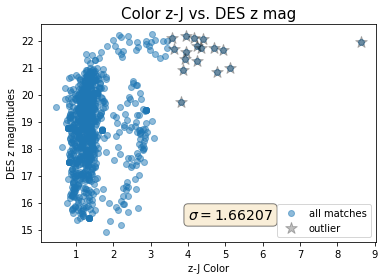

In [181]:
# color-mag plots

textstr = ''r'$\sigma=%.5f$' % (sigma_ctot, )

plt.scatter(vis_contaminants['z_J'], vis_contaminants['wavg_mag_psf_z'], alpha = 0.5, label = 'all matches')
plt.scatter(vis_contaminants_sigma_3zj['z_J'], vis_contaminants_sigma_3zj['wavg_mag_psf_z'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('DES z magnitudes')
plt.xlabel('z-J Color')
plt.title('Color z-J vs. DES z mag', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(4, 15.8, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [182]:
# statistics

array_jw1 = vis_contaminants['J_W1'].to_numpy()
array_jvis = vis_contaminants['japermag3'].to_numpy()

mu_jw1 = array_jw1.mean()
mu_jvis = array_jvis.mean()
sigma_jw1 = array_jw1.std()
sigma_jvis = array_jvis.std()
sigma_vtot = np.sqrt(sigma_jw1**2 + sigma_jvis**2)

In [183]:
vis_contaminants.columns.get_loc('J_W1')

13

In [184]:
# flag 3 sigma outliers for j mags:

upper_j, lower_j = mu_jvis + 3*sigma_jvis, mu_jvis - 3*sigma_jvis
upper_jw1, lower_jw1 = mu_jw1 + 3*sigma_jw1, mu_jw1 - 3*sigma_jw1

sigma_flag = []

for i in range(len(vis_contaminants)):
    if vis_contaminants.iloc[i, 6] >= upper_j:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 13] >= upper_jw1:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 6] <= lower_j:
        sigma_flag.append(True)
    elif vis_contaminants.iloc[i, 13] <= lower_jw1:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
        
vis_contaminants['sigma_3jw1'] = np.array(sigma_flag)
vis_contaminants_sigma_3jw1 = vis_contaminants.loc[vis_contaminants['sigma_3jw1']==True]
len(vis_contaminants_sigma_3jw1)

25

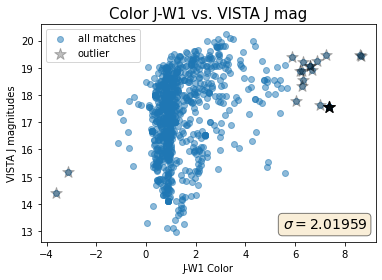

In [185]:
# color-mag plots

textstr = ''r'$\sigma=%.5f$' % (sigma_vtot, )

plt.scatter(vis_contaminants['J_W1'], vis_contaminants['japermag3'], alpha = 0.5, label = 'all matches')
plt.scatter(vis_contaminants_sigma_3jw1['J_W1'], vis_contaminants_sigma_3jw1['japermag3'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('VISTA J magnitudes')
plt.xlabel('J-W1 Color')
plt.title('Color J-W1 vs. VISTA J mag', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(5.5, 13.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

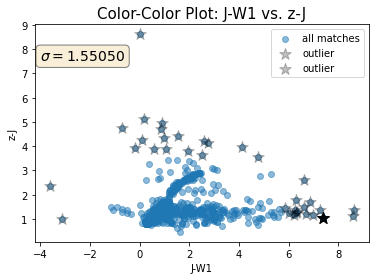

In [186]:
sigma_zjw1 = np.sqrt(sigma_zj**2 + sigma_jw1**2)

textstr = ''r'$\sigma=%.5f$' % (sigma_zjw1, )

plt.scatter(vis_contaminants['J_W1'], vis_contaminants['z_J'], alpha = 0.5, label = 'all matches')
plt.scatter(vis_contaminants_sigma_3jw1['J_W1'], vis_contaminants_sigma_3jw1['z_J'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.scatter(vis_contaminants_sigma_3zj['J_W1'], vis_contaminants_sigma_3zj['z_J'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.title('Color-Color Plot: J-W1 vs. z-J', fontsize = 15)
plt.xlabel('J-W1')
plt.ylabel('z-J')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-4, 8, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [187]:
contam_sample = vis_contaminants[['wavg_mag_psf_r', 'wavg_mag_psf_i', 'wavg_mag_psf_z', 'wavg_mag_psf_y', 'japermag3', 'ksapermag3', 'w1mpro', 'w2mpro', \
                                  'pmra', 'pmdec', 'sigma_3zj', 'sigma_3jw1']].copy()
contam_sample = contam_sample.loc[contam_sample['sigma_3zj']==False]
contam_sample = contam_sample.loc[contam_sample['sigma_3jw1']==False]
contam_sample = contam_sample.dropna()
contam_sample = contam_sample.reset_index(drop = True)
contam_sample

,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro,pmra,pmdec,sigma_3zj,sigma_3jw1
0,22.338305,20.059380,18.519573,17.932535,15.672820,14.057813,13.405,12.974,0.10060,-0.06658,False,False
1,20.584959,20.012016,19.725468,19.662222,18.557287,17.806137,13.405,12.974,0.10060,-0.06658,False,False
2,18.311182,16.967161,16.397903,16.249100,14.998213,14.220320,14.140,13.978,-0.00140,-0.02549,False,False
3,18.281527,17.676930,17.378325,17.301603,16.135199,15.403522,15.334,15.355,0.00641,-0.03581,False,False
4,23.434520,22.379990,21.935076,21.542292,19.511269,17.820452,16.549,16.567,0.04784,-0.10027,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506,15.632,0.01258,-0.03610,False,False
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944,17.236,0.33729,-0.03846,False,False
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351,15.277,-0.00121,-0.05250,False,False
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654,15.721,-0.01075,0.00923,False,False


In [188]:
contam_sample = contam_sample.drop(columns=['sigma_3zj', 'sigma_3jw1'])
contam_sample

,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro,pmra,pmdec
0,22.338305,20.059380,18.519573,17.932535,15.672820,14.057813,13.405,12.974,0.10060,-0.06658
1,20.584959,20.012016,19.725468,19.662222,18.557287,17.806137,13.405,12.974,0.10060,-0.06658
2,18.311182,16.967161,16.397903,16.249100,14.998213,14.220320,14.140,13.978,-0.00140,-0.02549
3,18.281527,17.676930,17.378325,17.301603,16.135199,15.403522,15.334,15.355,0.00641,-0.03581
4,23.434520,22.379990,21.935076,21.542292,19.511269,17.820452,16.549,16.567,0.04784,-0.10027
...,...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506,15.632,0.01258,-0.03610
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944,17.236,0.33729,-0.03846
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351,15.277,-0.00121,-0.05250
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654,15.721,-0.01075,0.00923


In [189]:
training1 = sample[['DES_r', 'DES_i', 'DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2', 'pmra', 'pmdec']].copy()
training1

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,286.70,-145.43
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,758.23,85.20
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,710.80,-124.81
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,-33.00,10.40
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,-61.00,-321.35
...,...,...,...,...,...,...,...,...,...,...
2917,18.729468,16.105663,14.631025,14.147254,12.378064,11.311010,10.959220,10.726544,372.10,197.70
2919,18.642824,16.123727,14.816750,14.418452,12.747321,11.779918,11.471128,11.181632,111.00,-114.70
2921,19.172018,16.575303,15.101741,14.628654,12.940314,11.970036,11.623195,11.374844,-50.20,-383.19
2928,20.617988,18.099402,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257,-181.50,-51.90


In [190]:
# adjusting the training data to match the contaminant data labels and units

training1['pmra'] = training1['pmra'].apply(lambda x: x*0.001)
training1['pmdec'] = training1['pmdec'].apply(lambda x: x*0.001)
training1['label'] = 1
training1

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec,label
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,0.28670,-0.14543,1
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,0.75823,0.08520,1
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,0.71080,-0.12481,1
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,-0.03300,0.01040,1
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,-0.06100,-0.32135,1
...,...,...,...,...,...,...,...,...,...,...,...
2917,18.729468,16.105663,14.631025,14.147254,12.378064,11.311010,10.959220,10.726544,0.37210,0.19770,1
2919,18.642824,16.123727,14.816750,14.418452,12.747321,11.779918,11.471128,11.181632,0.11100,-0.11470,1
2921,19.172018,16.575303,15.101741,14.628654,12.940314,11.970036,11.623195,11.374844,-0.05020,-0.38319,1
2928,20.617988,18.099402,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257,-0.18150,-0.05190,1


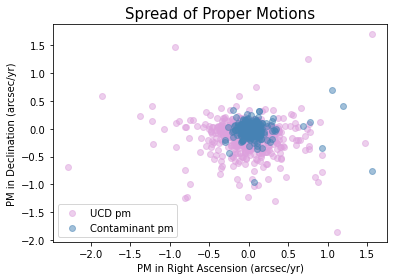

In [191]:
# spread of pmra and pmdec

plt.scatter(training1['pmra'], training1['pmdec'], alpha = 0.5, color = 'plum', label = 'UCD pm')
plt.scatter(contam_sample['pmra'], contam_sample['pmdec'], alpha = 0.5, color = 'steelblue', label = 'Contaminant pm')
plt.legend()
plt.title('Spread of Proper Motions', fontsize = 15)
plt.xlabel('PM in Right Ascension (arcsec/yr)')
plt.ylabel('PM in Declination (arcsec/yr)')
plt.savefig('pmspread.png')

In [192]:
training_vis = training1.copy()
training_vis['z_J'] = training_vis['DES_z'] - training_vis['VISTA_J']
training_vis['J_W1'] = training_vis['VISTA_J'] - training_vis['CAT_W1']
training_vis

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec,label,z_J,J_W1
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,0.28670,-0.14543,1,2.030708,1.261997
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,0.75823,0.08520,1,2.140197,1.247415
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,0.71080,-0.12481,1,2.036431,1.282184
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,-0.03300,0.01040,1,2.693423,2.087792
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,-0.06100,-0.32135,1,1.723680,0.982600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,18.729468,16.105663,14.631025,14.147254,12.378064,11.311010,10.959220,10.726544,0.37210,0.19770,1,2.252961,1.418844
2919,18.642824,16.123727,14.816750,14.418452,12.747321,11.779918,11.471128,11.181632,0.11100,-0.11470,1,2.069429,1.276194
2921,19.172018,16.575303,15.101741,14.628654,12.940314,11.970036,11.623195,11.374844,-0.05020,-0.38319,1,2.161427,1.317119
2928,20.617988,18.099402,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257,-0.18150,-0.05190,1,2.452227,1.504060


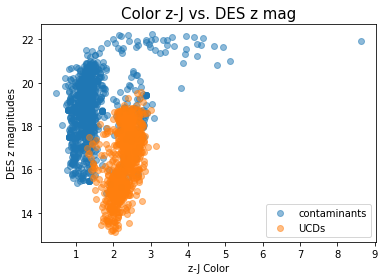

In [193]:
# color-mag plots

#textstr = ''r'$\sigma=%.5f$' % (sigma_ctot, )

plt.scatter(vis_contaminants['z_J'], vis_contaminants['wavg_mag_psf_z'], alpha = 0.5, label = 'contaminants')
plt.scatter(training_vis['z_J'], training_vis['DES_z'], alpha = 0.5, label = 'UCDs')

plt.ylabel('DES z magnitudes')
plt.xlabel('z-J Color')
plt.title('Color z-J vs. DES z mag', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#plt.text(4.85, 16.7, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

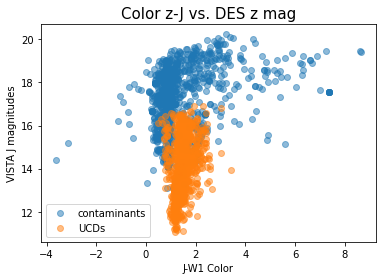

In [194]:
# color-mag plots

#textstr = ''r'$\sigma=%.5f$' % (sigma_ctot, )

plt.scatter(vis_contaminants['J_W1'], vis_contaminants['japermag3'], alpha = 0.5, label = 'contaminants')
plt.scatter(training_vis['J_W1'], training_vis['VISTA_J'], alpha = 0.5, label = 'UCDs')

plt.ylabel('VISTA J magnitudes')
plt.xlabel('J-W1 Color')
plt.title('Color z-J vs. DES z mag', fontsize = 15)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#plt.text(4.85, 16.7, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

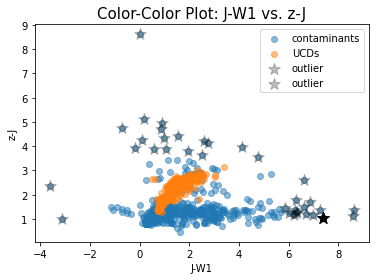

In [195]:
# color-mag plots

#textstr = ''r'$\sigma=%.5f$' % (sigma_ctot, )

plt.scatter(vis_contaminants['J_W1'], vis_contaminants['z_J'], alpha = 0.5, label = 'contaminants')
plt.scatter(training_vis['J_W1'], training_vis['z_J'], alpha = 0.5, label = 'UCDs')
plt.scatter(vis_contaminants_sigma_3jw1['J_W1'], vis_contaminants_sigma_3jw1['z_J'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.scatter(vis_contaminants_sigma_3zj['J_W1'], vis_contaminants_sigma_3zj['z_J'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.title('Color-Color Plot: J-W1 vs. z-J', fontsize = 15)
plt.xlabel('J-W1')
plt.ylabel('z-J')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#plt.text(4.85, 16.7, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()

In [196]:
# adjustments to labels for contaminant sample

contam_sample['label'] = 0
contam_sample = contam_sample.rename(columns = {'wavg_mag_psf_r' : 'DES_r', 'wavg_mag_psf_i' : 'DES_i', 'wavg_mag_psf_z' : 'DES_z', \
                                                'wavg_mag_psf_y' : 'DES_y', 'japermag3' : 'VISTA_J', 'ksapermag3' : 'VISTA_Ks', \
                                                'w1mpro' : 'CAT_W1', 'w2mpro' : 'CAT_W2'})
contam_sample

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec,label
0,22.338305,20.059380,18.519573,17.932535,15.672820,14.057813,13.405,12.974,0.10060,-0.06658,0
1,20.584959,20.012016,19.725468,19.662222,18.557287,17.806137,13.405,12.974,0.10060,-0.06658,0
2,18.311182,16.967161,16.397903,16.249100,14.998213,14.220320,14.140,13.978,-0.00140,-0.02549,0
3,18.281527,17.676930,17.378325,17.301603,16.135199,15.403522,15.334,15.355,0.00641,-0.03581,0
4,23.434520,22.379990,21.935076,21.542292,19.511269,17.820452,16.549,16.567,0.04784,-0.10027,0
...,...,...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506,15.632,0.01258,-0.03610,0
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944,17.236,0.33729,-0.03846,0
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351,15.277,-0.00121,-0.05250,0
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654,15.721,-0.01075,0.00923,0


In [197]:
# combine into a full contaminant/training sample

full_sample = pd.concat([training1, contam_sample], axis = 0)
full_sample

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec,label
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,0.28670,-0.14543,1
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,0.75823,0.08520,1
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,0.71080,-0.12481,1
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,-0.03300,0.01040,1
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,-0.06100,-0.32135,1
...,...,...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506000,15.632000,0.01258,-0.03610,0
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944000,17.236000,0.33729,-0.03846,0
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351000,15.277000,-0.00121,-0.05250,0
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654000,15.721000,-0.01075,0.00923,0


In [493]:
def plot_normalized_confusion_matrix(
    y_true: Iterable[int],
    y_pred: np.ndarray,
    classes: List = ["Contaminant", "UCD"],
    cmap: str = "Blues",
    normalize: Optional[str] = "true",
    file_name: Optional[str] = None,
    title: Optional[str] = None,
) -> None:
    """Plot a confusion matrix from binary arrays y_true and y_pred.
    Parameters
    ----------
    y_true : Union[pd.Series, np.ndarray]
        Ground truth labels.
    y_pred : np.ndarray
        Predicted labels.
    classes : List
        Class names for tick labels, default ["Single", "Binary"].
    cmap : str
        Color map name, default "Blues".
    normalize : str, optional
        Normalization method, default "true".
    file_name : str, optional
        If specified, save as file with name, default not specified.
    title : str, optional
        If specified, set figure title.
    Examples
    --------
    >>> _y_true = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])
    >>> _y_pred = np.array()[1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
    >>> plot_confusion_matrix(_y_true, _y_pred, file_name="test.pdf")
    Returns
    -------
    None
    """
    if not title:
        if normalize:
            title = "Normalized Confusion Matrix"
        else:
            title = "Confusion Matrix"

    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(
        cm,
        annot=True,
        ax=ax,
        cmap=cmap,
        fmt=".2%",
        xticklabels=classes,
        yticklabels=classes,
        linewidths=0.6,
        linecolor="black",
        clip_on=False,
        cbar=False,
    )
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel("True", fontsize=20)
    ax.set_xlabel("Predicted", fontsize=20)
    fig.tight_layout()

    if file_name:
        warn_pdf(file_name)
        fig.savefig(PLOTS_DIR / file_name, dpi=300, bbox_inches="tight")

    plt.show()
    
def plot_feature_importance(
    model: RandomForestClassifier,
    feature_names: Iterable[str],
    n: int = 10,
    file_name: Optional[str] = None,
    error_bars: bool = False,
) -> pd.DataFrame:
    """Plot the feature importance of a fit RF model.
    Parameters
    ----------
    model : RandomForestClassifier
        Model trained on templates.
    feature_names : Iterable[str]
        Names of the features for the plot.
    n : int
        Top n most important features to plot.
    file_name : str, optional
        File name for saving the feature importance plot.
    error_bars : bool
        Whether to plot error bars in the feature importance plot.
    Returns
    -------
    pd.DataFrame
        Feature importance DataFrame.
    """
    feature_importance = model.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in model.estimators_], axis=0
    )

    data = {
        "feature_names": feature_names,
        "feature_importance": feature_importance,
        "std": std,
    }
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=["feature_importance"], ascending=False, inplace=True)
    fi_df = fi_df.iloc[:n]

    plt.figure(figsize=(8, 6))

    if error_bars:
        plt.barh(range(len(fi_df))[::-1], fi_df["feature_importance"], color = 'lightsteelblue', xerr=fi_df["std"],
            edgecolor="black",
        )
    else:
        plt.barh(
            range(len(fi_df))[::-1],
            fi_df["feature_importance"],
            color= 'lightsteelblue',
            edgecolor="black",
        )

    plt.yticks(ticks=range(len(fi_df)), labels=fi_df["feature_names"][::-1])
    # plt.title(f"{model.__class__.__name__} Feature Importance")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")

    if file_name:
        plt.savefig(file_name)

    plt.show()
    return fi_df


In [503]:
sns.set(font_scale=1)

In [200]:
# checking for duplicate rows

duplicate = full_sample[full_sample.duplicated()]
len(duplicate)

49

In [201]:
full_sample = full_sample.drop_duplicates()
len(full_sample)

1660

In [491]:
# creating the random forest model

RSEED = 42  

X, y = full_sample.drop(columns='label'), full_sample['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=RSEED, shuffle=True)

RF_model = RandomForestClassifier(n_estimators = 50, class_weight = None)
RF_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

The raw features produce a model with precision ~0.9509 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       644

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       196
           1       0.95      0.97      0.96       219

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415

[[185  11]
 [  6 213]]


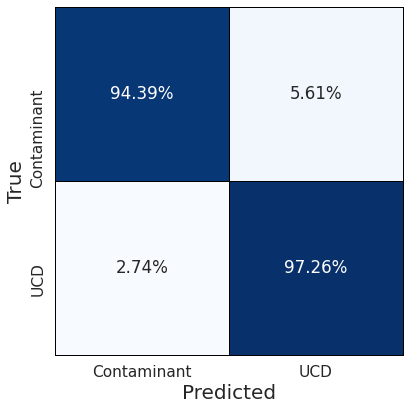

In [494]:
# finding the precision
train_preds = RF_model.predict(x_train)
test_preds = RF_model.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

# classification report
print(classification_report(y_train, train_preds) + "\n")
print(classification_report(y_test, test_preds))

# confusion matrix
print(confusion_matrix(y_test, test_preds))
plot_normalized_confusion_matrix(y_test, test_preds)

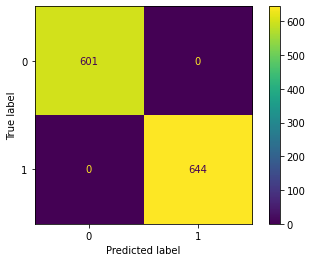

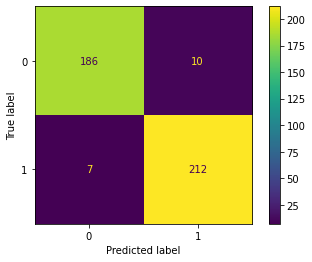

In [306]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF_model, x_train, y_train)
plot_confusion_matrix(RF_model, x_test, y_test)

In [307]:
model1precision = precision_score(y_test, test_preds)
model1f1 = f1_score(y_test, test_preds)

print(model1precision, model1f1)

0.954954954954955 0.9614512471655329


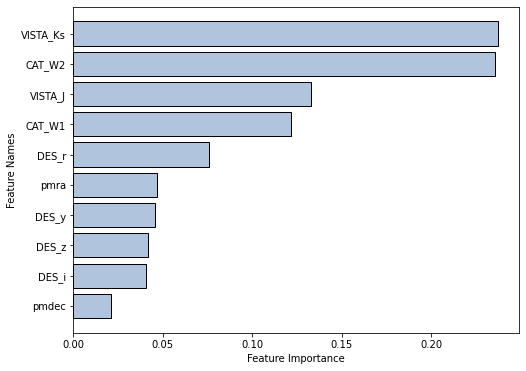

,feature_names,feature_importance,std
5,VISTA_Ks,0.237345,0.272930
7,CAT_W2,0.235625,0.273034
4,VISTA_J,0.132718,0.212063
6,CAT_W1,0.121906,0.214983
0,DES_r,0.076095,0.044893
8,pmra,0.046861,0.019097
3,DES_y,0.045845,0.074849
2,DES_z,0.041932,0.058833
1,DES_i,0.040741,0.034136
9,pmdec,0.020932,0.013634


In [308]:
feature_list = full_sample.drop(columns='label').columns

plot_feature_importance(RF_model, feature_list, 10, 'model1features')

In [309]:
sample_nopm = full_sample.drop(columns = ['pmra', 'pmdec'])
sample_nopm

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,1
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,1
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,1
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,1
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,1
...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506000,15.632000,0
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944000,17.236000,0
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351000,15.277000,0
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654000,15.721000,0


In [ ]:
# creating the random forest model

RSEED = 42  

X, y = sample_nopm.drop(columns='label'), sample_nopm['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=RSEED, shuffle=True)

RF_model2 = RandomForestClassifier(n_estimators = 50, class_weight = None)
RF_model2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

The raw features produce a model with precision ~0.9459 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       644

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       196
           1       0.95      0.96      0.95       219

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415



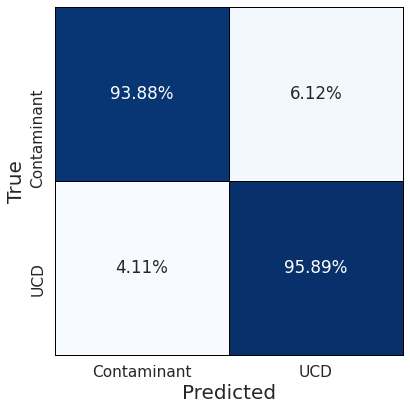

In [ ]:
# finding the precision
train_preds = RF_model2.predict(x_train)
test_preds = RF_model2.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

# classification report
print(classification_report(y_train, train_preds) + "\n")
print(classification_report(y_test, test_preds))

# confusion matrix
confusion_matrix(y_test, test_preds)
plot_normalized_confusion_matrix(y_test, test_preds)

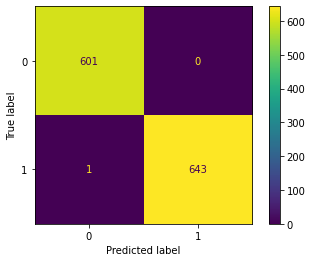

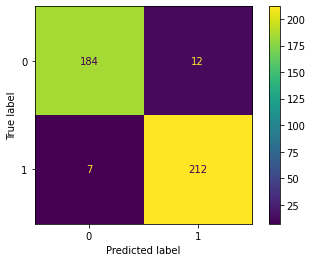

In [314]:
plot_confusion_matrix(RF_model2, x_train, y_train)
plot_confusion_matrix(RF_model2, x_test, y_test)

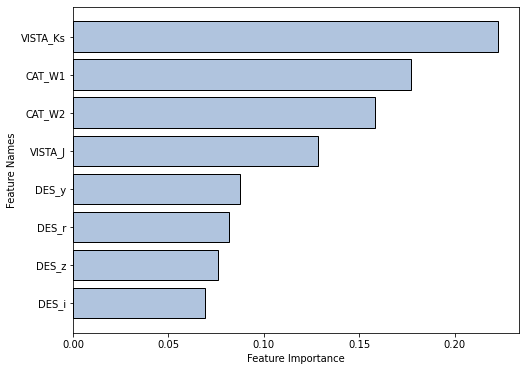

,feature_names,feature_importance,std
5,VISTA_Ks,0.222815,0.254051
6,CAT_W1,0.176952,0.249269
7,CAT_W2,0.158208,0.226515
4,VISTA_J,0.128272,0.200812
3,DES_y,0.087272,0.137885
0,DES_r,0.081592,0.041355
2,DES_z,0.075881,0.097827
1,DES_i,0.069009,0.056893


In [315]:
feature_list2 = sample_nopm.drop(columns='label').columns

plot_feature_importance(RF_model2, feature_list2, 10, 'model2features')

In [316]:
model2precision = precision_score(y_test, test_preds) 
model2f1 = f1_score(y_test, test_preds)

print(model2precision, model2f1)

0.9464285714285714 0.9571106094808125


In [239]:
# create dataframe with all of the color combinations:

color_sample = full_sample.copy()

for i in range(len(full_sample.columns) - 4):
    for j in range(0, 8): 
        if i != j and i < j:
            color_sample[color_sample.columns[i] + '_' + color_sample.columns[j]] = color_sample.iloc[:, i] - color_sample.iloc[:, j]
#             plt.figure()
#             plt.scatter(color_sample.loc[color_sample['label'] == 1].iloc[:,i], color_sample.loc[color_sample['label'] == 1].iloc[:,j], \
#                         label = 'UCDs',  color = 'mediumseagreen')
#             plt.scatter(color_sample.loc[color_sample['label'] == 0].iloc[:,i], color_sample.loc[color_sample['label'] == 0].iloc[:,j], \
#                         label = 'Contaminants', color = 'plum', marker = '*')
#             plt.title(color_sample.columns[i] + '-' + color_sample.columns[j] + ' Color Plot')
#             plt.xlabel(color_sample.columns[i])
#             plt.ylabel(color_sample.columns[j])
#             plt.legend()
#             plt.show()

color_sample

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,pmra,pmdec,...,DES_y_VISTA_J,DES_y_VISTA_Ks,DES_y_CAT_W1,DES_y_CAT_W2,VISTA_J_VISTA_Ks,VISTA_J_CAT_W1,VISTA_J_CAT_W2,VISTA_Ks_CAT_W1,VISTA_Ks_CAT_W2,CAT_W1_CAT_W2
5,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,0.28670,-0.14543,...,1.621726,2.587213,2.883724,3.049785,0.965487,1.261997,1.428059,0.296511,0.462572,0.166061
9,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,0.75823,0.08520,...,1.667110,2.548277,2.914525,3.203040,0.881167,1.247415,1.535930,0.366248,0.654763,0.288515
12,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788,0.71080,-0.12481,...,1.579371,2.522819,2.861554,3.106966,0.943449,1.282184,1.527595,0.338735,0.584147,0.245412
15,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276,-0.03300,0.01040,...,2.140206,3.638439,4.227998,4.498880,1.498233,2.087792,2.358674,0.589559,0.860441,0.270882
20,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981,-0.06100,-0.32135,...,1.426882,2.182528,2.409482,2.612769,0.755646,0.982600,1.185888,0.226954,0.430241,0.203287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506000,15.632000,0.01258,-0.03610,...,0.969039,1.392094,1.442820,1.316820,0.423055,0.473781,0.347781,0.050726,-0.075274,-0.126000
842,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944000,17.236000,0.33729,-0.03846,...,1.229176,2.229088,2.849266,3.557266,0.999912,1.620090,2.328090,0.620178,1.328178,0.708000
843,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351000,15.277000,-0.00121,-0.05250,...,1.306248,2.082223,2.258930,2.332930,0.775975,0.952682,1.026682,0.176707,0.250707,0.074000
844,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654000,15.721000,-0.01075,0.00923,...,1.155554,1.826307,3.826694,3.759694,0.670753,2.671140,2.604140,2.000387,1.933387,-0.067000


In [240]:
# creating a dataframe with colors as the only feature, retaining the labels

color_sample_rf = color_sample.iloc[:, -29:]
color_sample_rf

,label,DES_r_DES_i,DES_r_DES_z,DES_r_DES_y,DES_r_VISTA_J,DES_r_VISTA_Ks,DES_r_CAT_W1,DES_r_CAT_W2,DES_i_DES_z,DES_i_DES_y,...,DES_y_VISTA_J,DES_y_VISTA_Ks,DES_y_CAT_W1,DES_y_CAT_W2,VISTA_J_VISTA_Ks,VISTA_J_CAT_W1,VISTA_J_CAT_W2,VISTA_Ks_CAT_W1,VISTA_Ks_CAT_W2,CAT_W1_CAT_W2
5,1,2.539733,3.895983,4.304965,5.926692,6.892178,7.188689,7.354750,1.356251,1.765233,...,1.621726,2.587213,2.883724,3.049785,0.965487,1.261997,1.428059,0.296511,0.462572,0.166061
9,1,2.648687,4.131889,4.604975,6.272086,7.153253,7.519500,7.808016,1.483202,1.956288,...,1.667110,2.548277,2.914525,3.203040,0.881167,1.247415,1.535930,0.366248,0.654763,0.288515
12,1,2.664398,4.107427,4.564488,6.143858,7.087307,7.426042,7.671454,1.443029,1.900090,...,1.579371,2.522819,2.861554,3.106966,0.943449,1.282184,1.527595,0.338735,0.584147,0.245412
15,1,2.415746,3.960036,4.513253,6.653459,8.151692,8.741251,9.012133,1.544290,2.097507,...,2.140206,3.638439,4.227998,4.498880,1.498233,2.087792,2.358674,0.589559,0.860441,0.270882
20,1,2.259490,3.358633,3.655432,5.082314,5.837960,6.064914,6.268202,1.099143,1.395942,...,1.426882,2.182528,2.409482,2.612769,0.755646,0.982600,1.185888,0.226954,0.430241,0.203287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0.156084,0.230331,0.224638,1.193677,1.616732,1.667458,1.541458,0.074247,0.068554,...,0.969039,1.392094,1.442820,1.316820,0.423055,0.473781,0.347781,0.050726,-0.075274,-0.126000
842,0,0.540911,0.856373,0.848872,2.078048,3.077960,3.698138,4.406138,0.315462,0.307961,...,1.229176,2.229088,2.849266,3.557266,0.999912,1.620090,2.328090,0.620178,1.328178,0.708000
843,0,1.610878,2.318283,2.500505,3.806753,4.582728,4.759435,4.833435,0.707405,0.889627,...,1.306248,2.082223,2.258930,2.332930,0.775975,0.952682,1.026682,0.176707,0.250707,0.074000
844,0,0.578584,0.860458,0.936952,2.092506,2.763259,4.763646,4.696646,0.281874,0.358368,...,1.155554,1.826307,3.826694,3.759694,0.670753,2.671140,2.604140,2.000387,1.933387,-0.067000


In [ ]:
# random forest with only colors

RSEED = 42  

X, y = color_sample_rf.drop(columns='label'), color_sample_rf['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=RSEED, shuffle=True)

RF_model3 = RandomForestClassifier(n_estimators = 50, class_weight = None)
RF_model3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

The raw features produce a model with precision ~0.9295 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       644

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       196
           1       0.93      0.96      0.95       219

    accuracy                           0.94       415
   macro avg       0.94      0.94      0.94       415
weighted avg       0.94      0.94      0.94       415



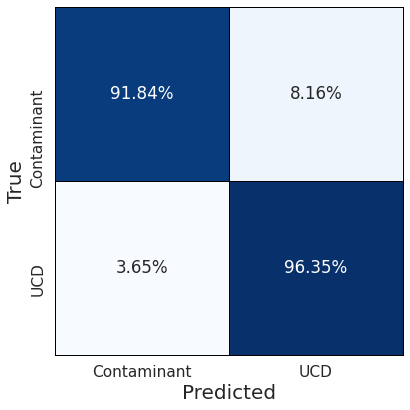

In [ ]:
# finding the precision
train_preds = RF_model3.predict(x_train)
test_preds = RF_model3.predict(x_test)
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

# classification report
print(classification_report(y_train, train_preds) + "\n")
print(classification_report(y_test, test_preds))

# confusion matrix
confusion_matrix(y_test, test_preds)
plot_normalized_confusion_matrix(y_test, test_preds)

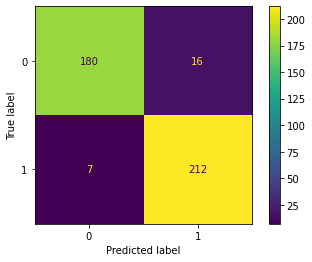

In [323]:
plot_confusion_matrix(RF_model3, x_test, y_test)

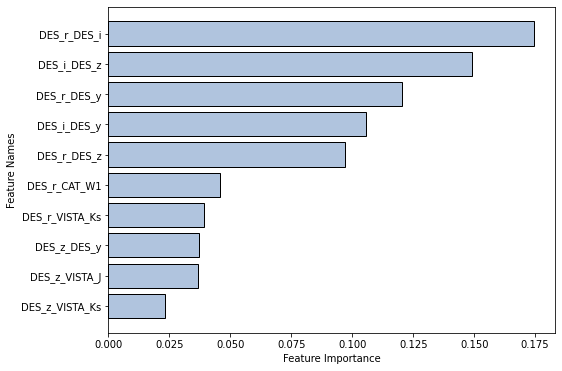

,feature_names,feature_importance,std
0,DES_r_DES_i,0.174362,0.299748
7,DES_i_DES_z,0.149167,0.289195
2,DES_r_DES_y,0.120467,0.259683
8,DES_i_DES_y,0.105779,0.247786
1,DES_r_DES_z,0.096869,0.232882
5,DES_r_CAT_W1,0.045789,0.156141
4,DES_r_VISTA_Ks,0.039029,0.144853
13,DES_z_DES_y,0.037002,0.100540
14,DES_z_VISTA_J,0.036864,0.135354
15,DES_z_VISTA_Ks,0.023331,0.089627


In [324]:
feature_list3 = color_sample_rf.drop(columns='label').columns

plot_feature_importance(RF_model3, feature_list3, 10, 'model3features')

In [325]:
model3precision = precision_score(y_test, test_preds)
model3f1 = f1_score(y_test, test_preds)

print(model3precision, model3f1)

0.9298245614035088 0.9485458612975392


In [543]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

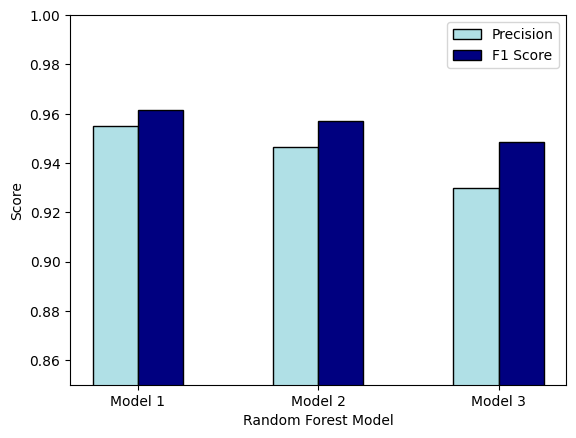

In [546]:
# plotting the accuracy and f1 score of each model

models = ('Model 1', 'Model 2', 'Model 3')
accuracies = [model1precision, model2precision, model3precision]
f1s = [model1f1, model2f1, model3f1]
  
n = 3
r = np.arange(n)
width = 0.25
    
plt.bar(r, accuracies, color = 'powderblue',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width, f1s, color = 'navy',
        width = width, edgecolor = 'black',
        label= 'F1 Score')
  
plt.xlabel("Random Forest Model")
plt.ylabel("Score")

plt.xticks(r + width/2,['Model 1','Model 2','Model 3'])
plt.ylim(0.85, 1)
plt.legend()

plt.savefig('accuracycomp')
plt.show()

In [645]:
color_sample_rf.columns.get_loc('DES_z_DES_y')

14

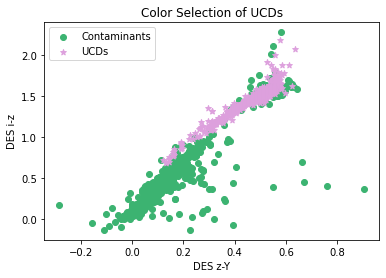

In [648]:
# color-color plot

plt.scatter(color_sample_rf.loc[color_sample_rf['label'] == 0].iloc[:,14], color_sample_rf.loc[color_sample_rf['label'] == 0].iloc[:,8], \
                        label = 'Contaminants',  color = 'mediumseagreen')
plt.scatter(color_sample_rf.loc[color_sample_rf['label'] == 1].iloc[:,14], color_sample_rf.loc[color_sample_rf['label'] == 1].iloc[:,8], \
                        label = 'UCDs', color = 'plum', marker = '*')
plt.title('Color Selection of UCDs')
plt.xlabel('DES z-Y')
plt.ylabel('DES i-z')
# plt.title(color_sample_rf.columns[14] + '-' + color_sample_rf.columns[8] + ' Color Plot')
# plt.xlabel(color_sample_rf.columns[14])
# plt.ylabel(color_sample_rf.columns[8])
plt.legend()
plt.savefig('colorcolorplot')
plt.show()

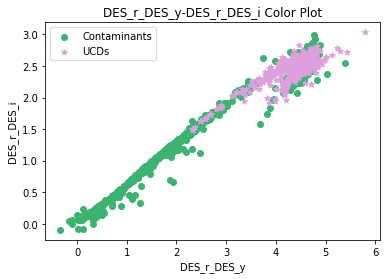

In [268]:
plt.scatter(color_sample_rf.loc[color_sample_rf['label'] == 0].iloc[:,3], color_sample_rf.loc[color_sample_rf['label'] == 0].iloc[:,1], \
                        label = 'Contaminants',  color = 'mediumseagreen')
plt.scatter(color_sample_rf.loc[color_sample_rf['label'] == 1].iloc[:,3], color_sample_rf.loc[color_sample_rf['label'] == 1].iloc[:,1], \
                        label = 'UCDs', color = 'plum', marker = '*')
plt.title(color_sample_rf.columns[3] + '-' + color_sample_rf.columns[1] + ' Color Plot')
plt.xlabel(color_sample_rf.columns[3])
plt.ylabel(color_sample_rf.columns[1])
plt.legend()
plt.show()

Text(0, 0.5, 'Counts')

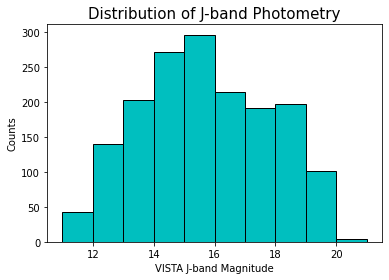

In [269]:
# variation in J-band photometry

bins = np.arange(11, 22, 1)
plt.hist(full_sample['VISTA_J'], bins = bins, color='c', edgecolor='k')
plt.title('Distribution of J-band Photometry', fontsize = 15)
plt.xlabel('VISTA J-band Magnitude')
plt.ylabel('Counts')

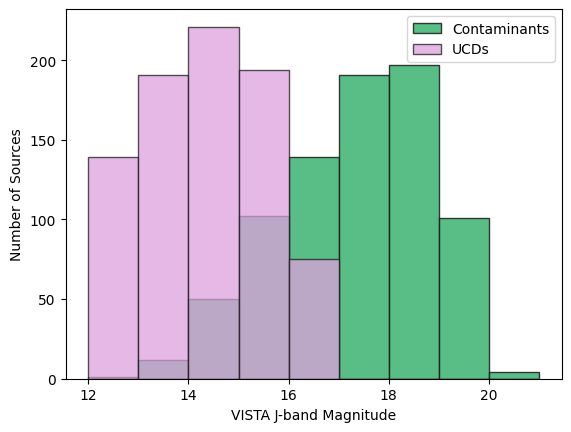

In [547]:
# highlighting UCDs in J-band photometry histogram

plt.hist(full_sample.loc[full_sample['label'] == 0]['VISTA_J'], bins = bins, color='mediumseagreen', \
         edgecolor='k', alpha = 0.85)
plt.hist(full_sample.loc[full_sample['label'] == 1]['VISTA_J'], bins= bins, color = 'plum', \
         edgecolor = 'k', alpha = 0.75)
#plt.title('Distribution of J-band Photometry', fontsize = 15)
plt.xlabel('VISTA J-band Magnitude')
plt.ylabel('Number of Sources')
plt.legend(('Contaminants', 'UCDs'))
plt.savefig('jbandhist.png')

In [271]:
mc_sample = ultracoolsheet[['r_P1', 'i_P1', 'z_P1', 'y_P1', 'J_2MASS', 'Ks_2MASS', 'W1', 'W2', 'rerr_P1', 'ierr_P1', 'zerr_P1', 'yerr_P1', \
                            'Jerr_2MASS', 'Kserr_2MASS', 'W1err', 'W2err']].copy()
mc_sample = mc_sample.dropna()
mc_sample

,r_P1,i_P1,z_P1,y_P1,J_2MASS,Ks_2MASS,W1,W2,rerr_P1,ierr_P1,zerr_P1,yerr_P1,Jerr_2MASS,Kserr_2MASS,W1err,W2err
5,19.41,16.77,15.43,14.67,13.068,11.972,11.705,11.519,0.01,0.00,0.00,0.00,0.024,0.025,0.024,0.023
9,19.15,16.41,14.94,14.06,12.404,11.396,11.056,10.745,0.01,0.00,0.00,0.01,0.022,0.023,0.023,0.020
12,19.95,17.11,15.69,14.84,13.274,12.201,11.891,11.624,0.01,0.00,0.00,0.01,0.025,0.030,0.023,0.022
15,22.49,20.26,18.83,17.80,15.662,14.010,13.472,13.179,0.10,0.01,0.01,0.01,0.065,0.052,0.026,0.028
20,17.29,14.95,13.91,13.36,11.967,11.090,10.884,10.660,0.01,0.01,0.00,0.00,0.023,0.023,0.022,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,19.29,16.56,15.13,14.23,12.471,11.269,10.951,10.697,0.00,0.00,0.00,0.00,0.026,0.026,0.023,0.021
2919,19.18,16.49,15.23,14.49,12.840,11.742,11.463,11.151,0.01,0.00,0.00,0.00,0.022,0.020,0.023,0.021
2921,19.68,17.04,15.59,14.71,13.033,11.932,11.615,11.345,0.02,0.00,0.00,0.00,0.026,0.027,0.022,0.021
2928,20.98,18.59,17.09,16.09,14.178,13.039,12.573,12.281,0.03,0.01,0.01,0.01,0.029,0.030,0.023,0.023


In [272]:
# add 0.01 noise to values that are 0: 

for i in range(8, 12):
    for j in range(len(mc_sample)):
        if mc_sample.iloc[j, i] < 0.01:
            mc_sample.iloc[j, i] = mc_sample.iloc[j, i] + 0.01

mc_sample

,r_P1,i_P1,z_P1,y_P1,J_2MASS,Ks_2MASS,W1,W2,rerr_P1,ierr_P1,zerr_P1,yerr_P1,Jerr_2MASS,Kserr_2MASS,W1err,W2err
5,19.41,16.77,15.43,14.67,13.068,11.972,11.705,11.519,0.01,0.01,0.01,0.01,0.024,0.025,0.024,0.023
9,19.15,16.41,14.94,14.06,12.404,11.396,11.056,10.745,0.01,0.01,0.01,0.01,0.022,0.023,0.023,0.020
12,19.95,17.11,15.69,14.84,13.274,12.201,11.891,11.624,0.01,0.01,0.01,0.01,0.025,0.030,0.023,0.022
15,22.49,20.26,18.83,17.80,15.662,14.010,13.472,13.179,0.10,0.01,0.01,0.01,0.065,0.052,0.026,0.028
20,17.29,14.95,13.91,13.36,11.967,11.090,10.884,10.660,0.01,0.01,0.01,0.01,0.023,0.023,0.022,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,19.29,16.56,15.13,14.23,12.471,11.269,10.951,10.697,0.01,0.01,0.01,0.01,0.026,0.026,0.023,0.021
2919,19.18,16.49,15.23,14.49,12.840,11.742,11.463,11.151,0.01,0.01,0.01,0.01,0.022,0.020,0.023,0.021
2921,19.68,17.04,15.59,14.71,13.033,11.932,11.615,11.345,0.02,0.01,0.01,0.01,0.026,0.027,0.022,0.021
2928,20.98,18.59,17.09,16.09,14.178,13.039,12.573,12.281,0.03,0.01,0.01,0.01,0.029,0.030,0.023,0.023


In [273]:
# add colors so that the correction can be made

mc_sample['r_i'] = mc_sample['r_P1'] - mc_sample['i_P1']
mc_sample['i_z'] = mc_sample['i_P1'] - mc_sample['z_P1']
mc_sample['z_y'] = mc_sample['z_P1'] - mc_sample['y_P1']
mc_sample['J_K'] = mc_sample['J_2MASS'] - mc_sample['Ks_2MASS']
mc_sample['w1_w2'] = mc_sample['W1'] - mc_sample['W2']

In [274]:
# do the photometric correction

mc_sample['DES_r'] = mc_sample['r_P1'] - (ar_final * mc_sample['r_i']) - br_final
mc_sample['DES_i'] = mc_sample['i_P1'] - (ai_final * mc_sample['i_z']) - bi_final
mc_sample['DES_z'] = mc_sample['z_P1'] - (az_final * mc_sample['z_y']) - bz_final
mc_sample['DES_y'] = mc_sample['y_P1'] - (ay_final * mc_sample['z_y']) - by_final
mc_sample['VISTA_J'] = mc_sample['J_2MASS'] - (aj_final * mc_sample['J_K']) - bj_final
mc_sample['VISTA_Ks'] = mc_sample['Ks_2MASS'] - (ak_final * mc_sample['J_K']) - bk_final
mc_sample['CAT_W1'] = mc_sample['W1'] - (aw1_final * mc_sample['w1_w2']) - bw1_final
mc_sample['CAT_W2'] = mc_sample['W2'] - (aw2_final * mc_sample['w1_w2']) - bw2_final
mc_sample

,r_P1,i_P1,z_P1,y_P1,J_2MASS,Ks_2MASS,W1,W2,rerr_P1,ierr_P1,...,J_K,w1_w2,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2
5,19.41,16.77,15.43,14.67,13.068,11.972,11.705,11.519,0.01,0.01,...,1.096,0.186,18.902018,16.362285,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267
9,19.15,16.41,14.94,14.06,12.404,11.396,11.056,10.745,0.01,0.01,...,1.008,0.311,18.583630,15.934942,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614
12,19.95,17.11,15.69,14.84,13.274,12.201,11.891,11.624,0.01,0.01,...,1.073,0.267,19.325241,16.660843,15.217814,14.760754,13.181383,12.237934,11.899199,11.653788
15,22.49,20.26,18.83,17.80,15.662,14.010,13.472,13.179,0.10,0.01,...,1.652,0.293,22.221409,19.805663,18.261373,17.708156,15.567950,14.069717,13.480158,13.209276
20,17.29,14.95,13.91,13.36,11.967,11.090,10.884,10.660,0.01,0.01,...,0.877,0.224,16.957182,14.697692,13.598549,13.301750,11.874868,11.119222,10.892268,10.688981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,19.29,16.56,15.13,14.23,12.471,11.269,10.951,10.697,0.01,0.01,...,1.202,0.254,18.729468,16.105663,14.631025,14.147254,12.378064,11.311010,10.959220,10.726544
2919,19.18,16.49,15.23,14.49,12.840,11.742,11.463,11.151,0.01,0.01,...,1.098,0.312,18.642824,16.123727,14.816750,14.418452,12.747321,11.779918,11.471128,11.181632
2921,19.68,17.04,15.59,14.71,13.033,11.932,11.615,11.345,0.02,0.01,...,1.101,0.270,19.172018,16.575303,15.101741,14.628654,12.940314,11.970036,11.623195,11.374844
2928,20.98,18.59,17.09,16.09,14.178,13.039,12.573,12.281,0.03,0.01,...,1.139,0.292,20.617988,18.099402,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257


In [275]:
# take only relevant columns

mc_sample_corr = mc_sample[['DES_r', 'DES_i', 'DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2', 'rerr_P1', 'ierr_P1', 'zerr_P1', 'yerr_P1', \
                            'Jerr_2MASS', 'Kserr_2MASS', 'W1err', 'W2err']].copy()

In [276]:
# adding noise function

def addNoise(photometry, unc, scale=1.0):
    """
    Resamples data to add noise, scaled according to input scale factor (scale > 1 => increased noise)
    Parameters
    ----------
    photometry : list or numpy array of floats
                    An array specifying flux density in f_lambda units
    unc : list or numpy array of floats
                    An array specifying uncertainty in the same units as flux
    scale : float, default = 1.
                    Scale factor to scale uncertainty array; scale > 1 reduces signal-to-noise
    Returns
    -------
    list or numpy array of floats
            flux with noise added
    list or numpy array of floats
            scaled uncertainty
    Examples
    --------
    >>> flux = np.random.normal(5, 0.2, 100)
    >>> unc = flux * 0.01
    >>> nflux, nunc = addNoise(flux, unc, scale=5.)
    """
    sunc = unc * scale
    if scale > 1.0:
        nunc = sunc
    else:
        nunc = unc
    nphot = np.random.normal(photometry, sunc)  # random number
    return nphot, nunc


In [277]:
mc_contams = contaminants.copy()
mc_contams = mc_contams.drop(columns = ['ra_des', 'dec_des_x', 'ra2000', 'dec2000', 'hapermag3', 'hapermag3err', 'dec_des_y', 'ra_comp_x', 'dec_comp_x', \
                                        'sigma_3_x', 'ra', 'dec', 'pmra', 'pmdec', 'dec_des', 'ra_comp_y', 'dec_comp_y', 'sigma_3_y'])
mc_contams = mc_contams.rename(columns = {'wavg_mag_psf_r' : 'DES_r', 'wavg_mag_psf_i' : 'DES_i', 'wavg_mag_psf_z' : 'DES_z', \
                                                'wavg_mag_psf_y' : 'DES_y', 'japermag3' : 'VISTA_J', 'ksapermag3' : 'VISTA_Ks', \
                                                'w1mpro' : 'CAT_W1', 'w2mpro' : 'CAT_W2'})

mc_contams = mc_contams.iloc[:, [0, 1, 2, 3, 8, 9, 12, 13, 4, 5, 6, 7, 10, 11, 14, 15]]
mc_contams = mc_contams.dropna()
mc_contams

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,japermag3err,ksapermag3err,w1sigmpro,w2sigmpro
0,22.338305,20.059380,18.519573,17.932535,15.672820,14.057813,13.405,12.974,0.022949,0.005091,0.002203,0.005818,0.005674,0.006040,0.014,0.010
1,20.584959,20.012016,19.725468,19.662222,18.557287,17.806137,13.405,12.974,0.004596,0.004433,0.005408,0.019350,0.051041,0.164020,0.014,0.010
2,18.311182,16.967161,16.397903,16.249100,14.998213,14.220320,14.140,13.978,0.001148,0.000610,0.000570,0.001511,0.003375,0.006733,0.014,0.013
3,18.281527,17.676930,17.378325,17.301603,16.135199,15.403522,15.334,15.355,0.001237,0.001006,0.001072,0.003323,0.006939,0.016329,0.019,0.033
7,23.434520,22.379990,21.935076,21.542292,19.511269,17.820452,16.549,16.567,0.052290,0.031971,0.040658,0.190078,0.122821,0.154177,0.032,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,17.173458,17.017374,16.943127,16.948820,15.979781,15.556726,15.506,15.632,0.000530,0.000559,0.000752,0.002899,0.006291,0.014593,0.021,0.049
1375,21.642138,21.101227,20.785765,20.793266,19.564090,18.564178,17.944,17.236,0.010568,0.011120,0.013962,0.086689,0.128832,0.211513,0.124,0.208
1376,20.110435,18.499557,17.792152,17.609930,16.303682,15.527707,15.351,15.277,0.003271,0.001411,0.001410,0.004174,0.007978,0.014243,0.023,0.039
1378,20.417646,19.839062,19.557188,19.480694,18.325140,17.654387,15.654,15.721,0.004655,0.004041,0.005179,0.020512,0.039041,0.105309,0.022,0.053


In [278]:
# split the contaminants and ucds into their bins

ucd_j1 = mc_sample_corr.loc[mc_sample_corr['VISTA_J'] <= 12]
ucd_j2 = mc_sample_corr.loc[(mc_sample_corr['VISTA_J'] > 12) & (mc_sample_corr['VISTA_J'] <= 13)]
ucd_j3 = mc_sample_corr.loc[(mc_sample_corr['VISTA_J'] > 13) & (mc_sample_corr['VISTA_J'] <= 14)]
ucd_j4 = mc_sample_corr.loc[(mc_sample_corr['VISTA_J'] > 14) & (mc_sample_corr['VISTA_J'] <= 15)]
ucd_j5 = mc_sample_corr.loc[(mc_sample_corr['VISTA_J'] > 15) & (mc_sample_corr['VISTA_J'] <= 16)]
ucd_j6 = mc_sample_corr.loc[(mc_sample_corr['VISTA_J'] > 16) & (mc_sample_corr['VISTA_J'] <= 17)]

ucd_binsizes = np.array([len(ucd_j1), len(ucd_j2), len(ucd_j3), len(ucd_j4), len(ucd_j5), len(ucd_j6)])

contam_j2 = mc_contams.loc[mc_contams['VISTA_J'] <= 13]
contam_j3 = mc_contams.loc[(mc_contams['VISTA_J'] > 13) & (mc_contams['VISTA_J'] <= 14)]
contam_j4 = mc_contams.loc[(mc_contams['VISTA_J'] > 14) & (mc_contams['VISTA_J'] <= 15)]
contam_j5 = mc_contams.loc[(mc_contams['VISTA_J'] > 15) & (mc_contams['VISTA_J'] <= 16)]
contam_j6 = mc_contams.loc[(mc_contams['VISTA_J'] > 16) & (mc_contams['VISTA_J'] <= 17)]
contam_j7 = mc_contams.loc[(mc_contams['VISTA_J'] > 17) & (mc_contams['VISTA_J'] <= 18)]
contam_j8 = mc_contams.loc[(mc_contams['VISTA_J'] > 18) & (mc_contams['VISTA_J'] <= 19)]
contam_j9 = mc_contams.loc[(mc_contams['VISTA_J'] > 19)]

contam_binsizes = np.array([len(contam_j2), len(contam_j3), len(contam_j4), len(contam_j5), len(contam_j6), len(contam_j7), len(contam_j8), len(contam_j9)])

print(ucd_binsizes, contam_binsizes)


[ 43 139 192 219 191  70] [  1  13  58 105 155 222 202 106]


In [279]:
# select a UCD and generate 1000 using noise for bin 1

photometry_list = []
noise_list = []

for i in range(len(ucd_j1)):
    UCD_phot = ucd_j1.iloc[i,:8]
    UCD_unc = ucd_j1.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j1_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j1_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2
0,16.949000,14.698014,13.589943,13.298789,11.868916,11.123044,10.885951,10.710538
1,16.954074,14.700411,13.602159,13.302379,11.865582,11.116198,10.900914,10.688647
2,16.960648,14.706934,13.592684,13.300212,11.879860,11.089400,10.891599,10.710846
3,16.959873,14.691483,13.596240,13.296626,11.874660,11.134437,10.890897,10.693577
4,16.958611,14.704572,13.599612,13.309883,11.893792,11.123810,10.908839,10.671879
...,...,...,...,...,...,...,...,...
42995,17.577231,14.934425,13.565074,13.142547,11.548982,10.714600,10.412570,10.212472
42996,17.581127,14.926194,13.564615,13.142836,11.552699,10.670128,10.383746,10.211284
42997,17.581380,14.931733,13.564178,13.143485,11.543056,10.688559,10.414396,10.202935
42998,17.583095,14.934320,13.579593,13.144703,11.556547,10.692802,10.412295,10.194618


In [280]:
ucd_j1_oversamp['label'] = 1

In [281]:
ucd_j1_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,16.949000,14.698014,13.589943,13.298789,11.868916,11.123044,10.885951,10.710538,1
1,16.954074,14.700411,13.602159,13.302379,11.865582,11.116198,10.900914,10.688647,1
2,16.960648,14.706934,13.592684,13.300212,11.879860,11.089400,10.891599,10.710846,1
3,16.959873,14.691483,13.596240,13.296626,11.874660,11.134437,10.890897,10.693577,1
4,16.958611,14.704572,13.599612,13.309883,11.893792,11.123810,10.908839,10.671879,1
...,...,...,...,...,...,...,...,...,...
42995,17.577231,14.934425,13.565074,13.142547,11.548982,10.714600,10.412570,10.212472,1
42996,17.581127,14.926194,13.564615,13.142836,11.552699,10.670128,10.383746,10.211284,1
42997,17.581380,14.931733,13.564178,13.143485,11.543056,10.688559,10.414396,10.202935,1
42998,17.583095,14.934320,13.579593,13.144703,11.556547,10.692802,10.412295,10.194618,1


The raw features produce a model with precision ~0.9464 !
The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.9997 !
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.95      0.97      0.96       219

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     43000

    accuracy                           1.00     43000
   macro avg       1.00      1.00      1.00     43000
weighted avg       1.00      1.00      1.00     43000

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       1.00      1.00      1.00     43219

    accuracy                           1.00     43415
   macro

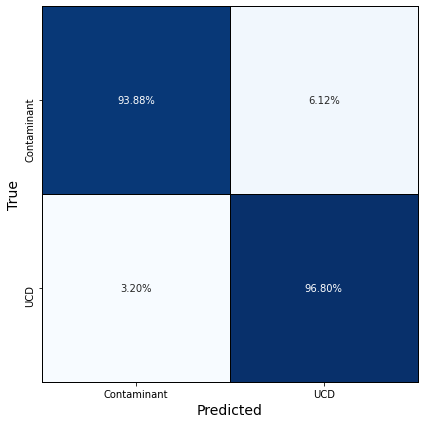

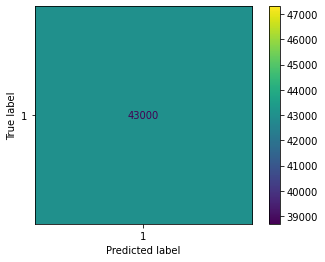

In [332]:
# testing RF on first UCD + one contaminant

X_mc = ucd_j1_oversamp.drop(columns='label')
y_mc = ucd_j1_oversamp['label']

X = sample_nopm.drop(columns='label')
y = sample_nopm['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=RSEED, shuffle=True)

allX = pd.concat([X_mc, x_test], axis = 0)
ally = pd.concat([y_mc, y_test], axis = 0)

# finding the precision
y_pred = RF_model2.predict(x_test)
y_pred_mc = RF_model2.predict(X_mc)
y_pred_all = RF_model2.predict(allX)

#print(f1_score(y_mc, y_pred_mc, average='weighted', labels=np.unique(y_pred_mc)))

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, y_pred)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc, y_pred_mc)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(ally, y_pred_all)))


# classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_mc, y_pred_mc))
print(classification_report(ally, y_pred_all))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_mc, y_pred_mc))
print(confusion_matrix(ally, y_pred_all))

plot_normalized_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RF_model2, X_mc, y_mc)

In [333]:
j1score = precision_score(y_mc, y_pred_mc)
j1f1 = f1_score(y_mc, y_pred_mc)

print(j1score, j1f1)

1.0 1.0


In [284]:
# select a UCD and generate 1000 using noise for bin 2

photometry_list = []
noise_list = []

for i in range(len(ucd_j2)):
    UCD_phot = ucd_j2.iloc[i,:8]
    UCD_unc = ucd_j2.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j2_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j2_oversamp['label'] = 1
ucd_j2_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.901083,16.359384,15.001773,14.590733,12.978892,11.981709,11.709529,11.537386,1
1,18.894509,16.369689,15.007587,14.596635,12.982109,11.999109,11.709958,11.554794,1
2,18.906461,16.355743,14.999878,14.593507,12.979254,12.003684,11.709775,11.537179,1
3,18.911001,16.369100,15.008462,14.588350,12.972787,11.992310,11.708967,11.554275,1
4,18.900515,16.361998,15.002404,14.591755,12.956181,12.005683,11.726502,11.557636,1
...,...,...,...,...,...,...,...,...,...
138995,19.172734,16.583065,15.100738,14.636735,12.983105,11.970201,11.632613,11.384428,1
138996,19.170725,16.576834,15.099630,14.626818,12.950946,11.966523,11.621297,11.367551,1
138997,19.187337,16.573222,15.101403,14.629389,12.940482,11.981531,11.615560,11.374267,1
138998,19.187919,16.575817,15.093507,14.619117,12.941061,11.951621,11.641242,11.370042,1


In [285]:
photometry_list = []
noise_list = []

for i in range(len(contam_j2)):
    contam_phot = contam_j2.iloc[i,:8]
    contam_unc = contam_j2.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j2_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j2_oversamp['label'] = 0
contam_j2_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,19.468465,16.632409,15.171028,14.702939,12.971658,12.087258,11.745604,11.472431,0
1,19.470760,16.632166,15.171113,14.702565,12.974914,12.087341,11.764897,11.473592,0
2,19.471593,16.632663,15.171625,14.703255,12.974349,12.088815,11.755197,11.478948,0
3,19.468805,16.632168,15.171500,14.702604,12.972840,12.086192,11.760720,11.474583,0
4,19.469154,16.631919,15.171701,14.703002,12.974328,12.088417,11.757631,11.489354,0
...,...,...,...,...,...,...,...,...,...
995,19.470472,16.632017,15.171253,14.702643,12.974129,12.087591,11.769685,11.482803,0
996,19.471502,16.632641,15.171333,14.703234,12.974185,12.085927,11.755462,11.472124,0
997,19.470822,16.632380,15.171212,14.702978,12.974508,12.086531,11.757159,11.476566,0
998,19.470160,16.632627,15.170894,14.702828,12.973039,12.085938,11.759556,11.470573,0


In [286]:
j2_oversamp_all = pd.concat([ucd_j2_oversamp, contam_j2_oversamp], axis = 0)
j2_oversamp_all

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.901083,16.359384,15.001773,14.590733,12.978892,11.981709,11.709529,11.537386,1
1,18.894509,16.369689,15.007587,14.596635,12.982109,11.999109,11.709958,11.554794,1
2,18.906461,16.355743,14.999878,14.593507,12.979254,12.003684,11.709775,11.537179,1
3,18.911001,16.369100,15.008462,14.588350,12.972787,11.992310,11.708967,11.554275,1
4,18.900515,16.361998,15.002404,14.591755,12.956181,12.005683,11.726502,11.557636,1
...,...,...,...,...,...,...,...,...,...
995,19.470472,16.632017,15.171253,14.702643,12.974129,12.087591,11.769685,11.482803,0
996,19.471502,16.632641,15.171333,14.703234,12.974185,12.085927,11.755462,11.472124,0
997,19.470822,16.632380,15.171212,14.702978,12.974508,12.086531,11.757159,11.476566,0
998,19.470160,16.632627,15.170894,14.702828,12.973039,12.085938,11.759556,11.470573,0


The raw features produce a model with precision ~0.9464 !
The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9955 !
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.95      0.97      0.96       219

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    139000

    accuracy                           1.00    139000
   macro avg       1.00      1.00      1.00    139000
weighted avg       1.00      1.00      1.00    139000

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      1000
           1       0.00      0.00      0.00         0

    

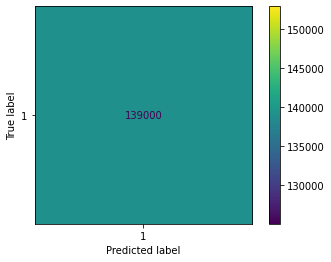

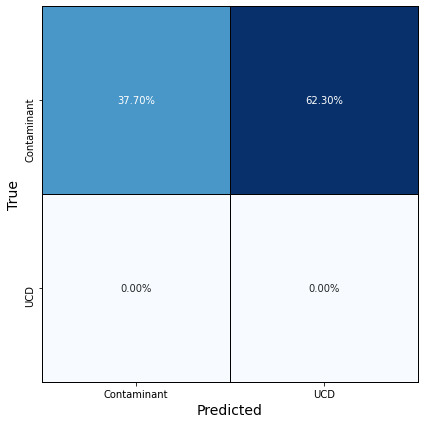

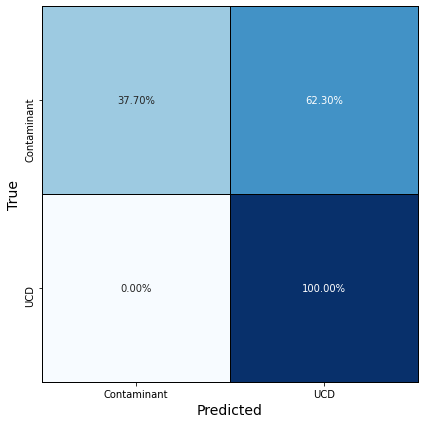

In [334]:
# test model with bin 2

X_mc2 = ucd_j2_oversamp.drop(columns='label')
y_mc2 = ucd_j2_oversamp['label']

X_contam_mc2 = contam_j2_oversamp.drop(columns='label')
y_contam_mc2 = contam_j2_oversamp['label']

X_mc2_all = j2_oversamp_all.drop(columns='label')
y_mc2_all = j2_oversamp_all['label']

# finding the precision
y_pred = RF_model2.predict(x_test)
y_pred_mc2 = RF_model2.predict(X_mc2)
y_pred_contam_mc2 = RF_model2.predict(X_contam_mc2)
y_pred_mc2_all = RF_model2.predict(X_mc2_all)

#print(f1_score(y_mc, y_pred_mc, average='weighted', labels=np.unique(y_pred_mc)))

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, y_pred)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc2, y_pred_mc2)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc2, y_pred_contam_mc2, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc2_all, y_pred_mc2_all)))


# classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_mc2, y_pred_mc2))
print(classification_report(y_contam_mc2, y_pred_contam_mc2, zero_division=0))
print(classification_report(y_mc2_all, y_pred_mc2_all))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_mc2, y_pred_mc2))
print(confusion_matrix(y_contam_mc2, y_pred_contam_mc2))
print(confusion_matrix(y_mc2_all, y_pred_mc2_all))

plot_confusion_matrix(RF_model2, X_mc2, y_mc2)
plot_normalized_confusion_matrix(y_contam_mc2, y_pred_contam_mc2)
plot_normalized_confusion_matrix(y_mc2_all, y_pred_mc2_all)

In [337]:
j2score = precision_score(y_mc2_all, y_pred_mc2_all)
j2f1 = f1_score(y_mc2_all, y_pred_mc2_all)

print(j2score, j2f1)

0.9955379844294995 0.9977640036895734


In [339]:
# select a UCD and generate 1000 using noise for bin 3

photometry_list = []
noise_list = []

for i in range(len(ucd_j3)):
    UCD_phot = ucd_j3.iloc[i,:8]
    UCD_unc = ucd_j3.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j3_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j3_oversamp['label'] = 1
ucd_j3_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,19.319674,16.660160,15.230252,14.760964,13.179302,12.236739,11.888751,11.660565,1
1,19.325468,16.660529,15.214931,14.764084,13.190824,12.244127,11.900160,11.659186,1
2,19.322386,16.660252,15.212802,14.760114,13.147260,12.212192,11.897959,11.650640,1
3,19.328498,16.663633,15.215305,14.766344,13.171931,12.238991,11.900491,11.676214,1
4,19.314085,16.656534,15.216279,14.764426,13.173388,12.237272,11.891249,11.647948,1
...,...,...,...,...,...,...,...,...,...
191995,19.521893,16.947511,15.432177,14.913068,13.093597,12.020292,11.643059,11.398417,1
191996,19.359735,16.948087,15.439826,14.907755,13.126139,12.031558,11.635108,11.418659,1
191997,19.459488,16.950113,15.425614,14.912390,13.075420,12.029528,11.628163,11.424549,1
191998,19.414150,16.948804,15.430636,14.908816,13.115447,12.019862,11.617478,11.394159,1


In [340]:
# same for contaminants in bin 3

photometry_list = []
noise_list = []

for i in range(len(contam_j3)):
    contam_phot = contam_j3.iloc[i,:8]
    contam_unc = contam_j3.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j3_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j3_oversamp['label'] = 0
contam_j3_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,19.944047,17.265040,15.660108,15.112168,13.275284,12.163330,11.756187,11.429797,0
1,19.941338,17.264702,15.659801,15.112481,13.276178,12.164147,11.751749,11.435565,0
2,19.942004,17.264850,15.660111,15.111508,13.275847,12.163778,11.745471,11.440034,0
3,19.941940,17.264464,15.659810,15.111242,13.275892,12.163654,11.763656,11.431860,0
4,19.942962,17.264007,15.659772,15.111377,13.275506,12.163800,11.742563,11.427966,0
...,...,...,...,...,...,...,...,...,...
12995,20.289198,17.525792,15.948657,15.440318,13.705724,12.602297,12.227547,11.903111,0
12996,20.289237,17.525896,15.948549,15.440227,13.706282,12.601613,12.232198,11.896690,0
12997,20.287463,17.526161,15.948414,15.440139,13.706408,12.603967,12.232728,11.901490,0
12998,20.288177,17.526567,15.948449,15.440510,13.704836,12.602210,12.231800,11.899770,0


In [341]:
# combine bin 3

j3_oversamp_all = pd.concat([ucd_j3_oversamp, contam_j3_oversamp], axis = 0)
j3_oversamp_all

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,19.319674,16.660160,15.230252,14.760964,13.179302,12.236739,11.888751,11.660565,1
1,19.325468,16.660529,15.214931,14.764084,13.190824,12.244127,11.900160,11.659186,1
2,19.322386,16.660252,15.212802,14.760114,13.147260,12.212192,11.897959,11.650640,1
3,19.328498,16.663633,15.215305,14.766344,13.171931,12.238991,11.900491,11.676214,1
4,19.314085,16.656534,15.216279,14.764426,13.173388,12.237272,11.891249,11.647948,1
...,...,...,...,...,...,...,...,...,...
12995,20.289198,17.525792,15.948657,15.440318,13.705724,12.602297,12.227547,11.903111,0
12996,20.289237,17.525896,15.948549,15.440227,13.706282,12.601613,12.232198,11.896690,0
12997,20.287463,17.526161,15.948414,15.440139,13.706408,12.603967,12.232728,11.901490,0
12998,20.288177,17.526567,15.948449,15.440510,13.704836,12.602210,12.231800,11.899770,0


The raw features produce a model with precision ~0.9464 !
The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9889 !
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       196
           1       0.95      0.97      0.96       219

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    192000

    accuracy                           1.00    192000
   macro avg       1.00      1.00      1.00    192000
weighted avg       1.00      1.00      1.00    192000

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     13000
           1       0.00      0.00      0.00         0

    

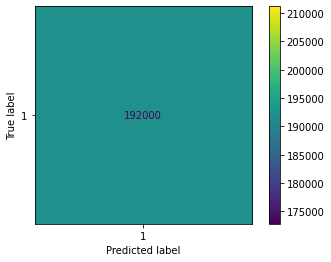

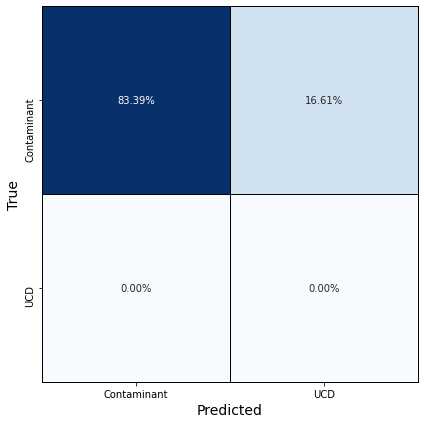

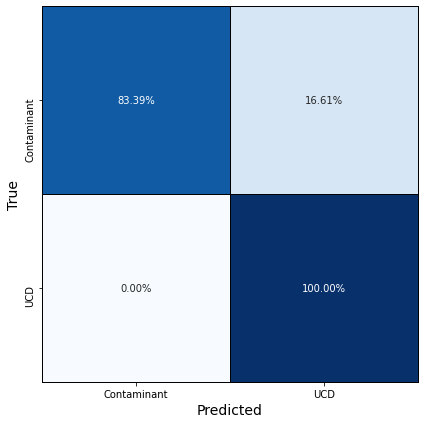

In [342]:
# test model with bin 3

X_mc3 = ucd_j3_oversamp.drop(columns='label')
y_mc3 = ucd_j3_oversamp['label']

X_contam_mc3 = contam_j3_oversamp.drop(columns='label')
y_contam_mc3 = contam_j3_oversamp['label']

X_mc3_all = j3_oversamp_all.drop(columns='label')
y_mc3_all = j3_oversamp_all['label']

# finding the precision
y_pred = RF_model2.predict(x_test)
y_pred_mc3 = RF_model2.predict(X_mc3)
y_pred_contam_mc3 = RF_model2.predict(X_contam_mc3)
y_pred_mc3_all = RF_model2.predict(X_mc3_all)

#print(f1_score(y_mc, y_pred_mc, average='weighted', labels=np.unique(y_pred_mc)))

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, y_pred)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc3, y_pred_mc3)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc3, y_pred_contam_mc3, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc3_all, y_pred_mc3_all)))


# classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_mc3, y_pred_mc3))
print(classification_report(y_contam_mc3, y_pred_contam_mc3, zero_division=0))
print(classification_report(y_mc3_all, y_pred_mc3_all))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_mc3, y_pred_mc3))
print(confusion_matrix(y_contam_mc3, y_pred_contam_mc3))
print(confusion_matrix(y_mc3_all, y_pred_mc3_all))

plot_confusion_matrix(RF_model2, X_mc3, y_mc3)
plot_normalized_confusion_matrix(y_contam_mc3, y_pred_contam_mc3)
plot_normalized_confusion_matrix(y_mc3_all, y_pred_mc3_all)

In [343]:
j3score = precision_score(y_mc3_all, y_pred_mc3_all)
j3f1 = f1_score(y_mc3_all, y_pred_mc3_all)

print(j3score, j3f1)

0.9888802476320954 0.9944090387638254


In [344]:
# select a UCD and generate 1000 using noise for bin 4

photometry_list = []
noise_list = []

for i in range(len(ucd_j4)):
    UCD_phot = ucd_j4.iloc[i,:8]
    UCD_unc = ucd_j4.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j4_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j4_oversamp['label'] = 1
ucd_j4_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,20.407368,17.763385,16.242359,15.751413,14.042350,13.193411,12.792503,12.408185,1
1,20.421955,17.746754,16.241074,15.760439,14.021180,13.157868,12.773954,12.393219,1
2,20.410168,17.741833,16.242619,15.757594,14.039880,13.158541,12.755823,12.365459,1
3,20.385932,17.747283,16.238821,15.756253,14.042513,13.177094,12.781329,12.398247,1
4,20.400654,17.746955,16.239178,15.755456,14.045069,13.133192,12.783977,12.385347,1
...,...,...,...,...,...,...,...,...,...
218995,20.614719,18.087503,16.564207,16.050998,14.316476,13.315869,12.868508,12.576752,1
218996,20.603901,18.080092,16.552498,16.054746,14.287816,13.285132,12.895010,12.561767,1
218997,20.584564,18.091172,16.560485,16.056688,14.299970,13.279961,12.911171,12.551712,1
218998,20.620689,18.086749,16.562004,16.052589,14.290502,13.288043,12.872014,12.575481,1


In [345]:
# same for contaminants in bin 4

photometry_list = []
noise_list = []

for i in range(len(contam_j4)):
    contam_phot = contam_j4.iloc[i,:8]
    contam_unc = contam_j4.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j4_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j4_oversamp['label'] = 0
contam_j4_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.310876,16.967204,16.398753,16.248960,14.998379,14.223801,14.141467,13.985484,0
1,18.311699,16.966271,16.397689,16.249084,14.999488,14.219163,14.137102,13.974049,0
2,18.311792,16.967122,16.397824,16.247929,14.998520,14.220738,14.148297,13.964162,0
3,18.311397,16.966949,16.397976,16.247863,14.999213,14.218870,14.148719,13.969053,0
4,18.311027,16.966875,16.398088,16.249613,14.997330,14.221834,14.133792,13.978401,0
...,...,...,...,...,...,...,...,...,...
57995,16.520611,16.229011,16.064472,16.024759,14.924533,14.288462,14.293047,14.343163,0
57996,16.521012,16.228907,16.064054,16.025789,14.929509,14.287841,14.283606,14.332773,0
57997,16.520842,16.228875,16.064648,16.025500,14.929492,14.284859,14.290986,14.329501,0
57998,16.521072,16.229040,16.064531,16.026178,14.924919,14.288908,14.287776,14.331589,0


In [346]:
# combine bin 4

j4_oversamp_all = pd.concat([ucd_j4_oversamp, contam_j4_oversamp], axis = 0)
j4_oversamp_all

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,20.407368,17.763385,16.242359,15.751413,14.042350,13.193411,12.792503,12.408185,1
1,20.421955,17.746754,16.241074,15.760439,14.021180,13.157868,12.773954,12.393219,1
2,20.410168,17.741833,16.242619,15.757594,14.039880,13.158541,12.755823,12.365459,1
3,20.385932,17.747283,16.238821,15.756253,14.042513,13.177094,12.781329,12.398247,1
4,20.400654,17.746955,16.239178,15.755456,14.045069,13.133192,12.783977,12.385347,1
...,...,...,...,...,...,...,...,...,...
57995,16.520611,16.229011,16.064472,16.024759,14.924533,14.288462,14.293047,14.343163,0
57996,16.521012,16.228907,16.064054,16.025789,14.929509,14.287841,14.283606,14.332773,0
57997,16.520842,16.228875,16.064648,16.025500,14.929492,14.284859,14.290986,14.329501,0
57998,16.521072,16.229040,16.064531,16.026178,14.924919,14.288908,14.287776,14.331589,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9680 !


/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99    219000

    accuracy                           0.97    219000
   macro avg       0.50      0.49      0.49    219000
weighted avg       1.00      0.97      0.99    219000

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     58000
           1       0.00      0.00      0.00         0

    accuracy                           0.88     58000
   macro avg       0.50      0.44      0.47     58000
weighted avg       1.00      0.88      0.94     58000

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     58000
           1       0.97      0.97      0.97    219000

    accuracy                           0.95    277000
   macro avg       0.93      0.93      0.93    277000
weighted avg       0.95      0.95      0.95    277000

[[     0      0]
 [

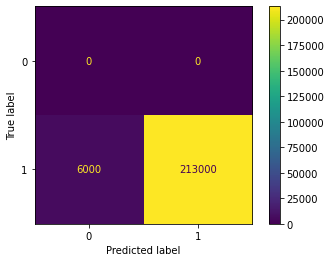

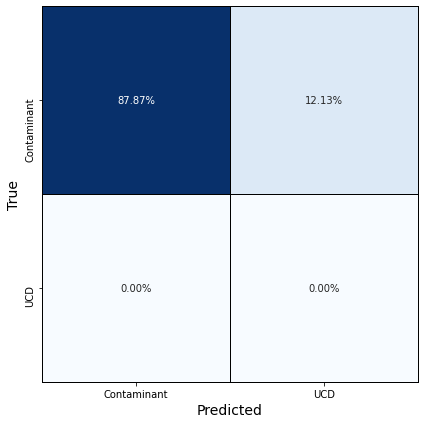

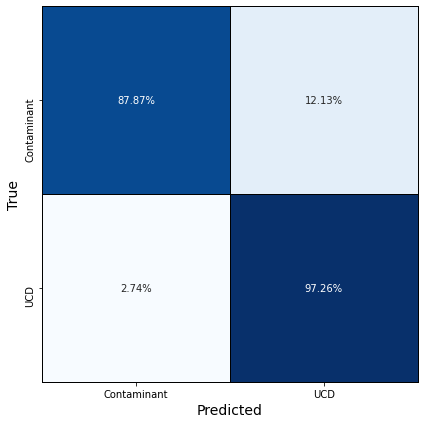

In [347]:
# test model with bin 4

X_mc4 = ucd_j4_oversamp.drop(columns='label')
y_mc4 = ucd_j4_oversamp['label']

X_contam_mc4 = contam_j4_oversamp.drop(columns='label')
y_contam_mc4 = contam_j4_oversamp['label']

X_mc4_all = j4_oversamp_all.drop(columns='label')
y_mc4_all = j4_oversamp_all['label']

# finding the precision
y_pred_mc4 = RF_model2.predict(X_mc4)
y_pred_contam_mc4 = RF_model2.predict(X_contam_mc4)
y_pred_mc4_all = RF_model2.predict(X_mc4_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc4, y_pred_mc4)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc4, y_pred_contam_mc4, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc4_all, y_pred_mc4_all)))


# classification report
print(classification_report(y_mc4, y_pred_mc4))
print(classification_report(y_contam_mc4, y_pred_contam_mc4, zero_division=0))
print(classification_report(y_mc4_all, y_pred_mc4_all))

# confusion matrix
print(confusion_matrix(y_mc4, y_pred_mc4))
print(confusion_matrix(y_contam_mc4, y_pred_contam_mc4))
print(confusion_matrix(y_mc4_all, y_pred_mc4_all))

plot_confusion_matrix(RF_model2, X_mc4, y_mc4)
plot_normalized_confusion_matrix(y_contam_mc4, y_pred_contam_mc4)
plot_normalized_confusion_matrix(y_mc4_all, y_pred_mc4_all)

In [348]:
j4score = precision_score(y_mc4_all, y_pred_mc4_all)
j4f1 = f1_score(y_mc4_all, y_pred_mc4_all)

print(j4score, j4f1)

0.9680366126899147 0.9703143043916971


In [349]:
# select a UCD and generate 1000 using noise for bin 5

photometry_list = []
noise_list = []

for i in range(len(ucd_j5)):
    UCD_phot = ucd_j5.iloc[i,:8]
    UCD_unc = ucd_j5.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j5_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j5_oversamp['label'] = 1
ucd_j5_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.194947,19.801213,18.267811,17.707690,15.567529,14.031952,13.490399,13.205532,1
1,22.269733,19.805296,18.255487,17.703127,15.557881,14.069132,13.483584,13.210919,1
2,22.253302,19.797286,18.263652,17.705711,15.538529,14.065904,13.455305,13.228212,1
3,22.227771,19.810051,18.257487,17.701511,15.551921,13.978790,13.471541,13.198382,1
4,22.245682,19.805668,18.264542,17.708623,15.480419,14.029213,13.479648,13.188972,1
...,...,...,...,...,...,...,...,...,...
190995,21.031224,18.741694,17.666955,17.384022,15.676999,15.164852,13.417250,13.182576,1
190996,20.992873,18.739730,17.662786,17.378711,15.785492,15.051578,13.425135,13.201537,1
190997,20.946659,18.738959,17.659042,17.374992,15.663897,15.216076,13.407575,13.182474,1
190998,20.979849,18.741477,17.662067,17.385884,15.654029,15.280904,13.424113,13.200661,1


In [350]:
# same for contaminants in bin 5

photometry_list = []
noise_list = []

for i in range(len(contam_j5)):
    contam_phot = contam_j5.iloc[i,:8]
    contam_unc = contam_j5.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j5_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j5_oversamp['label'] = 0
contam_j5_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.344295,20.054595,18.519663,17.930822,15.671959,14.059975,13.395289,12.984249,0
1,22.351500,20.063416,18.520639,17.935456,15.669421,14.054480,13.399050,12.966835,0
2,22.326116,20.058752,18.520860,17.932638,15.671707,14.059380,13.401408,12.976910,0
3,22.334110,20.061837,18.517715,17.929646,15.673151,14.056937,13.389573,12.975183,0
4,22.333085,20.057841,18.518881,17.933321,15.674174,14.058187,13.413482,12.977201,0
...,...,...,...,...,...,...,...,...,...
104995,17.173952,17.017358,16.942966,16.950369,15.979485,15.566104,15.484018,15.620462,0
104996,17.173318,17.017236,16.942694,16.945396,15.978109,15.551953,15.498501,15.655083,0
104997,17.173947,17.016941,16.943616,16.950166,15.980672,15.556014,15.517453,15.598179,0
104998,17.173300,17.017346,16.943149,16.948696,15.980412,15.558534,15.498185,15.669845,0


In [351]:
# combine bin 5

j5_oversamp_all = pd.concat([ucd_j5_oversamp, contam_j5_oversamp], axis = 0)
j5_oversamp_all

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.194947,19.801213,18.267811,17.707690,15.567529,14.031952,13.490399,13.205532,1
1,22.269733,19.805296,18.255487,17.703127,15.557881,14.069132,13.483584,13.210919,1
2,22.253302,19.797286,18.263652,17.705711,15.538529,14.065904,13.455305,13.228212,1
3,22.227771,19.810051,18.257487,17.701511,15.551921,13.978790,13.471541,13.198382,1
4,22.245682,19.805668,18.264542,17.708623,15.480419,14.029213,13.479648,13.188972,1
...,...,...,...,...,...,...,...,...,...
104995,17.173952,17.017358,16.942966,16.950369,15.979485,15.566104,15.484018,15.620462,0
104996,17.173318,17.017236,16.942694,16.945396,15.978109,15.551953,15.498501,15.655083,0
104997,17.173947,17.016941,16.943616,16.950166,15.980672,15.556014,15.517453,15.598179,0
104998,17.173300,17.017346,16.943149,16.948696,15.980412,15.558534,15.498185,15.669845,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9621 !


/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99    191000

    accuracy                           0.98    191000
   macro avg       0.50      0.49      0.50    191000
weighted avg       1.00      0.98      0.99    191000

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    105000
           1       0.00      0.00      0.00         0

    accuracy                           0.93    105000
   macro avg       0.50      0.46      0.48    105000
weighted avg       1.00      0.93      0.96    105000

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    105000
           1       0.96      0.98      0.97    191000

    accuracy                           0.96    296000
   macro avg       0.96      0.96      0.96    296000
weighted avg       0.96      0.96      0.96    296000

[[     0      0]
 [

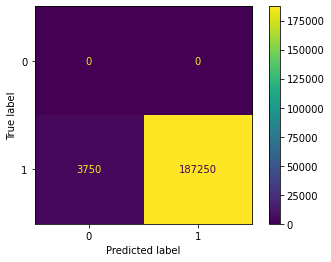

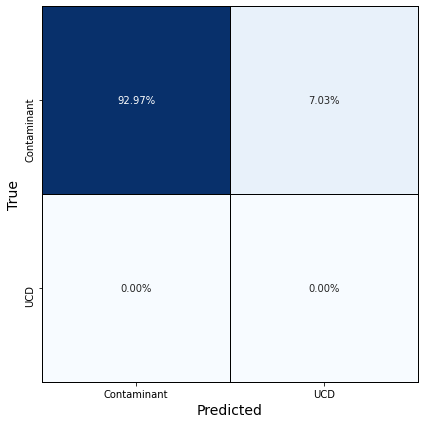

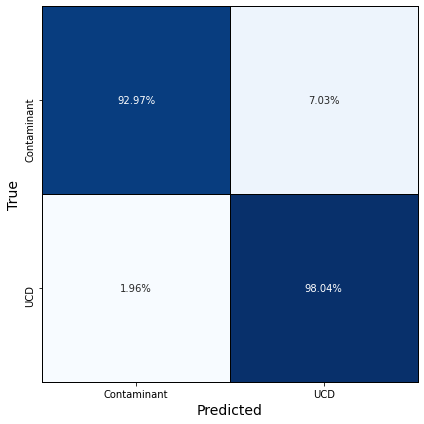

In [352]:
# test model with bin 5

X_mc5 = ucd_j5_oversamp.drop(columns='label')
y_mc5 = ucd_j5_oversamp['label']

X_contam_mc5 = contam_j5_oversamp.drop(columns='label')
y_contam_mc5 = contam_j5_oversamp['label']

X_mc5_all = j5_oversamp_all.drop(columns='label')
y_mc5_all = j5_oversamp_all['label']

# finding the precision
y_pred_mc5 = RF_model2.predict(X_mc5)
y_pred_contam_mc5 = RF_model2.predict(X_contam_mc5)
y_pred_mc5_all = RF_model2.predict(X_mc5_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc5, y_pred_mc5)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc5, y_pred_contam_mc5, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc5_all, y_pred_mc5_all)))


# classification report
print(classification_report(y_mc5, y_pred_mc5))
print(classification_report(y_contam_mc5, y_pred_contam_mc5, zero_division=0))
print(classification_report(y_mc5_all, y_pred_mc5_all))

# confusion matrix
print(confusion_matrix(y_mc5, y_pred_mc5))
print(confusion_matrix(y_contam_mc5, y_pred_contam_mc5))
print(confusion_matrix(y_mc5_all, y_pred_mc5_all))

plot_confusion_matrix(RF_model2, X_mc5, y_mc5)
plot_normalized_confusion_matrix(y_contam_mc5, y_pred_contam_mc5)
plot_normalized_confusion_matrix(y_mc5_all, y_pred_mc5_all)

In [353]:
j5score = precision_score(y_mc5_all, y_pred_mc5_all)
j5f1 = f1_score(y_mc5_all, y_pred_mc5_all)

print(j5score, j5f1)

0.962081898987823 0.9711381375930296


In [354]:
# select a UCD and generate 1000 using noise for bin 6

photometry_list = []
noise_list = []

for i in range(len(ucd_j6)):
    UCD_phot = ucd_j6.iloc[i,:8]
    UCD_unc = ucd_j6.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j6_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j6_oversamp['label'] = 1
ucd_j6_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.148958,20.093562,18.548623,17.993448,16.103636,15.028018,14.642955,14.123159,1
1,22.192040,20.098917,18.548028,18.001609,16.078624,15.011940,14.637108,14.109508,1
2,22.069080,20.089528,18.533056,18.017260,16.142280,15.058385,14.643419,14.097086,1
3,22.114462,20.087809,18.528602,18.003141,15.988831,15.063272,14.627896,14.098965,1
4,22.183006,20.078841,18.527418,17.992348,16.135660,14.997703,14.642180,14.101385,1
...,...,...,...,...,...,...,...,...,...
69995,23.175853,21.116204,19.545981,19.008508,16.923455,15.195962,14.592243,14.395549,1
69996,23.122814,21.115453,19.530782,19.028583,16.839111,15.211952,14.632283,14.370393,1
69997,23.160585,21.116109,19.550549,18.973911,16.754762,15.044805,14.578639,14.367099,1
69998,23.144658,21.146008,19.567050,18.996330,16.832638,15.144259,14.590255,14.419471,1


In [355]:
# same for contaminants in bin 6

photometry_list = []
noise_list = []

for i in range(len(contam_j6)):
    contam_phot = contam_j6.iloc[i,:8]
    contam_unc = contam_j6.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j6_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j6_oversamp['label'] = 0
contam_j6_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.281193,17.676280,17.378802,17.304757,16.130827,15.403295,15.315911,15.346032,0
1,18.281591,17.677341,17.378420,17.301919,16.135967,15.403015,15.329504,15.372682,0
2,18.280661,17.677142,17.377548,17.299715,16.132318,15.411915,15.325924,15.354682,0
3,18.280830,17.676470,17.379133,17.301565,16.135733,15.405038,15.346308,15.369269,0
4,18.282399,17.677616,17.377954,17.299784,16.138579,15.398349,15.335399,15.342732,0
...,...,...,...,...,...,...,...,...,...
154995,20.112799,18.500027,17.792175,17.608720,16.304945,15.539675,15.379956,15.280982,0
154996,20.113155,18.498576,17.791775,17.610685,16.304206,15.533023,15.351075,15.265523,0
154997,20.111197,18.500397,17.791678,17.605052,16.300529,15.532475,15.341905,15.298574,0
154998,20.106942,18.500648,17.792464,17.610114,16.301853,15.539788,15.363736,15.238071,0


In [356]:
# combine bin 6

j6_oversamp_all = pd.concat([ucd_j6_oversamp, contam_j6_oversamp], axis = 0)
j6_oversamp_all

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.148958,20.093562,18.548623,17.993448,16.103636,15.028018,14.642955,14.123159,1
1,22.192040,20.098917,18.548028,18.001609,16.078624,15.011940,14.637108,14.109508,1
2,22.069080,20.089528,18.533056,18.017260,16.142280,15.058385,14.643419,14.097086,1
3,22.114462,20.087809,18.528602,18.003141,15.988831,15.063272,14.627896,14.098965,1
4,22.183006,20.078841,18.527418,17.992348,16.135660,14.997703,14.642180,14.101385,1
...,...,...,...,...,...,...,...,...,...
154995,20.112799,18.500027,17.792175,17.608720,16.304945,15.539675,15.379956,15.280982,0
154996,20.113155,18.498576,17.791775,17.610685,16.304206,15.533023,15.351075,15.265523,0
154997,20.111197,18.500397,17.791678,17.605052,16.300529,15.532475,15.341905,15.298574,0
154998,20.106942,18.500648,17.792464,17.610114,16.301853,15.539788,15.363736,15.238071,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9843 !
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98     70000

    accuracy                           0.96     70000
   macro avg       0.50      0.48      0.49     70000
weighted avg       1.00      0.96      0.98     70000



/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    155000
           1       0.00      0.00      0.00         0

    accuracy                           0.99    155000
   macro avg       0.50      0.50      0.50    155000
weighted avg       1.00      0.99      1.00    155000

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    155000
           1       0.98      0.96      0.97     70000

    accuracy                           0.98    225000
   macro avg       0.98      0.98      0.98    225000
weighted avg       0.98      0.98      0.98    225000

[[    0     0]
 [ 2559 67441]]
[[153923   1077]
 [     0      0]]
[[153923   1077]
 [  2559  67441]]


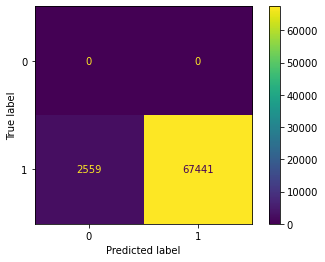

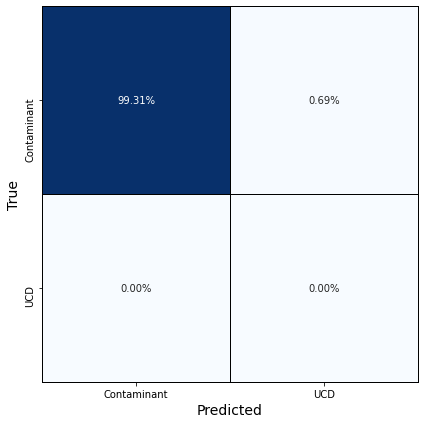

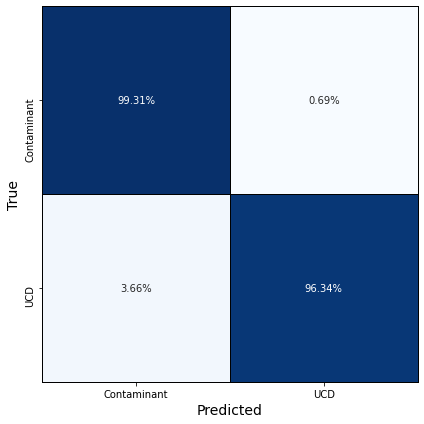

In [357]:
# test model with bin 6

X_mc6 = ucd_j6_oversamp.drop(columns='label')
y_mc6 = ucd_j6_oversamp['label']

X_contam_mc6 = contam_j6_oversamp.drop(columns='label')
y_contam_mc6 = contam_j6_oversamp['label']

X_mc6_all = j6_oversamp_all.drop(columns='label')
y_mc6_all = j6_oversamp_all['label']

# finding the precision
y_pred_mc6 = RF_model2.predict(X_mc6)
y_pred_contam_mc6 = RF_model2.predict(X_contam_mc6)
y_pred_mc6_all = RF_model2.predict(X_mc6_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc6, y_pred_mc6)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc6, y_pred_contam_mc6, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc6_all, y_pred_mc6_all)))


# classification report
print(classification_report(y_mc6, y_pred_mc6))
print(classification_report(y_contam_mc6, y_pred_contam_mc6, zero_division=0))
print(classification_report(y_mc6_all, y_pred_mc6_all))

# confusion matrix
print(confusion_matrix(y_mc6, y_pred_mc6))
print(confusion_matrix(y_contam_mc6, y_pred_contam_mc6))
print(confusion_matrix(y_mc6_all, y_pred_mc6_all))

plot_confusion_matrix(RF_model2, X_mc6, y_mc6)
plot_normalized_confusion_matrix(y_contam_mc6, y_pred_contam_mc6)
plot_normalized_confusion_matrix(y_mc6_all, y_pred_mc6_all)

In [358]:
j6score = precision_score(y_mc6_all, y_pred_mc6_all)
j6f1 = f1_score(y_mc6_all, y_pred_mc6_all)

print(j6score, j6f1)

0.984281502670831 0.9737507038796401


In [359]:
# same for contaminants in bin 7

photometry_list = []
noise_list = []

for i in range(len(contam_j7)):
    contam_phot = contam_j7.iloc[i,:8]
    contam_unc = contam_j7.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j7_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j7_oversamp['label'] = 0
contam_j7_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,21.311270,19.782320,19.142126,18.981270,17.722189,16.957461,16.776163,16.736027,0
1,21.311731,19.781650,19.144890,18.990139,17.689646,16.969145,16.809422,16.793768,0
2,21.306857,19.781519,19.142343,18.985363,17.727766,16.981959,16.787399,16.809348,0
3,21.311273,19.782276,19.144227,18.980276,17.727297,16.959136,16.813124,16.731931,0
4,21.307655,19.782273,19.144661,18.980111,17.697513,16.941512,16.793055,16.803460,0
...,...,...,...,...,...,...,...,...,...
221995,23.244311,22.270722,21.725119,21.372590,17.011044,16.212427,16.153381,16.115484,0
221996,23.281935,22.267093,21.701130,21.454797,17.012029,16.240152,16.166987,16.079537,0
221997,23.213399,22.249757,21.739046,21.449204,17.013857,16.248915,16.153040,16.102888,0
221998,23.231911,22.272626,21.712464,21.345484,17.021864,16.237096,16.175422,16.001924,0


The raw features produce a model with precision ~0.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222000

    accuracy                           1.00    222000
   macro avg       1.00      1.00      1.00    222000
weighted avg       1.00      1.00      1.00    222000

[[222000]]


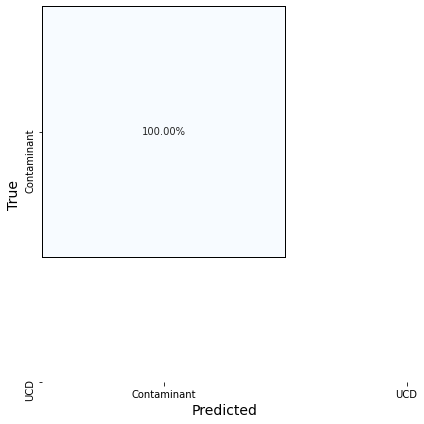

In [360]:
# test model with bin 7

X_contam_mc7 = contam_j7_oversamp.drop(columns='label')
y_contam_mc7 = contam_j7_oversamp['label']

# finding the precision
y_pred_contam_mc7 = RF_model2.predict(X_contam_mc7)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc7, y_pred_contam_mc7, zero_division=0)))

# classification report
print(classification_report(y_contam_mc7, y_pred_contam_mc7, zero_division=0))

# confusion matrix
print(confusion_matrix(y_contam_mc7, y_pred_contam_mc7))

plot_normalized_confusion_matrix(y_contam_mc7, y_pred_contam_mc7)

In [361]:
j7score = 1.0
j7f1 = 1.0

print(j7score, j7f1)

1.0 1.0


In [362]:
# same for contaminants in bin 8

photometry_list = []
noise_list = []

for i in range(len(contam_j8)):
    contam_phot = contam_j8.iloc[i,:8]
    contam_unc = contam_j8.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j8_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j8_oversamp['label'] = 0
contam_j8_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,20.582736,20.007844,19.726297,19.669098,18.577856,17.705628,13.412030,12.975993,0
1,20.585350,20.010576,19.726100,19.672344,18.594741,17.909891,13.406284,12.981602,0
2,20.588293,20.016737,19.727305,19.651680,18.564755,17.792981,13.416619,12.969291,0
3,20.583158,20.014392,19.725348,19.676358,18.605405,17.784293,13.403334,12.970906,0
4,20.586561,20.009783,19.726651,19.651022,18.571742,17.763568,13.407903,12.968666,0
...,...,...,...,...,...,...,...,...,...
201995,20.418718,19.835879,19.557942,19.474238,18.342650,17.600762,15.655921,15.711782,0
201996,20.418455,19.840194,19.558421,19.485498,18.299150,17.578112,15.664379,15.757875,0
201997,20.418878,19.833908,19.555579,19.473928,18.306597,17.651372,15.677750,15.686154,0
201998,20.415038,19.837438,19.555030,19.469847,18.348452,17.636984,15.660687,15.712036,0


The raw features produce a model with precision ~0.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202000

    accuracy                           1.00    202000
   macro avg       1.00      1.00      1.00    202000
weighted avg       1.00      1.00      1.00    202000

[[202000]]


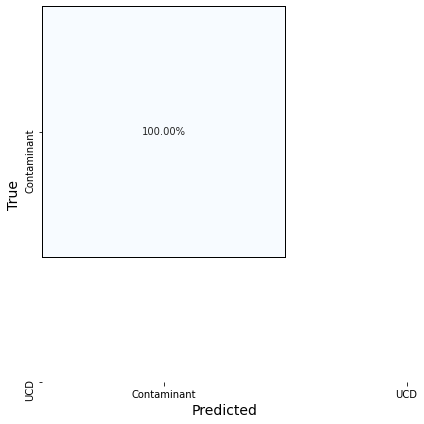

In [363]:
# test model with bin 8

X_contam_mc8 = contam_j8_oversamp.drop(columns='label')
y_contam_mc8 = contam_j8_oversamp['label']

# finding the precision
y_pred_contam_mc8 = RF_model2.predict(X_contam_mc8)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc8, y_pred_contam_mc8, zero_division=0)))

# classification report
print(classification_report(y_contam_mc8, y_pred_contam_mc8, zero_division=0))

# confusion matrix
print(confusion_matrix(y_contam_mc8, y_pred_contam_mc8))

plot_normalized_confusion_matrix(y_contam_mc8, y_pred_contam_mc8)

In [364]:
j8score = 1.0
j8f1 = 1.0

In [365]:
# same for contaminants in bin 9

photometry_list = []
noise_list = []

for i in range(len(contam_j9)):
    contam_phot = contam_j9.iloc[i,:8]
    contam_unc = contam_j9.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j9_oversamp = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j9_oversamp['label'] = 0
contam_j9_oversamp

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,23.459269,22.378316,21.966783,21.688614,19.513294,17.963188,16.565754,16.575624,0
1,23.405048,22.351932,21.946457,21.563888,19.540209,17.892393,16.586823,16.535736,0
2,23.423381,22.393676,21.951051,21.789745,19.614683,17.827028,16.549582,16.599558,0
3,23.475849,22.383150,21.936071,21.647647,19.427736,17.847545,16.573943,16.527518,0
4,23.472166,22.372527,21.898093,21.564025,19.454501,17.820899,16.547977,16.501845,0
...,...,...,...,...,...,...,...,...,...
105995,20.202963,20.026792,19.888728,19.976109,19.156073,17.569030,16.818817,15.702255,0
105996,20.197417,20.031256,19.887346,19.948843,19.086895,17.582772,16.804167,15.694658,0
105997,20.199400,20.031176,19.882372,19.979113,19.187830,17.610380,16.843597,15.633210,0
105998,20.205037,20.035823,19.882960,19.971425,19.083459,17.603985,16.856005,15.698028,0


The raw features produce a model with precision ~0.0000 !
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106000

    accuracy                           1.00    106000
   macro avg       1.00      1.00      1.00    106000
weighted avg       1.00      1.00      1.00    106000

[[106000]]


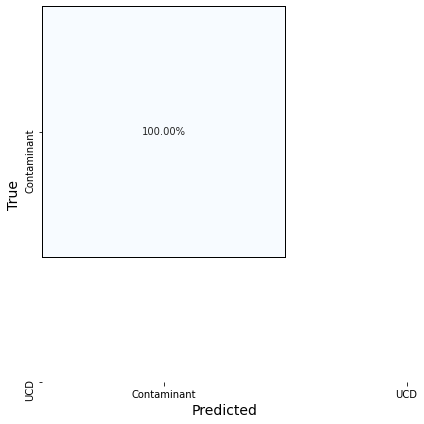

In [366]:
# test model with bin 9

X_contam_mc9 = contam_j9_oversamp.drop(columns='label')
y_contam_mc9 = contam_j9_oversamp['label']

# finding the precision
y_pred_contam_mc9 = RF_model2.predict(X_contam_mc9)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc9, y_pred_contam_mc9, zero_division=0)))

# classification report
print(classification_report(y_contam_mc9, y_pred_contam_mc9, zero_division=0))

# confusion matrix
print(confusion_matrix(y_contam_mc9, y_pred_contam_mc9))

plot_normalized_confusion_matrix(y_contam_mc9, y_pred_contam_mc9)

In [367]:
j9score = 1.0
j9f1 = 1.0

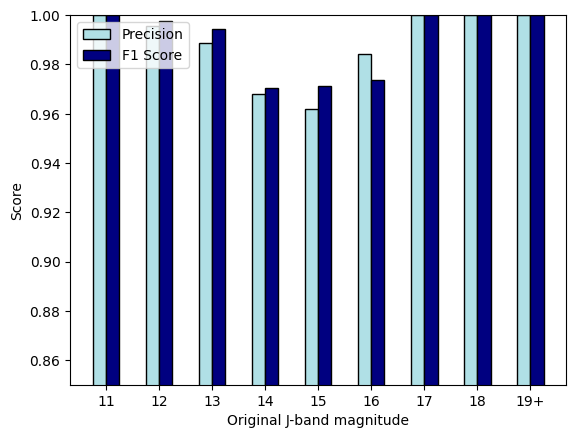

In [548]:
# plotting the accuracy and f1 score of each model

models = ['11', '12', '13', '14', '15', '16', '17', '18', '19+']
accuracies = [j1score, j2score, j3score, j4score, j5score, j6score, j7score, j8score, j9score]
f1s = [j1f1, j2f1, j3f1, j4f1, j5f1, j6f1, j7f1, j8f1, j9f1]
  
n = 9
r = np.arange(n)
width = 0.25
    
plt.bar(r, accuracies, color = 'powderblue',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width, f1s, color = 'navy',
        width = width, edgecolor = 'black',
        label= 'F1 Score')
  
plt.xlabel("Original J-band magnitude")
plt.ylabel("Score")
# plt.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, models)
plt.ylim(0.85, 1)
plt.legend(loc='upper left')
plt.savefig('jbandaccuracies')
plt.show()

In [501]:
# now add constants to make sure the histogram aligns

mc_sample_shifted = mc_sample_corr.copy()

mc_sample_shifted['VISTA_J'] = mc_sample_shifted['VISTA_J'].apply(lambda x : x+3)

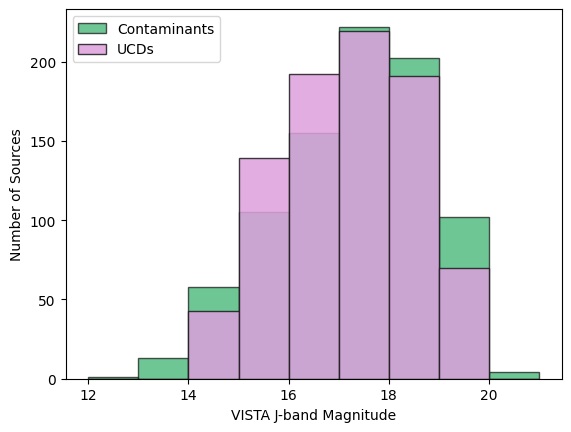

In [550]:
# highlighting UCDs in J-band photometry histogram

bins = np.arange(12, 22, 1)

plt.hist(mc_contams['VISTA_J'], bins = bins, color = 'mediumseagreen', \
         edgecolor = 'k', alpha = 0.75)
plt.hist(mc_sample_shifted['VISTA_J'], bins = bins, color='plum', \
         edgecolor='k', alpha = 0.85)
#plt.title('Distribution of J-band Photometry', fontsize = 15)
plt.xlabel('VISTA J-band Magnitude')
plt.ylabel('Number of Sources')
plt.legend(('Contaminants', 'UCDs'))
plt.savefig('jbandhistmod.png')

In [377]:
# split the contaminants and ucds into their bins

ucd_j1_add = mc_sample_shifted.loc[mc_sample_shifted['VISTA_J'] <= 15]
ucd_j2_add = mc_sample_shifted.loc[(mc_sample_shifted['VISTA_J'] > 15) & (mc_sample_shifted['VISTA_J'] <= 16)]
ucd_j3_add = mc_sample_shifted.loc[(mc_sample_shifted['VISTA_J'] > 16) & (mc_sample_shifted['VISTA_J'] <= 17)]
ucd_j4_add = mc_sample_shifted.loc[(mc_sample_shifted['VISTA_J'] > 17) & (mc_sample_shifted['VISTA_J'] <= 18)]
ucd_j5_add = mc_sample_shifted.loc[(mc_sample_shifted['VISTA_J'] > 18) & (mc_sample_shifted['VISTA_J'] <= 19)]
ucd_j6_add = mc_sample_shifted.loc[(mc_sample_shifted['VISTA_J'] > 19) & (mc_sample_shifted['VISTA_J'] <= 30)]

ucd_binsizes2 = np.array([len(ucd_j1_add), len(ucd_j2_add), len(ucd_j3_add), len(ucd_j4_add), len(ucd_j5_add), len(ucd_j6_add)])

contam_j1_add = mc_contams.loc[(mc_contams['VISTA_J'] > 14) & (mc_contams['VISTA_J'] <= 15)]
contam_j2_add = mc_contams.loc[(mc_contams['VISTA_J'] > 15) & (mc_contams['VISTA_J'] <= 16)]
contam_j3_add = mc_contams.loc[(mc_contams['VISTA_J'] > 16) & (mc_contams['VISTA_J'] <= 17)]
contam_j4_add = mc_contams.loc[(mc_contams['VISTA_J'] > 17) & (mc_contams['VISTA_J'] <= 18)]
contam_j5_add = mc_contams.loc[(mc_contams['VISTA_J'] > 18) & (mc_contams['VISTA_J'] <= 19)]
contam_j6_add = mc_contams.loc[(mc_contams['VISTA_J'] > 19)]

contam_binsizes2 = np.array([len(contam_j1_add), len(contam_j2_add), len(contam_j3_add), len(contam_j4_add), len(contam_j5_add), len(contam_j6_add)])

print(ucd_binsizes2, contam_binsizes2)

[ 43 139 192 219 191  70] [ 58 105 155 222 202 106]


In [378]:
# select a UCD and generate 1000 using noise for bin 1

photometry_list = []
noise_list = []

for i in range(len(ucd_j1_add)):
    UCD_phot = ucd_j1_add.iloc[i,:8]
    UCD_unc = ucd_j1_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j1_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j1_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2
0,16.956916,14.691503,13.603545,13.304544,14.869212,11.117951,10.884534,10.676087
1,16.957690,14.688403,13.601941,13.301200,14.875013,11.149160,10.884025,10.683099
2,16.954278,14.692777,13.596521,13.304011,14.887323,11.125674,10.905929,10.696684
3,16.961449,14.699450,13.592185,13.299744,14.877855,11.123044,10.875124,10.688892
4,16.948824,14.693802,13.595356,13.293548,14.867477,11.124813,10.892618,10.684323
...,...,...,...,...,...,...,...,...
42995,17.586782,14.937612,13.567362,13.156216,14.547711,10.683583,10.382723,10.192123
42996,17.580760,14.934171,13.566505,13.152806,14.534650,10.688904,10.403460,10.195687
42997,17.585193,14.928947,13.557179,13.150571,14.544708,10.685262,10.400494,10.198677
42998,17.584183,14.931236,13.562831,13.150147,14.552042,10.671300,10.397040,10.208100


In [379]:
ucd_j1_overadd['label'] = 1

In [380]:
photometry_list = []
noise_list = []

for i in range(len(contam_j1_add)):
    contam_phot = contam_j1_add.iloc[i,:8]
    contam_unc = contam_j1_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j1_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j1_overadd['label'] = 0
contam_j1_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.311625,16.966658,16.398319,16.248951,14.998504,14.214246,14.136033,13.972431,0
1,18.311584,16.967216,16.398166,16.249646,15.000031,14.214172,14.138072,13.981261,0
2,18.311532,16.967121,16.397975,16.248873,14.997239,14.222301,14.138098,13.985099,0
3,18.311730,16.966255,16.397799,16.249787,14.999288,14.217245,14.124966,13.981485,0
4,18.310807,16.967534,16.398050,16.250347,14.996175,14.226646,14.141295,13.977621,0
...,...,...,...,...,...,...,...,...,...
57995,16.521043,16.228980,16.064188,16.026815,14.927089,14.292373,14.282170,14.354040,0
57996,16.521093,16.228478,16.064178,16.025799,14.927959,14.301365,14.299920,14.346442,0
57997,16.520475,16.228857,16.064418,16.025661,14.928221,14.292032,14.297597,14.333522,0
57998,16.520535,16.228945,16.064493,16.025856,14.927853,14.293275,14.284857,14.340432,0


In [381]:
# combine bin 1

j1_oversamp_add = pd.concat([ucd_j1_overadd, contam_j1_overadd], axis = 0)
j1_oversamp_add

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,16.956916,14.691503,13.603545,13.304544,14.869212,11.117951,10.884534,10.676087,1
1,16.957690,14.688403,13.601941,13.301200,14.875013,11.149160,10.884025,10.683099,1
2,16.954278,14.692777,13.596521,13.304011,14.887323,11.125674,10.905929,10.696684,1
3,16.961449,14.699450,13.592185,13.299744,14.877855,11.123044,10.875124,10.688892,1
4,16.948824,14.693802,13.595356,13.293548,14.867477,11.124813,10.892618,10.684323,1
...,...,...,...,...,...,...,...,...,...
57995,16.521043,16.228980,16.064188,16.026815,14.927089,14.292373,14.282170,14.354040,0
57996,16.521093,16.228478,16.064178,16.025799,14.927959,14.301365,14.299920,14.346442,0
57997,16.520475,16.228857,16.064418,16.025661,14.928221,14.292032,14.297597,14.333522,0
57998,16.520535,16.228945,16.064493,16.025856,14.927853,14.293275,14.284857,14.340432,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.8588 !
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     43000

    accuracy                           1.00     43000
   macro avg       1.00      1.00      1.00     43000
weighted avg       1.00      1.00      1.00     43000

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     58000
           1       0.00      0.00      0.00         0

    accuracy                           0.88     58000
   macro avg       0.50      0.44      0.47     58000
weighted avg       1.00      0.88      0.94     58000

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     58000
           1       0.86      1.00      0.92     43000

    accuracy                           0.93    101000
   macro

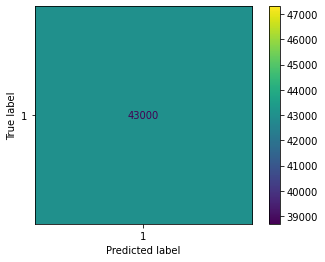

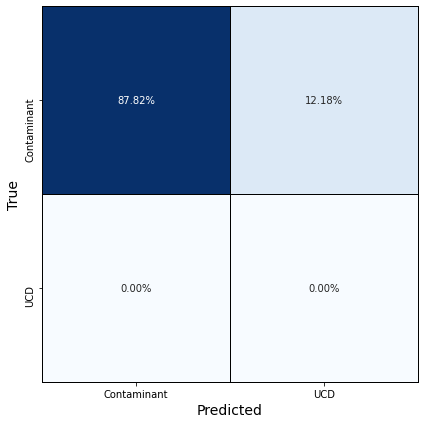

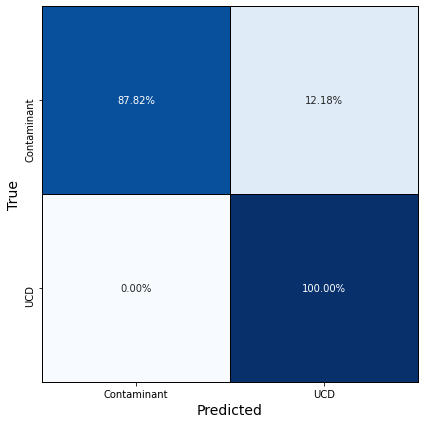

In [382]:
# test model with bin 1

X_mc1a = ucd_j1_overadd.drop(columns='label')
y_mc1a = ucd_j1_overadd['label']

X_contam_mc1a = contam_j1_overadd.drop(columns='label')
y_contam_mc1a = contam_j1_overadd['label']

X_mc1a_all = j1_oversamp_add.drop(columns='label')
y_mc1a_all = j1_oversamp_add['label']

# finding the precision
y_pred_mc1a = RF_model2.predict(X_mc1a)
y_pred_contam_mc1a = RF_model2.predict(X_contam_mc1a)
y_pred_mc1a_all = RF_model2.predict(X_mc1a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc1a, y_pred_mc1a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc1a, y_pred_contam_mc1a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc1a_all, y_pred_mc1a_all)))

# classification report
print(classification_report(y_mc1a, y_pred_mc1a))
print(classification_report(y_contam_mc1a, y_pred_contam_mc1a, zero_division=0))
print(classification_report(y_mc1a_all, y_pred_mc1a_all))

# confusion matrix
print(confusion_matrix(y_mc1a, y_pred_mc1a))
print(confusion_matrix(y_contam_mc1a, y_pred_contam_mc1a))
print(confusion_matrix(y_mc1a_all, y_pred_mc1a_all))

plot_confusion_matrix(RF_model2, X_mc1a, y_mc1a)
plot_normalized_confusion_matrix(y_contam_mc1a, y_pred_contam_mc1a)
plot_normalized_confusion_matrix(y_mc1a_all, y_pred_mc1a_all)

In [383]:
j1score_adj = precision_score(y_mc1a_all, y_pred_mc1a_all)
j1f1_adj = f1_score(y_mc1a_all, y_pred_mc1a_all)

print(j1score_adj, j1f1_adj)

0.8588491421495197 0.9240654582182729


In [384]:
# select a UCD and generate 1000 using noise for bin 1

photometry_list = []
noise_list = []

for i in range(len(ucd_j2_add)):
    UCD_phot = ucd_j2_add.iloc[i,:8]
    UCD_unc = ucd_j2_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j2_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j2_overadd['label'] = 1

photometry_list = []
noise_list = []

for i in range(len(contam_j2_add)):
    contam_phot = contam_j2_add.iloc[i,:8]
    contam_unc = contam_j2_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j2_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j2_overadd['label'] = 0
contam_j2_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,22.330910,20.058663,18.522931,17.928673,15.671367,14.060328,13.413645,12.969643,0
1,22.344583,20.059334,18.519672,17.931136,15.673170,14.059420,13.398991,12.981018,0
2,22.336979,20.057244,18.519890,17.926312,15.674847,14.052581,13.406773,12.979591,0
3,22.340607,20.061729,18.517661,17.933180,15.673534,14.055685,13.398201,12.980807,0
4,22.328552,20.062004,18.521539,17.929152,15.667956,14.057917,13.394894,12.963152,0
...,...,...,...,...,...,...,...,...,...
104995,17.173561,17.017697,16.943435,16.948463,15.985348,15.548766,15.510215,15.643583,0
104996,17.173384,17.017606,16.943670,16.948614,15.978732,15.562736,15.506057,15.592639,0
104997,17.173644,17.017484,16.943237,16.948970,15.983254,15.551423,15.502152,15.627374,0
104998,17.173692,17.017138,16.942937,16.949423,15.976765,15.559916,15.516309,15.687261,0


In [385]:
j2_oversamp_add = pd.concat([ucd_j2_overadd, contam_j2_overadd], axis = 0)
j2_oversamp_add

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.898549,16.364145,15.004052,14.593788,15.978189,12.042912,11.713081,11.556207,1
1,18.903164,16.370168,15.005819,14.598774,15.956681,12.031102,11.691813,11.543743,1
2,18.901285,16.369908,15.009291,14.599009,15.971541,12.018475,11.707765,11.556546,1
3,18.899875,16.357008,15.003537,14.592791,15.972024,11.996570,11.684843,11.548458,1
4,18.907775,16.360997,15.009317,14.595057,15.963169,11.992782,11.717115,11.550255,1
...,...,...,...,...,...,...,...,...,...
104995,17.173561,17.017697,16.943435,16.948463,15.985348,15.548766,15.510215,15.643583,0
104996,17.173384,17.017606,16.943670,16.948614,15.978732,15.562736,15.506057,15.592639,0
104997,17.173644,17.017484,16.943237,16.948970,15.983254,15.551423,15.502152,15.627374,0
104998,17.173692,17.017138,16.942937,16.949423,15.976765,15.559916,15.516309,15.687261,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9496 !
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    139000

    accuracy                           1.00    139000
   macro avg       1.00      1.00      1.00    139000
weighted avg       1.00      1.00      1.00    139000

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    105000
           1       0.00      0.00      0.00         0

    accuracy                           0.93    105000
   macro avg       0.50      0.46      0.48    105000
weighted avg       1.00      0.93      0.96    105000

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    105000
           1       0.95      1.00      0.97    139000

    accuracy                           0.97    244000
   macro

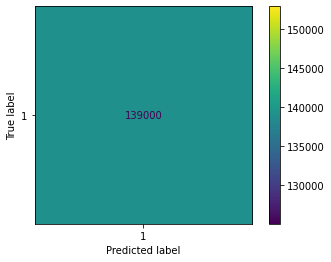

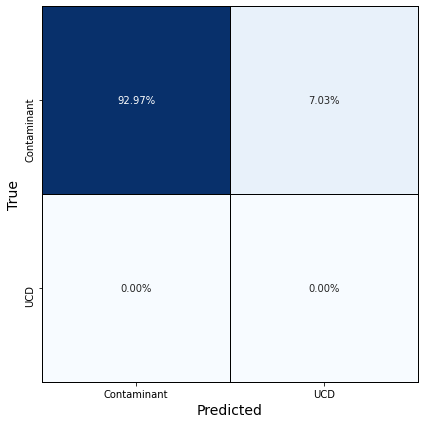

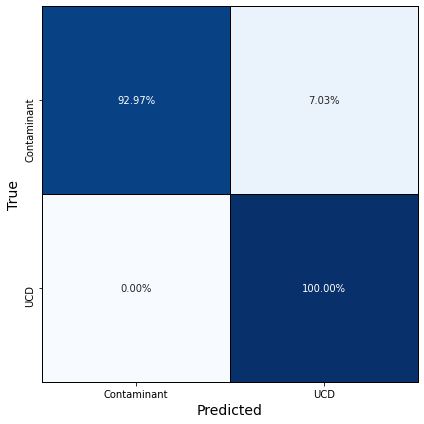

In [386]:
# combine bin 2

X_mc2a = ucd_j2_overadd.drop(columns='label')
y_mc2a = ucd_j2_overadd['label']

X_contam_mc2a = contam_j2_overadd.drop(columns='label')
y_contam_mc2a = contam_j2_overadd['label']

X_mc2a_all = j2_oversamp_add.drop(columns='label')
y_mc2a_all = j2_oversamp_add['label']

# finding the precision
y_pred_mc2a = RF_model2.predict(X_mc2a)
y_pred_contam_mc2a = RF_model2.predict(X_contam_mc2a)
y_pred_mc2a_all = RF_model2.predict(X_mc2a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc2a, y_pred_mc2a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc2a, y_pred_contam_mc2a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc2a_all, y_pred_mc2a_all)))

# classification report
print(classification_report(y_mc2a, y_pred_mc2a))
print(classification_report(y_contam_mc2a, y_pred_contam_mc2a, zero_division=0))
print(classification_report(y_mc2a_all, y_pred_mc2a_all))

# confusion matrix
print(confusion_matrix(y_mc2a, y_pred_mc2a))
print(confusion_matrix(y_contam_mc2a, y_pred_contam_mc2a))
print(confusion_matrix(y_mc2a_all, y_pred_mc2a_all))

plot_confusion_matrix(RF_model2, X_mc2a, y_mc2a)
plot_normalized_confusion_matrix(y_contam_mc2a, y_pred_contam_mc2a)
plot_normalized_confusion_matrix(y_mc2a_all, y_pred_mc2a_all)

In [387]:
j2score_adj = precision_score(y_mc2a_all, y_pred_mc2a_all)
j2f1_adj = f1_score(y_mc2a_all, y_pred_mc2a_all)

print(j2score_adj, j2f1_adj)

0.9496027381350896 0.9741499840561784


In [388]:
# select a UCD and generate 1000 using noise for bin 1

photometry_list = []
noise_list = []

for i in range(len(ucd_j3_add)):
    UCD_phot = ucd_j3_add.iloc[i,:8]
    UCD_unc = ucd_j3_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j3_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j3_overadd['label'] = 1

photometry_list = []
noise_list = []

for i in range(len(contam_j3_add)):
    contam_phot = contam_j3_add.iloc[i,:8]
    contam_unc = contam_j3_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j3_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j3_overadd['label'] = 0
contam_j3_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,18.281426,17.676207,17.378621,17.302487,16.135014,15.408090,15.327540,15.354058,0
1,18.281492,17.676824,17.378129,17.300485,16.140113,15.404779,15.326148,15.335589,0
2,18.282296,17.676492,17.378376,17.301129,16.131607,15.417734,15.334119,15.332371,0
3,18.281690,17.677131,17.378331,17.301157,16.138822,15.407511,15.334302,15.332182,0
4,18.280873,17.676585,17.378562,17.300842,16.132994,15.404093,15.344168,15.377411,0
...,...,...,...,...,...,...,...,...,...
154995,20.109058,18.499493,17.792542,17.609046,16.307103,15.529202,15.351307,15.273586,0
154996,20.112952,18.498492,17.792566,17.607844,16.305715,15.526953,15.349414,15.257590,0
154997,20.109066,18.501070,17.792415,17.609702,16.303603,15.528559,15.364054,15.262345,0
154998,20.111586,18.498712,17.791754,17.612653,16.300221,15.542415,15.352539,15.291378,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~0.9943 !


/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99    192000

    accuracy                           0.97    192000
   macro avg       0.50      0.49      0.49    192000
weighted avg       1.00      0.97      0.99    192000

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    155000
           1       0.00      0.00      0.00         0

    accuracy                           0.99    155000
   macro avg       0.50      0.50      0.50    155000
weighted avg       1.00      0.99      1.00    155000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    155000
           1       0.99      0.97      0.98    192000

    accuracy                           0.98    347000
   macro avg       0.98      0.98      0.98    347000
weighted avg       0.98      0.98      0.98    347000

[[     0      0]
 [

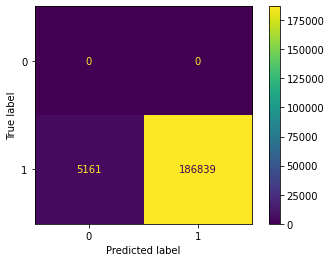

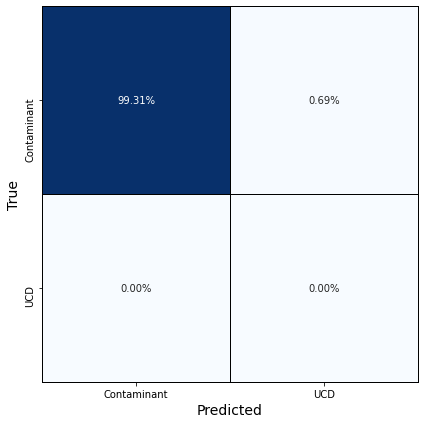

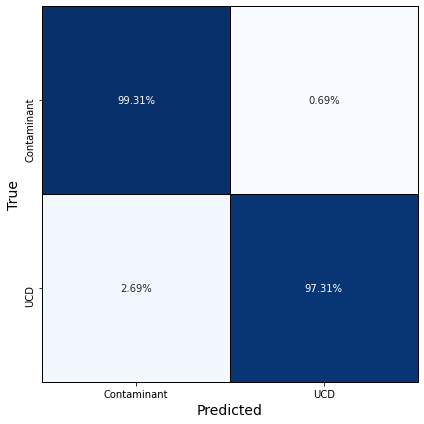

In [389]:
# combine bin 2

j3_oversamp_add = pd.concat([ucd_j3_overadd, contam_j3_overadd], axis = 0)

X_mc3a = ucd_j3_overadd.drop(columns='label')
y_mc3a = ucd_j3_overadd['label']

X_contam_mc3a = contam_j3_overadd.drop(columns='label')
y_contam_mc3a = contam_j3_overadd['label']

X_mc3a_all = j3_oversamp_add.drop(columns='label')
y_mc3a_all = j3_oversamp_add['label']

# finding the precision
y_pred_mc3a = RF_model2.predict(X_mc3a)
y_pred_contam_mc3a = RF_model2.predict(X_contam_mc3a)
y_pred_mc3a_all = RF_model2.predict(X_mc3a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc3a, y_pred_mc3a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc3a, y_pred_contam_mc3a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc3a_all, y_pred_mc3a_all)))

# classification report
print(classification_report(y_mc3a, y_pred_mc3a))
print(classification_report(y_contam_mc3a, y_pred_contam_mc3a, zero_division=0))
print(classification_report(y_mc3a_all, y_pred_mc3a_all))

# confusion matrix
print(confusion_matrix(y_mc3a, y_pred_mc3a))
print(confusion_matrix(y_contam_mc3a, y_pred_contam_mc3a))
print(confusion_matrix(y_mc3a_all, y_pred_mc3a_all))

plot_confusion_matrix(RF_model2, X_mc3a, y_mc3a)
plot_normalized_confusion_matrix(y_contam_mc3a, y_pred_contam_mc3a)
plot_normalized_confusion_matrix(y_mc3a_all, y_pred_mc3a_all)

In [390]:
j3score_adj = precision_score(y_mc3a_all, y_pred_mc3a_all)
j3f1_adj = f1_score(y_mc3a_all, y_pred_mc3a_all)

print(j3score_adj, j3f1_adj)

0.9943110458309385 0.9836012929446076


In [391]:
photometry_list = []
noise_list = []

for i in range(len(ucd_j4_add)):
    UCD_phot = ucd_j4_add.iloc[i,:8]
    UCD_unc = ucd_j4_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j4_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j4_overadd['label'] = 1

photometry_list = []
noise_list = []

for i in range(len(contam_j4_add)):
    contam_phot = contam_j4_add.iloc[i,:8]
    contam_unc = contam_j4_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j4_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j4_overadd['label'] = 0
contam_j4_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,21.309306,19.782652,19.143266,18.985425,17.706288,16.998957,16.803779,16.798674,0
1,21.305739,19.780576,19.140164,18.976948,17.703462,16.952859,16.848086,16.875565,0
2,21.308425,19.781971,19.138883,18.982333,17.705851,16.937032,16.830837,16.734064,0
3,21.306576,19.780855,19.141853,18.975847,17.699203,16.942280,16.770103,16.617392,0
4,21.312055,19.780917,19.142483,18.988775,17.706023,16.954840,16.796326,16.799096,0
...,...,...,...,...,...,...,...,...,...
221995,23.264822,22.277841,21.717052,21.366557,17.020172,16.251865,16.153720,16.061624,0
221996,23.272180,22.249225,21.714740,21.415658,17.007739,16.255275,16.138849,16.116457,0
221997,23.241306,22.280984,21.717471,21.494257,17.011319,16.243845,16.154990,16.115035,0
221998,23.218012,22.256585,21.716815,21.343966,17.023610,16.237060,16.134315,16.150456,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~1.0000 !


/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96    219000

    accuracy                           0.92    219000
   macro avg       0.50      0.46      0.48    219000
weighted avg       1.00      0.92      0.96    219000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222000

    accuracy                           1.00    222000
   macro avg       1.00      1.00      1.00    222000
weighted avg       1.00      1.00      1.00    222000

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    222000
           1       1.00      0.92      0.96    219000

    accuracy                           0.96    441000
   macro avg       0.97      0.96      0.96    441000
weighted avg       0.97      0.96      0.96    441000

[[     0      0]
 [ 16433 202567]]
[[222000]]
[[222000      0]
 [ 16433 2

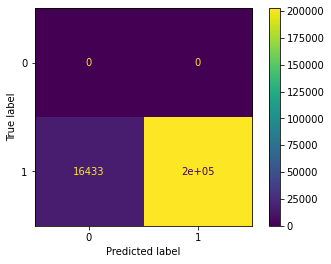

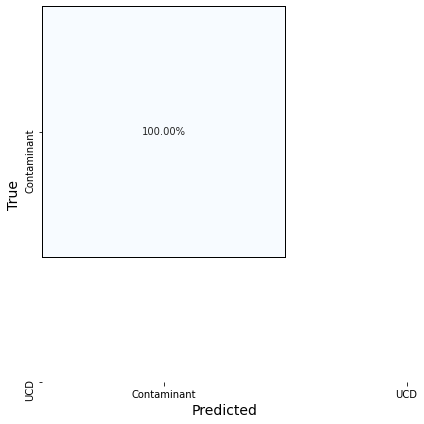

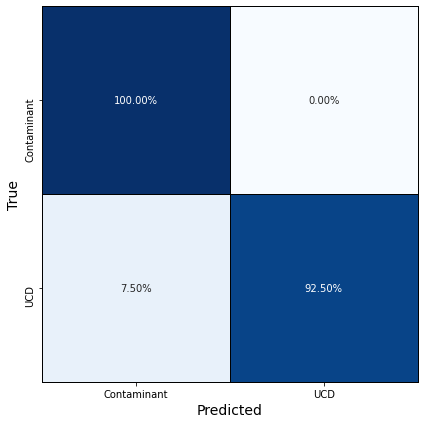

In [392]:
j4_oversamp_add = pd.concat([ucd_j4_overadd, contam_j4_overadd], axis = 0)

X_mc4a = ucd_j4_overadd.drop(columns='label')
y_mc4a = ucd_j4_overadd['label']

X_contam_mc4a = contam_j4_overadd.drop(columns='label')
y_contam_mc4a = contam_j4_overadd['label']

X_mc4a_all = j4_oversamp_add.drop(columns='label')
y_mc4a_all = j4_oversamp_add['label']

# finding the precision
y_pred_mc4a = RF_model2.predict(X_mc4a)
y_pred_contam_mc4a = RF_model2.predict(X_contam_mc4a)
y_pred_mc4a_all = RF_model2.predict(X_mc4a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc4a, y_pred_mc4a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc4a, y_pred_contam_mc4a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc4a_all, y_pred_mc4a_all)))

# classification report
print(classification_report(y_mc4a, y_pred_mc4a))
print(classification_report(y_contam_mc4a, y_pred_contam_mc4a, zero_division=0))
print(classification_report(y_mc4a_all, y_pred_mc4a_all))

# confusion matrix
print(confusion_matrix(y_mc4a, y_pred_mc4a))
print(confusion_matrix(y_contam_mc4a, y_pred_contam_mc4a))
print(confusion_matrix(y_mc4a_all, y_pred_mc4a_all))

plot_confusion_matrix(RF_model2, X_mc4a, y_mc4a)
plot_normalized_confusion_matrix(y_contam_mc4a, y_pred_contam_mc4a)
plot_normalized_confusion_matrix(y_mc4a_all, y_pred_mc4a_all)

In [393]:
j4score_adj = precision_score(y_mc4a_all, y_pred_mc4a_all)
j4f1_adj = f1_score(y_mc4a_all, y_pred_mc4a_all)

print(j4score_adj, j4f1_adj)

1.0 0.9610192448649917


In [394]:
photometry_list = []
noise_list = []

for i in range(len(ucd_j5_add)):
    UCD_phot = ucd_j5_add.iloc[i,:8]
    UCD_unc = ucd_j5_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j5_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j5_overadd['label'] = 1

photometry_list = []
noise_list = []

for i in range(len(contam_j5_add)):
    contam_phot = contam_j5_add.iloc[i,:8]
    contam_unc = contam_j5_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j5_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j5_overadd['label'] = 0
contam_j5_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,20.587887,20.010824,19.728647,19.666304,18.519554,17.869082,13.398728,12.969277,0
1,20.586347,20.011905,19.719644,19.668799,18.571471,17.884206,13.400601,12.967087,0
2,20.589208,20.012449,19.732168,19.658361,18.552037,17.879599,13.399910,12.971926,0
3,20.584430,20.012176,19.726814,19.657777,18.512396,17.658164,13.415029,12.967811,0
4,20.583227,20.010352,19.725962,19.650830,18.508052,17.785668,13.398935,12.962786,0
...,...,...,...,...,...,...,...,...,...
201995,20.416667,19.839722,19.560470,19.478245,18.349948,17.659750,15.634251,15.739756,0
201996,20.417348,19.836611,19.553231,19.499465,18.324933,17.688570,15.649673,15.769886,0
201997,20.415214,19.837414,19.557706,19.467282,18.302833,17.613482,15.641320,15.714771,0
201998,20.420559,19.842720,19.557448,19.480708,18.330013,17.687748,15.654201,15.726986,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~1.0000 !


/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91    191000

    accuracy                           0.84    191000
   macro avg       0.50      0.42      0.46    191000
weighted avg       1.00      0.84      0.91    191000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202000

    accuracy                           1.00    202000
   macro avg       1.00      1.00      1.00    202000
weighted avg       1.00      1.00      1.00    202000

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    202000
           1       1.00      0.84      0.91    191000

    accuracy                           0.92    393000
   macro avg       0.94      0.92      0.92    393000
weighted avg       0.93      0.92      0.92    393000

[[     0      0]
 [ 30082 160918]]
[[202000]]
[[202000      0]
 [ 30082 1

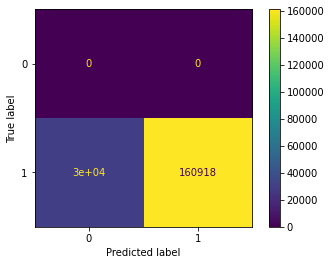

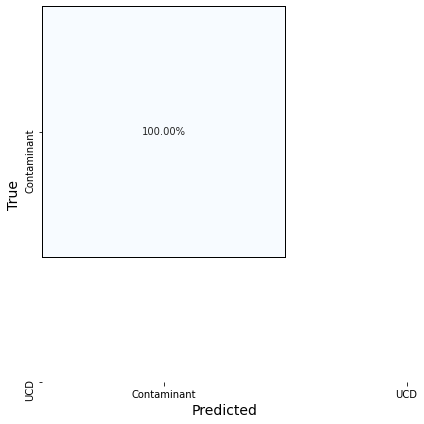

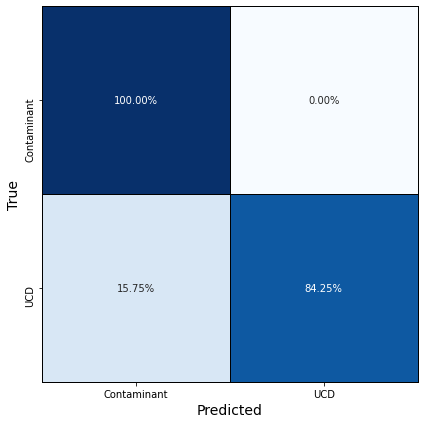

In [395]:
j5_oversamp_add = pd.concat([ucd_j5_overadd, contam_j5_overadd], axis = 0)

X_mc5a = ucd_j5_overadd.drop(columns='label')
y_mc5a = ucd_j5_overadd['label']

X_contam_mc5a = contam_j5_overadd.drop(columns='label')
y_contam_mc5a = contam_j5_overadd['label']

X_mc5a_all = j5_oversamp_add.drop(columns='label')
y_mc5a_all = j5_oversamp_add['label']

# finding the precision
y_pred_mc5a = RF_model2.predict(X_mc5a)
y_pred_contam_mc5a = RF_model2.predict(X_contam_mc5a)
y_pred_mc5a_all = RF_model2.predict(X_mc5a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc5a, y_pred_mc5a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc5a, y_pred_contam_mc5a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc5a_all, y_pred_mc5a_all)))

# classification report
print(classification_report(y_mc5a, y_pred_mc5a))
print(classification_report(y_contam_mc5a, y_pred_contam_mc5a, zero_division=0))
print(classification_report(y_mc5a_all, y_pred_mc5a_all))

# confusion matrix
print(confusion_matrix(y_mc5a, y_pred_mc5a))
print(confusion_matrix(y_contam_mc5a, y_pred_contam_mc5a))
print(confusion_matrix(y_mc5a_all, y_pred_mc5a_all))

plot_confusion_matrix(RF_model2, X_mc5a, y_mc5a)
plot_normalized_confusion_matrix(y_contam_mc5a, y_pred_contam_mc5a)
plot_normalized_confusion_matrix(y_mc5a_all, y_pred_mc5a_all)

In [396]:
j5score_adj = precision_score(y_mc5a_all, y_pred_mc5a_all)
j5f1_adj = f1_score(y_mc5a_all, y_pred_mc5a_all)

print(j5score_adj, j5f1_adj)

1.0 0.914519859740053


In [397]:
photometry_list = []
noise_list = []

for i in range(len(ucd_j6_add)):
    UCD_phot = ucd_j6_add.iloc[i,:8]
    UCD_unc = ucd_j6_add.iloc[i,8:]
    for j in range(1000):
        n_UCD_phot, n_UCD_unc = addNoise(UCD_phot, UCD_unc, scale = 0.5)
        photometry_list.append(n_UCD_phot)
        noise_list.append(n_UCD_unc)

ucd_j6_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
ucd_j6_overadd['label'] = 1

photometry_list = []
noise_list = []

for i in range(len(contam_j6_add)):
    contam_phot = contam_j6_add.iloc[i,:8]
    contam_unc = contam_j6_add.iloc[i,8:]
    for j in range(1000):
        n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
        photometry_list.append(n_contam_phot)
        noise_list.append(n_contam_unc)

contam_j6_overadd = pd.DataFrame(photometry_list, columns = ['DES_r', 'DES_i', 'DES_z','DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
contam_j6_overadd['label'] = 0
contam_j6_overadd

,DES_r,DES_i,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,label
0,23.462691,22.398840,21.941334,21.553381,19.484740,17.917996,16.563073,16.535478,0
1,23.455355,22.353254,21.893792,21.557766,19.539790,17.811565,16.532335,16.646938,0
2,23.423042,22.421449,21.940849,21.467666,19.458624,17.746267,16.539908,16.536056,0
3,23.444462,22.394941,21.943548,21.397273,19.598577,17.809748,16.544110,16.542879,0
4,23.479288,22.383645,21.964603,21.473878,19.497010,17.693165,16.554584,16.583741,0
...,...,...,...,...,...,...,...,...,...
105995,20.198592,20.027913,19.891162,19.982503,19.122626,17.580776,16.800129,15.662710,0
105996,20.200559,20.029360,19.888317,19.952658,19.111971,17.637561,16.822199,15.689303,0
105997,20.201663,20.032311,19.892821,19.992897,19.144868,17.577004,16.808383,15.721374,0
105998,20.200383,20.030503,19.892831,19.981750,19.040827,17.672369,16.854308,15.669960,0


The raw features produce a model with precision ~1.0000 !
The raw features produce a model with precision ~0.0000 !
The raw features produce a model with precision ~1.0000 !
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93     70000

    accuracy                           0.86     70000
   macro avg       0.50      0.43      0.46     70000
weighted avg       1.00      0.86      0.93     70000



/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106000

    accuracy                           1.00    106000
   macro avg       1.00      1.00      1.00    106000
weighted avg       1.00      1.00      1.00    106000

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    106000
           1       1.00      0.86      0.93     70000

    accuracy                           0.95    176000
   macro avg       0.96      0.93      0.94    176000
weighted avg       0.95      0.95      0.94    176000

[[    0     0]
 [ 9670 60330]]
[[106000]]
[[106000      0]
 [  9670  60330]]


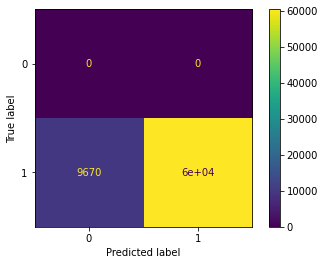

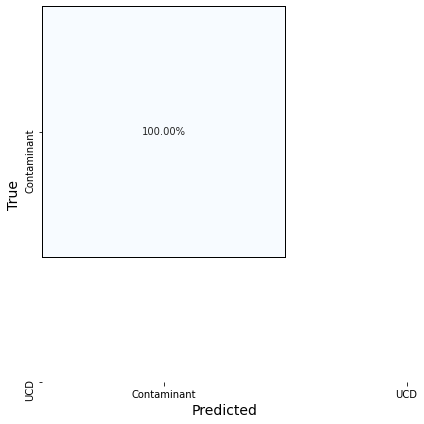

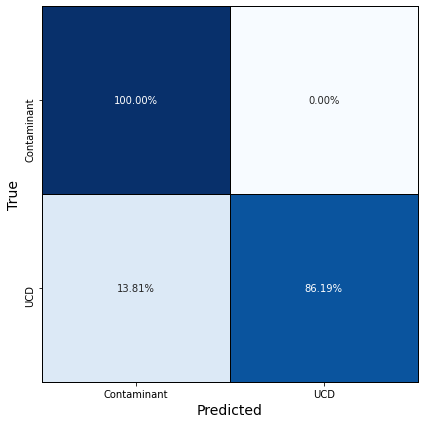

In [398]:
j6_oversamp_add = pd.concat([ucd_j6_overadd, contam_j6_overadd], axis = 0)

X_mc6a = ucd_j6_overadd.drop(columns='label')
y_mc6a = ucd_j6_overadd['label']

X_contam_mc6a = contam_j6_overadd.drop(columns='label')
y_contam_mc6a = contam_j6_overadd['label']

X_mc6a_all = j6_oversamp_add.drop(columns='label')
y_mc6a_all = j6_oversamp_add['label']

# finding the precision
y_pred_mc6a = RF_model2.predict(X_mc6a)
y_pred_contam_mc6a = RF_model2.predict(X_contam_mc6a)
y_pred_mc6a_all = RF_model2.predict(X_mc6a_all)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc6a, y_pred_mc6a)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_contam_mc6a, y_pred_contam_mc6a, zero_division=0)))
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_mc6a_all, y_pred_mc6a_all)))

# classification report
print(classification_report(y_mc6a, y_pred_mc6a))
print(classification_report(y_contam_mc6a, y_pred_contam_mc6a, zero_division=0))
print(classification_report(y_mc6a_all, y_pred_mc6a_all))

# confusion matrix
print(confusion_matrix(y_mc6a, y_pred_mc6a))
print(confusion_matrix(y_contam_mc6a, y_pred_contam_mc6a))
print(confusion_matrix(y_mc6a_all, y_pred_mc6a_all))

plot_confusion_matrix(RF_model2, X_mc6a, y_mc6a)
plot_normalized_confusion_matrix(y_contam_mc6a, y_pred_contam_mc6a)
plot_normalized_confusion_matrix(y_mc6a_all, y_pred_mc6a_all)

In [399]:
j6score_adj = precision_score(y_mc6a_all, y_pred_mc6a_all)
j6f1_adj = f1_score(y_mc6a_all, y_pred_mc6a_all)

print(j6score_adj, j6f1_adj)

1.0 0.9258037289956265


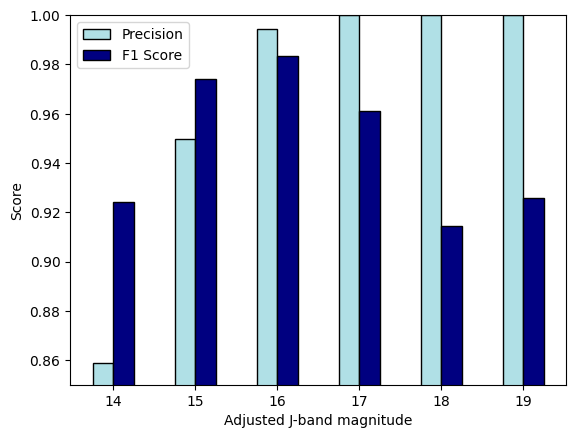

In [551]:
# plotting the accuracy and f1 score of each model

models = ['14', '15', '16', '17', '18', '19']
accuracies = [j1score_adj, j2score_adj, j3score_adj, j4score_adj, j5score_adj, j6score_adj]
f1s = [j1f1_adj, j2f1_adj, j3f1_adj, j4f1_adj, j5f1_adj, j6f1_adj]
  
n = 6
r = np.arange(n)
width = 0.25
    
plt.bar(r, accuracies, color = 'powderblue',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width, f1s, color = 'navy',
        width = width, edgecolor = 'black',
        label= 'F1 Score')
  
plt.xlabel("Adjusted J-band magnitude")
plt.ylabel("Score")
# plt.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, models)
plt.ylim(0.85, 1)
plt.legend()
plt.savefig('jbandaccuracies_adj')
plt.show()

In [406]:
ucs_spt = ultracoolsheet[['name', 'ra_j2000_formula', 'dec_j2000_formula', 'pmra_formula', 'z_P1', 'y_P1', 'zerr_P1', 'yerr_P1', 'J_2MASS', 'Ks_2MASS', \
                          'Jerr_2MASS', 'Kserr_2MASS', 'W1', 'W2', 'W1err', 'W2err', 'multiple_unresolved_in_this_table', 'sptnumabs_formula' \
                        ]].copy()
ucs_spt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               2940 non-null   object 
 1   ra_j2000_formula                   2940 non-null   float64
 2   dec_j2000_formula                  2940 non-null   float64
 3   pmra_formula                       2815 non-null   float64
 4   z_P1                               2059 non-null   float64
 5   y_P1                               2177 non-null   float64
 6   zerr_P1                            2059 non-null   float64
 7   yerr_P1                            2177 non-null   float64
 8   J_2MASS                            2274 non-null   float64
 9   Ks_2MASS                           2282 non-null   float64
 10  Jerr_2MASS                         2241 non-null   float64
 11  Kserr_2MASS                        2126 non-null   float

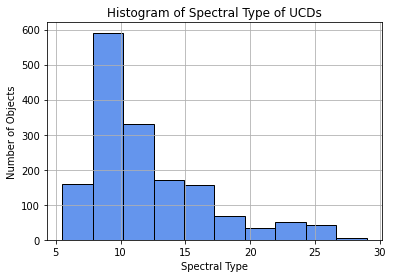

In [407]:
ucs_spt = ucs_spt.dropna()
plt.hist(ucs_spt['sptnumabs_formula'], color = 'cornflowerblue', edgecolor = 'k')
plt.xlabel('Spectral Type')
plt.ylabel('Number of Objects')
plt.title('Histogram of Spectral Type of UCDs')
plt.grid()

In [408]:
# do photometric correction of this sample

ucs_spt['z_y'] = ucs_spt['z_P1'] - ucs_spt['y_P1']
ucs_spt['J_K'] = ucs_spt['J_2MASS'] - ucs_spt['Ks_2MASS']
ucs_spt['w1_w2'] = ucs_spt['W1'] - ucs_spt['W2']

ucs_spt['DES_z'] = ucs_spt['z_P1'] - (az_final * ucs_spt['z_y']) - bz_final
ucs_spt['DES_y'] = ucs_spt['y_P1'] - (ay_final * ucs_spt['z_y']) - by_final
ucs_spt['VISTA_J'] = ucs_spt['J_2MASS'] - (aj_final * ucs_spt['J_K']) - bj_final
ucs_spt['VISTA_Ks'] = ucs_spt['Ks_2MASS'] - (ak_final * ucs_spt['J_K']) - bk_final
ucs_spt['CAT_W1'] = ucs_spt['W1'] - (aw1_final * ucs_spt['w1_w2']) - bw1_final
ucs_spt['CAT_W2'] = ucs_spt['W2'] - (aw2_final * ucs_spt['w1_w2']) - bw2_final
ucs_spt


,name,ra_j2000_formula,dec_j2000_formula,pmra_formula,z_P1,y_P1,zerr_P1,yerr_P1,J_2MASS,Ks_2MASS,...,sptnumabs_formula,z_y,J_K,w1_w2,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2
2,SDSS J000112.18+153535.5,0.3007,15.5932,143.00,18.85,17.81,0.02,0.01,15.522,13.710,...,13.7,1.04,1.812,0.426,18.276015,17.717456,15.427554,13.776013,12.972945,12.571772
3,WISEA J000131.93-084126.9,0.3821,-8.6900,339.90,18.57,17.57,0.01,0.01,15.712,14.698,...,11.0,1.00,1.014,0.351,18.017447,17.480256,15.619529,14.732613,14.352065,14.024364
4,SDSS J000250.98+245413.8,0.7124,24.9039,22.00,20.30,19.31,0.04,0.03,17.165,15.656,...,15.5,0.99,1.509,0.245,19.752805,19.220955,17.071304,15.710090,14.827235,14.603375
5,2MASSI J0003422-282241,0.9263,-28.3781,286.70,15.43,14.67,0.00,0.00,13.068,11.972,...,7.5,0.76,1.096,0.186,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267
9,2MASS J00044144-2058298,1.1728,-20.9750,758.23,14.94,14.06,0.00,0.01,12.404,11.396,...,8.0,0.88,1.008,0.311,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,DENIS J2354599-185221,358.7497,-18.8727,-181.50,17.09,16.09,0.01,0.01,14.178,13.039,...,12.0,1.00,1.139,0.292,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257
2931,2MASSI J2356547-155310,359.2282,-15.8868,-443.40,20.07,18.38,0.03,0.02,15.824,15.771,...,25.5,1.69,0.053,1.800,19.147757,18.241964,15.733908,15.767799,15.512751,13.765562
2935,SDSS J235841.98+000622.0,359.6749,0.1060,128.00,20.41,19.54,0.07,0.05,17.172,15.622,...,11.5,0.87,1.550,0.262,19.927098,19.459354,17.078203,15.677703,15.447207,15.206694
2937,PSO J359.8867-01.8651,359.8868,-1.8647,-6.00,20.32,19.10,0.05,0.05,17.241,16.090,...,21.0,1.22,1.151,0.711,19.649575,18.994858,17.148190,16.130003,15.270490,14.590122


In [409]:
# create an RF-ready sample

ucs_spt_rf = ucs_spt[['DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2', 'zerr_P1', 'yerr_P1', 'Jerr_2MASS', 'Kserr_2MASS', 'W1err', 'W2err', \
                      'sptnumabs_formula']].copy()

ucs_spt_rf = ucs_spt_rf.round({'sptnumabs_formula':0})
ucs_spt_rf

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,zerr_P1,yerr_P1,Jerr_2MASS,Kserr_2MASS,W1err,W2err,sptnumabs_formula
2,18.276015,17.717456,15.427554,13.776013,12.972945,12.571772,0.02,0.01,0.062,0.044,0.024,0.024,14.0
3,18.017447,17.480256,15.619529,14.732613,14.352065,14.024364,0.01,0.01,0.050,0.090,0.031,0.047,11.0
4,19.752805,19.220955,17.071304,15.710090,14.827235,14.603375,0.04,0.03,0.224,0.217,0.032,0.058,16.0
5,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,0.00,0.00,0.024,0.025,0.024,0.023,8.0
9,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,0.00,0.01,0.022,0.023,0.023,0.020,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257,0.01,0.01,0.029,0.030,0.023,0.023,12.0
2931,19.147757,18.241964,15.733908,15.767799,15.512751,13.765562,0.03,0.02,0.057,0.183,0.090,0.036,26.0
2935,19.927098,19.459354,17.078203,15.677703,15.447207,15.206694,0.07,0.05,0.193,0.194,0.044,0.094,12.0
2937,19.649575,18.994858,17.148190,16.130003,15.270490,14.590122,0.05,0.05,0.197,0.270,0.040,0.058,21.0


[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


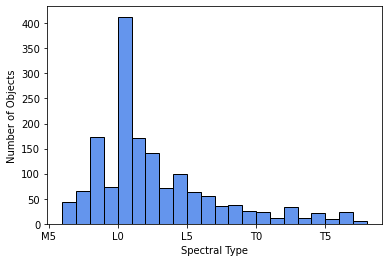

In [417]:
bins = np.arange(6, 29, 1)

plt.hist(ucs_spt_rf['sptnumabs_formula'], bins = bins, color = 'cornflowerblue', edgecolor = 'k')
plt.xlabel('Spectral Type')
plt.ylabel('Number of Objects')
# plt.title('Histogram of Spectral Type of UCDs')

ticklocs = [5, 10, 15, 20, 25]
ticklabels = ['M5', 'L0', 'L5', 'T0', 'T5']
plt.xticks(ticklocs, ticklabels)

plt.savefig('spectraltypehist')

print(bins)

In [418]:
ucs_spt_phot = ucs_spt_rf[['DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2', 'sptnumabs_formula']].copy()
ucs_spt_phot = ucs_spt_phot.rename(columns = {'sptnumabs_formula': 'spt_type'})
ucs_spt_phot

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type
2,18.276015,17.717456,15.427554,13.776013,12.972945,12.571772,14.0
3,18.017447,17.480256,15.619529,14.732613,14.352065,14.024364,11.0
4,19.752805,19.220955,17.071304,15.710090,14.827235,14.603375,16.0
5,15.006034,14.597053,12.975326,12.009839,11.713329,11.547267,8.0
9,14.451741,13.978654,12.311544,11.430377,11.064129,10.775614,8.0
...,...,...,...,...,...,...,...
2928,16.537447,16.000256,14.085220,13.078531,12.581159,12.311257,12.0
2931,19.147757,18.241964,15.733908,15.767799,15.512751,13.765562,26.0
2935,19.927098,19.459354,17.078203,15.677703,15.447207,15.206694,12.0
2937,19.649575,18.994858,17.148190,16.130003,15.270490,14.590122,21.0


In [430]:
len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 25])

10

In [431]:
# oversampling to get 500 of each spectral type

photometry_list = []
noise_list = []
spt_list = []


for i in bins:
    typeselect = ucs_spt_rf.loc[(ucs_spt_rf['sptnumabs_formula'] == i)]
    for j in range(len(typeselect)):
        type_phot = typeselect.iloc[j,:6]
        type_unc = typeselect.iloc[j,6:12]
        for k in range(100):
            n_type_phot, n_type_unc = addNoise(type_phot, type_unc, scale = 0.5)
            photometry_list.append(n_type_phot)
            noise_list.append(n_type_unc)
            spt_list.append(i)
            
spt_oversample = pd.DataFrame(photometry_list, columns = ['DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2'])
spt_oversample['spt_type'] = spt_list

# for i in range(len(contam_j9)):
#     contam_phot = contam_j9.iloc[i,:8]
#     contam_unc = contam_j9.iloc[i,8:]
#     for j in range(1000):
#         n_contam_phot, n_contam_unc = addNoise(contam_phot, contam_unc, scale = 0.5)
#         photometry_list.append(n_contam_phot)
#         noise_list.append(n_contam_unc)

# contam_j9_oversamp['label'] = 0
# contam_j9_oversamp

spt_oversample

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type
0,13.598549,13.301750,11.902010,11.127414,10.866889,10.687982,6
1,13.598549,13.301750,11.869390,11.122159,10.885072,10.697650,6
2,13.598549,13.301750,11.866495,11.138386,10.888615,10.684526,6
3,13.598549,13.301750,11.861516,11.117494,10.888659,10.714509,6
4,13.598549,13.301750,11.856336,11.105102,10.890330,10.718481,6
...,...,...,...,...,...,...,...
160795,18.812602,17.842897,15.220928,15.338227,14.951774,12.212291,28
160796,18.833273,17.827497,15.238873,15.278302,14.911993,12.219826,28
160797,18.831594,17.852942,15.246717,15.199023,14.926537,12.207206,28
160798,18.828111,17.841894,15.272770,15.246551,14.928320,12.203395,28


In [432]:
spt_oversample.loc[spt_oversample['spt_type']==25]

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type
156900,19.361322,18.475368,16.010893,15.781303,15.316644,13.780912,25
156901,19.382464,18.487991,16.103819,15.693087,15.287928,13.759868,25
156902,19.394341,18.495646,16.028786,15.732119,15.361896,13.792925,25
156903,19.409471,18.467048,16.097951,15.827282,15.318276,13.824773,25
156904,19.374578,18.489993,16.129204,15.946105,15.302842,13.787620,25
...,...,...,...,...,...,...,...
157895,19.300807,18.395396,16.282143,16.224578,15.236873,13.813033,25
157896,19.282052,18.394094,16.156641,16.168968,15.234114,13.851551,25
157897,19.253899,18.371791,16.174395,16.108885,15.208506,13.843920,25
157898,19.271225,18.386665,16.135417,16.376063,15.229431,13.829937,25


In [433]:
# names = [type6, type7, type8]

# for i in range(len(names)):
#     names[i] = spt_oversample.spt_type[spt_oversample.spt_type.eq(i+6)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == (i+6)])).index
#     print(names[i])
    

type6 = spt_oversample.spt_type[spt_oversample.spt_type.eq(6)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 6])).index
type7 = spt_oversample.spt_type[spt_oversample.spt_type.eq(7)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 7])).index 
type8 = spt_oversample.spt_type[spt_oversample.spt_type.eq(8)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 8])).index 
type9 = spt_oversample.spt_type[spt_oversample.spt_type.eq(9)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 9])).index
type10 = spt_oversample.spt_type[spt_oversample.spt_type.eq(10)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 10])).index
type11 = spt_oversample.spt_type[spt_oversample.spt_type.eq(11)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 11])).index
type12 = spt_oversample.spt_type[spt_oversample.spt_type.eq(12)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 12])).index
type13 = spt_oversample.spt_type[spt_oversample.spt_type.eq(13)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 13])).index
type14 = spt_oversample.spt_type[spt_oversample.spt_type.eq(14)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 14])).index
type15 = spt_oversample.spt_type[spt_oversample.spt_type.eq(15)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 15])).index
type16 = spt_oversample.spt_type[spt_oversample.spt_type.eq(16)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 16])).index
type17 = spt_oversample.spt_type[spt_oversample.spt_type.eq(17)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 17])).index
type18 = spt_oversample.spt_type[spt_oversample.spt_type.eq(18)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 18])).index
type19 = spt_oversample.spt_type[spt_oversample.spt_type.eq(19)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 19])).index
type20 = spt_oversample.spt_type[spt_oversample.spt_type.eq(20)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 20])).index
type21 = spt_oversample.spt_type[spt_oversample.spt_type.eq(21)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 21])).index
type22 = spt_oversample.spt_type[spt_oversample.spt_type.eq(22)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 22])).index
type23 = spt_oversample.spt_type[spt_oversample.spt_type.eq(23)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 23])).index
type24 = spt_oversample.spt_type[spt_oversample.spt_type.eq(24)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 24])).index
type25 = spt_oversample.spt_type[spt_oversample.spt_type.eq(25)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 25])).index
type26 = spt_oversample.spt_type[spt_oversample.spt_type.eq(26)].sample(1000 - len(ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 26])).index

oversampled_spt = spt_oversample.loc[type6.union(type7).union(type8).union(type9).union(type10).union(type11).union(type12).union(type13).union(type14).union(type15).union(type16).union(type17).union(type18).union(type19).union(type20).union(type21).union(type22).union(type23).union(type24).union(type25).union(type26)]
oversampled_spt = pd.concat([oversampled_spt, \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 6], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 7], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 8], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 9], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 10], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 11], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 12], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 13], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 14], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 15], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 16], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 17], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 18], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 19], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 20], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 21], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 22], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 23], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 24], ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 25], \
                             ucs_spt_phot.loc[ucs_spt_phot['spt_type'] == 26]], axis = 0)
oversampled_spt


,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type
8,13.598549,13.301750,11.861887,11.132310,10.894931,10.686270,6.0
12,13.598549,13.301750,11.877482,11.132370,10.910452,10.706267,6.0
20,13.598549,13.301750,11.867703,11.115892,10.892616,10.693920,6.0
24,13.598549,13.301750,11.862760,11.121459,10.895103,10.700081,6.0
38,13.598549,13.301750,11.869851,11.123938,10.896781,10.692929,6.0
...,...,...,...,...,...,...,...
2440,19.115958,18.108666,15.717415,15.560629,14.792336,13.403692,26.0
2446,19.675958,18.668666,16.060339,15.486746,15.653678,13.861425,26.0
2490,19.577390,18.591466,16.271202,16.806220,16.038083,13.881408,26.0
2504,17.561335,16.708963,14.249420,14.094551,13.580149,12.076888,26.0


In [434]:
oversampled_spt.loc[oversampled_spt['spt_type'] == 6]

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type
8,13.598549,13.301750,11.861887,11.132310,10.894931,10.686270,6.0
12,13.598549,13.301750,11.877482,11.132370,10.910452,10.706267,6.0
20,13.598549,13.301750,11.867703,11.115892,10.892616,10.693920,6.0
24,13.598549,13.301750,11.862760,11.121459,10.895103,10.700081,6.0
38,13.598549,13.301750,11.869851,11.123938,10.896781,10.692929,6.0
...,...,...,...,...,...,...,...
2695,14.228897,13.862652,12.268596,11.407550,11.112247,10.896225,6.0
2747,14.309264,14.023150,12.480242,11.482177,10.951674,10.383963,6.0
2766,13.483907,13.192450,11.622648,10.781724,10.525273,10.324924,6.0
2847,15.407833,15.100350,13.539767,12.744835,12.475282,12.280812,6.0


[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27]


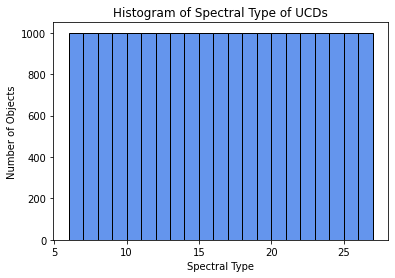

In [435]:
bins = np.arange(6, 28, 1)

plt.hist(oversampled_spt['spt_type'], bins = bins, color = 'cornflowerblue', edgecolor = 'k')
plt.xlabel('Spectral Type')
plt.ylabel('Number of Objects')
plt.title('Histogram of Spectral Type of UCDs')

print(bins)

In [437]:
sptcolor = oversampled_spt.copy()

for i in range(len(oversampled_spt.columns) - 1):
    for j in range(0, 6): 
        if i != j and i < j:
            sptcolor[sptcolor.columns[i] + '_' + sptcolor.columns[j]] = sptcolor.iloc[:, i] - sptcolor.iloc[:, j]


sptcolor

,DES_z,DES_y,VISTA_J,VISTA_Ks,CAT_W1,CAT_W2,spt_type,DES_z_DES_y,DES_z_VISTA_J,DES_z_VISTA_Ks,...,DES_y_VISTA_J,DES_y_VISTA_Ks,DES_y_CAT_W1,DES_y_CAT_W2,VISTA_J_VISTA_Ks,VISTA_J_CAT_W1,VISTA_J_CAT_W2,VISTA_Ks_CAT_W1,VISTA_Ks_CAT_W2,CAT_W1_CAT_W2
8,13.598549,13.301750,11.861887,11.132310,10.894931,10.686270,6.0,0.296799,1.736661,2.466238,...,1.439863,2.169440,2.406819,2.615480,0.729577,0.966956,1.175617,0.237379,0.446040,0.208661
12,13.598549,13.301750,11.877482,11.132370,10.910452,10.706267,6.0,0.296799,1.721067,2.466179,...,1.424268,2.169380,2.391298,2.595483,0.745112,0.967030,1.171215,0.221918,0.426103,0.204185
20,13.598549,13.301750,11.867703,11.115892,10.892616,10.693920,6.0,0.296799,1.730846,2.482657,...,1.434047,2.185858,2.409134,2.607830,0.751811,0.975087,1.173783,0.223276,0.421971,0.198696
24,13.598549,13.301750,11.862760,11.121459,10.895103,10.700081,6.0,0.296799,1.735789,2.477090,...,1.438990,2.180291,2.406647,2.601669,0.741301,0.967657,1.162679,0.226356,0.421378,0.195022
38,13.598549,13.301750,11.869851,11.123938,10.896781,10.692929,6.0,0.296799,1.728698,2.474610,...,1.431899,2.177812,2.404969,2.608821,0.745913,0.973070,1.176922,0.227157,0.431010,0.203852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,19.115958,18.108666,15.717415,15.560629,14.792336,13.403692,26.0,1.007292,3.398543,3.555329,...,2.391251,2.548037,3.316331,4.704974,0.156786,0.925080,2.313723,0.768294,2.156937,1.388643
2446,19.675958,18.668666,16.060339,15.486746,15.653678,13.861425,26.0,1.007292,3.615620,4.189212,...,2.608328,3.181920,3.014989,4.807241,0.573593,0.406661,2.198913,-0.166932,1.625320,1.792252
2490,19.577390,18.591466,16.271202,16.806220,16.038083,13.881408,26.0,0.985924,3.306187,2.771170,...,2.320263,1.785246,2.553382,4.710058,-0.535018,0.233119,2.389794,0.768136,2.924812,2.156676
2504,17.561335,16.708963,14.249420,14.094551,13.580149,12.076888,26.0,0.852372,3.311915,3.466784,...,2.459542,2.614412,3.128814,4.632074,0.154869,0.669271,2.172532,0.514402,2.017662,1.503260


In [438]:
sptcolor.columns

Index(['DES_z', 'DES_y', 'VISTA_J', 'VISTA_Ks', 'CAT_W1', 'CAT_W2', 'spt_type',
       'DES_z_DES_y', 'DES_z_VISTA_J', 'DES_z_VISTA_Ks', 'DES_z_CAT_W1',
       'DES_z_CAT_W2', 'DES_y_VISTA_J', 'DES_y_VISTA_Ks', 'DES_y_CAT_W1',
       'DES_y_CAT_W2', 'VISTA_J_VISTA_Ks', 'VISTA_J_CAT_W1', 'VISTA_J_CAT_W2',
       'VISTA_Ks_CAT_W1', 'VISTA_Ks_CAT_W2', 'CAT_W1_CAT_W2'],
      dtype='object')

In [440]:
X = sptcolor.drop(columns='spt_type')
y = sptcolor['spt_type']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=RSEED, shuffle=True)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 50, random_state=RSEED)
regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [441]:
y_pred = regressor.predict(x_test)

In [442]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) 

0.9899701970954231

In [444]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  0.28014857142857136
MSE:  0.3607037714285714


In [464]:
regressordf = y_test.to_frame()
regressordf

,spt_type
19444,8.0
155569,24.0
109526,13.0
157559,25.0
143472,18.0
...,...
152601,22.0
137486,17.0
32471,9.0
140269,17.0


In [466]:
regressordf['pred_type'] = y_pred.tolist()
regressordf['type_diff'] = regressordf['spt_type'] - regressordf['pred_type']
regressordf

,spt_type,pred_type,type_diff
19444,8.0,8.04,-0.04
155569,24.0,23.96,0.04
109526,13.0,12.80,0.20
157559,25.0,25.00,0.00
143472,18.0,18.36,-0.36
...,...,...,...
152601,22.0,22.64,-0.64
137486,17.0,16.24,0.76
32471,9.0,8.82,0.18
140269,17.0,16.46,0.54


In [473]:
# split dataframe into spt type bins

m6df = regressordf.loc[regressordf['spt_type'] == 6]
m7df = regressordf.loc[regressordf['spt_type'] == 7]
m8df = regressordf.loc[regressordf['spt_type'] == 8]
m9df = regressordf.loc[regressordf['spt_type'] == 9]
l0df = regressordf.loc[regressordf['spt_type'] == 10]
l1df = regressordf.loc[regressordf['spt_type'] == 11]
l2df = regressordf.loc[regressordf['spt_type'] == 12]
l3df = regressordf.loc[regressordf['spt_type'] == 13]
l4df = regressordf.loc[regressordf['spt_type'] == 14]
l5df = regressordf.loc[regressordf['spt_type'] == 15]
l6df = regressordf.loc[regressordf['spt_type'] == 16]
l7df = regressordf.loc[regressordf['spt_type'] == 17]
l8df = regressordf.loc[regressordf['spt_type'] == 18]
l9df = regressordf.loc[regressordf['spt_type'] == 19]
t0df = regressordf.loc[regressordf['spt_type'] == 20]
t1df = regressordf.loc[regressordf['spt_type'] == 21]
t2df = regressordf.loc[regressordf['spt_type'] == 22]
t3df = regressordf.loc[regressordf['spt_type'] == 23]
t4df = regressordf.loc[regressordf['spt_type'] == 24]
t5df = regressordf.loc[regressordf['spt_type'] == 25]
t6df = regressordf.loc[regressordf['spt_type'] == 26]

# average of predicted spt types

mu_m6 = m6df['type_diff'].to_numpy().mean()
mu_m7 = m7df['type_diff'].to_numpy().mean()
mu_m8 = m8df['type_diff'].to_numpy().mean()
mu_m9 = m9df['type_diff'].to_numpy().mean()
mu_l0 = l0df['type_diff'].to_numpy().mean()
mu_l1 = l1df['type_diff'].to_numpy().mean()
mu_l2 = l2df['type_diff'].to_numpy().mean()
mu_l3 = l3df['type_diff'].to_numpy().mean()
mu_l4 = l4df['type_diff'].to_numpy().mean()
mu_l5 = l5df['type_diff'].to_numpy().mean()
mu_l6 = l6df['type_diff'].to_numpy().mean()
mu_l7 = l7df['type_diff'].to_numpy().mean()
mu_l8 = l8df['type_diff'].to_numpy().mean()
mu_l9 = l9df['type_diff'].to_numpy().mean()
mu_t0 = t0df['type_diff'].to_numpy().mean()
mu_t1 = t1df['type_diff'].to_numpy().mean()
mu_t2 = t2df['type_diff'].to_numpy().mean()
mu_t3 = t3df['type_diff'].to_numpy().mean()
mu_t4 = t4df['type_diff'].to_numpy().mean()
mu_t5 = t5df['type_diff'].to_numpy().mean()
mu_t6 = t6df['type_diff'].to_numpy().mean()

# take stdev of predicted types

m6_stdev = m6df['type_diff'].to_numpy().std()
m7_stdev = m7df['type_diff'].to_numpy().std()
m8_stdev = m8df['type_diff'].to_numpy().std()
m9_stdev = m9df['type_diff'].to_numpy().std()
l0_stdev = l0df['type_diff'].to_numpy().std()
l1_stdev = l1df['type_diff'].to_numpy().std()
l2_stdev = l2df['type_diff'].to_numpy().std()
l3_stdev = l3df['type_diff'].to_numpy().std()
l4_stdev = l4df['type_diff'].to_numpy().std()
l5_stdev = l5df['type_diff'].to_numpy().std()
l6_stdev = l6df['type_diff'].to_numpy().std()
l7_stdev = l7df['type_diff'].to_numpy().std()
l8_stdev = l8df['type_diff'].to_numpy().std()
l9_stdev = l9df['type_diff'].to_numpy().std()
t0_stdev = t0df['type_diff'].to_numpy().std()
t1_stdev = t1df['type_diff'].to_numpy().std()
t2_stdev = t2df['type_diff'].to_numpy().std()
t3_stdev = t3df['type_diff'].to_numpy().std()
t4_stdev = t4df['type_diff'].to_numpy().std()
t5_stdev = t5df['type_diff'].to_numpy().std()
t6_stdev = t6df['type_diff'].to_numpy().std()


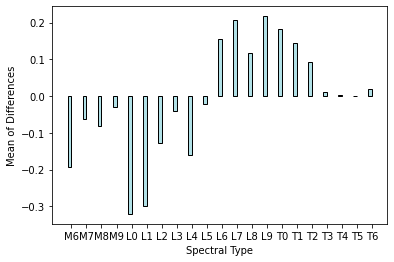

In [479]:
# plot 

sptmeans = [mu_m6, mu_m7, mu_m8, mu_m9, mu_l0, mu_l1, mu_l2, mu_l3, mu_l4, mu_l5, mu_l6, mu_l7, mu_l8, mu_l9, mu_t0, \
            mu_t1, mu_t2, mu_t3, mu_t4, mu_t5, mu_t6]
sptstdevs = [m6_stdev, m7_stdev, m8_stdev, m9_stdev, l0_stdev, l1_stdev, l2_stdev, l3_stdev, l4_stdev, l5_stdev, l6_stdev, \
             l7_stdev, l8_stdev, l9_stdev, t0_stdev, t1_stdev, t2_stdev, t3_stdev, t4_stdev, t5_stdev, t6_stdev]

types = ['M6', 'M7', 'M8', 'M9', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'T0', 'T1', 'T2', 'T3', 'T4', \
          'T5', 'T6']
  
n = 21
r = np.arange(n)
width = 0.25
    
plt.bar(r, sptmeans, color = 'powderblue',
        width = width, edgecolor = 'black')

plt.xlabel("Spectral Type")
plt.ylabel("Mean of Differences")
# plt.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, types)
# plt.legend()
plt.savefig('regressormeans')
plt.show()

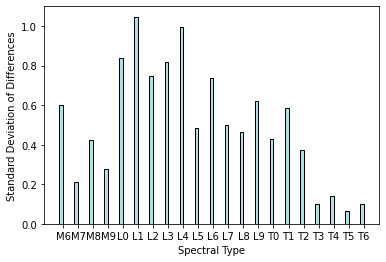

In [480]:
n = 21
r = np.arange(n)
width = 0.25
    
plt.bar(r, sptstdevs, color = 'powderblue',
        width = width, edgecolor = 'black')

plt.xlabel("Spectral Type")
plt.ylabel("Standard Deviation of Differences")
# plt.title("Number of people voted in each year")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, types)
# plt.legend()
plt.savefig('regressorstdevs')
plt.show()

In [555]:
import h5py

spectraldata = 'spectral_templates_data_version_jul26.h5'
df_singles = pd.read_hdf(spectraldata , key = 'singles')
df_singles

,spectral_type,spex_type,opt_type,name,wavegrid,obs_date,system_interpolated_flux,system_interpolated_noise,difference_spectrum
0,M6.0,M6.0,nan,2MASS J16002535-2644060,"[0.90067, 0.904086, 0.907521, 0.910973, 0.9144...",20120608,"[2.6028127865723416e-10, 2.7168700927281424e-1...","[1.6007560244513144e-12, 1.60595768781994e-12,...","[0.008237880884910731, 0.004852942291611706, 0..."
1,d/sdM6.0,M6.0,nan,2MASS J17252029-0024508,"[0.90067, 0.904086, 0.907521, 0.910973, 0.9144...",20030523,"[2.947453597674446e-10, 2.939515927851977e-10,...","[6.599691322235962e-12, 6.821073308310938e-12,...","[0.09272296992074003, 0.09504443939680107, 0.0..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d/sdM5.0,M6.0,nan,WISE J141143.25-452418.3,"[0.90067, 0.904086, 0.907521, 0.910973, 0.9144...",20140504,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.23088117235440464, 0.213956312675757, 0.197..."
4,d/sdM6.0,M6.0,nan,2MASS J19445221-0831036,"[0.90067, 0.904086, 0.907521, 0.910973, 0.9144...",20030917,"[2.351640075913892e-10, 2.492207188240057e-10,...","[6.246176255121872e-12, 6.1255017124242765e-12...","[0.2418255866251302, 0.20048626167716166, 0.16..."
...,...,...,...,...,...,...,...,...,...
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


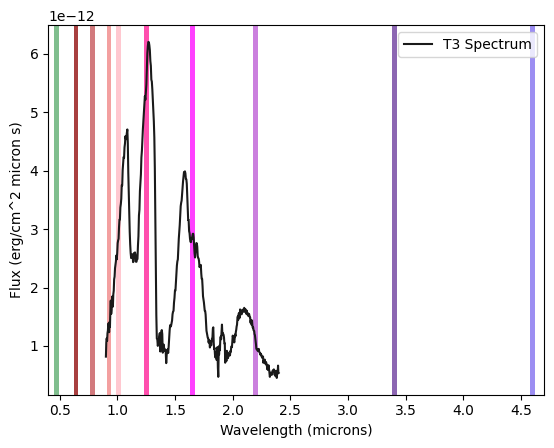

In [596]:
plt.plot(df_singles.iloc[350,4], df_singles.iloc[350,6], color = 'k', label = 'T3 Spectrum')
plt.xlim(0.4, 4.7)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (erg/cm^2 micron s)')
plt.legend()

# for g
plt.axvspan(0.452, 0.492, facecolor='g', alpha=0.75)
# for r
plt.axvspan(0.6215, 0.6615, facecolor='darkred', alpha=0.75)  
# for i
plt.axvspan(0.7635, 0.8035, facecolor='r', alpha=0.75)
# for z
plt.axvspan(0.906, 0.946, facecolor='lightcoral', alpha=0.75)
# for Y
plt.axvspan(0.9895, 1.0295, facecolor='lightpink', alpha=0.75)
# for J
plt.axvspan(1.230, 1.270, facecolor='deeppink', alpha=0.75)
# for H
plt.axvspan(1.630, 1.670, facecolor='magenta', alpha=0.75)
# for Ks
plt.axvspan(2.180, 2.220, facecolor='mediumorchid', alpha=0.75)
# for W1
plt.axvspan(3.380, 3.420, facecolor='rebeccapurple', alpha=0.75)
# for W2
plt.axvspan(4.580, 4.620, facecolor='mediumslateblue', alpha=0.75)

plt.savefig('photometricbands')

In [601]:
# sample search for candidates

radius = 1

ra0 = 0
dec0 = 0

query = """
SELECT ra, dec, wavg_mag_psf_r, wavg_mag_psf_i, wavg_mag_psf_z, wavg_mag_psf_y, wavg_magerr_psf_r, wavg_magerr_psf_i, wavg_magerr_psf_z, wavg_magerr_psf_y
FROM des_dr2.main as dr2,
q3c_dist(ra, dec, {:f}, {:f}) as rdist
    WHERE dr2.EXTENDED_CLASS_COADD <= 1
        AND dr2.IMAFLAGS_ISO_I = 0
        AND dr2.IMAFLAGS_ISO_Z = 0
        AND dr2.FLAGS_I < 4 
        AND dr2.FLAGS_Z < 4
        AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
        order by rdist
""".format(ra0, dec0, ra0, dec0, radius)
response = qc.query(sql=query,format='csv')
des_patch1 = convert(response,'pandas')
des_patch1 = des_patch1[des_patch1.wavg_mag_psf_z != -99]
des_patch1 = des_patch1[des_patch1.wavg_mag_psf_r != -99] 
des_patch1 = des_patch1[des_patch1.wavg_mag_psf_i != -99] 
des_patch1 = des_patch1[des_patch1.wavg_mag_psf_y != -99] 
des_patch1 = des_patch1.rename(columns = {'ra' : 'ra_des', 'dec' : 'dec_des'})
des_patch1 = des_patch1.reset_index(drop = True)

des_patch1

,ra_des,dec_des,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y
0,0.009438,-0.000891,19.406658,18.277266,17.780422,17.655823,0.002174,0.001401,0.001426,0.004696
1,0.002972,-0.009281,23.173183,22.017733,21.584675,21.259579,0.052349,0.026425,0.026517,0.187202
2,0.014557,-0.001539,21.977339,21.429302,21.161358,20.993170,0.017973,0.019059,0.021473,0.121224
3,359.981970,-0.004286,18.387526,18.089079,17.911003,17.893852,0.001147,0.001088,0.001307,0.005201
4,359.980037,0.007888,19.167639,18.786613,18.568806,18.519855,0.001620,0.001631,0.002078,0.009178
...,...,...,...,...,...,...,...,...,...,...
15667,359.391257,0.793308,21.672410,20.557838,20.086067,19.955860,0.009638,0.005474,0.007106,0.030781
15668,0.807775,-0.589417,23.612259,21.939941,21.066195,20.862192,0.124489,0.021799,0.017508,0.053440
15669,359.299602,0.713697,19.217276,19.030685,18.933598,18.933268,0.001630,0.001902,0.002921,0.013974
15670,359.068385,0.363441,19.537235,18.040432,17.388458,17.219418,0.002007,0.000953,0.000858,0.003032


In [602]:
# match contaminants to vista

vista_patch1 = pd.DataFrame()
radius = 0.007

for i in range(len(des_patch1)):
    ra0 = des_patch1.iloc[i, 0] # in degrees, right ascension
    dec0 = des_patch1.iloc[i, 1] # in degrees, declinarion
    query = """
    SELECT ra2000, dec2000, japermag3, ksapermag3, japermag3err, ksapermag3err 
    FROM vhs_dr5.vhs_cat_v3,
    q3c_dist(ra2000, dec2000, {:f}, {:f}) as rdist
    WHERE q3c_radial_query(ra2000, dec2000, {:f}, {:f}, {:f}) 
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_des'] = ra0
    sources['dec_des'] = dec0
    sources['ra_comp'] = (sources['ra2000'] - ra0) * np.cos(dec0 * (np.pi/180))   # difference in right ascension  
    sources['dec_comp'] = sources['dec2000'] - dec0                               # difference in declination
    closestmatch = sources.head(1)
    vista_patch1 = pd.concat([vista_patch1, closestmatch], ignore_index = True) 

vista_patch1

,ra2000,dec2000,japermag3,ksapermag3,japermag3err,ksapermag3err,ra_des,dec_des,ra_comp,dec_comp
0,0.009470,-0.000921,16.389029,15.657798,0.013035,0.015902,0.009438,-0.000891,0.000032,-0.000030
1,0.002970,-0.009265,20.278242,NaN,0.298733,NaN,0.002972,-0.009281,-0.000002,0.000016
2,0.014531,-0.001428,19.856636,NaN,0.148934,NaN,0.014557,-0.001539,-0.000026,0.000111
3,359.981934,-0.004272,16.837265,16.152044,0.014008,0.027042,359.981970,-0.004286,-0.000036,0.000014
4,359.980027,0.007966,17.408325,16.766650,0.019496,0.041953,359.980037,0.007888,-0.000010,0.000078
...,...,...,...,...,...,...,...,...,...,...
15467,359.391248,0.793341,18.681332,18.243551,0.058210,0.158051,359.391257,0.793308,-0.000009,0.000033
15468,0.807782,-0.589315,19.456993,18.564571,0.156911,0.195961,0.807775,-0.589417,0.000007,0.000102
15469,359.299566,0.713725,17.936270,17.584288,0.030234,0.087422,359.299602,0.713697,-0.000036,0.000028
15470,359.068325,0.363488,15.927969,15.127724,0.008597,0.013465,359.068385,0.363441,-0.000060,0.000047


In [603]:
# converting to arc seconds

vista_patch1['dec_comp'] = vista_patch1['dec_comp'].apply(lambda x: x*3600)
vista_patch1['ra_comp'] = vista_patch1['ra_comp'].apply(lambda x: x*3600)

In [604]:
# statistics

vra_comp_array = vista_patch1['ra_comp'].to_numpy()
vdec_comp_array = vista_patch1['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
vra_comp_array = [x for x in vra_comp_array if (x <= 12 and x >= -12)]
vra_comp_array = np.asarray(vra_comp_array)
vdec_comp_array = [x for x in vdec_comp_array  if (x <= 12 and x >= -12)]
vdec_comp_array = np.asarray(vdec_comp_array )

mu_rav1 = vra_comp_array.mean()
mu_decv1 = vdec_comp_array.mean()
sigma_rav1 = vra_comp_array.std()
sigma_decv1 = vdec_comp_array.std()
sigma_posv1 = np.sqrt(sigma_rav1**2 + sigma_decv1**2)

In [605]:
# flag 3 sigma outliers

upper_ra, lower_ra = mu_rav1 + 3*sigma_posv1, mu_rav1 - 3*sigma_posv1
upper_dec, lower_dec = mu_decv1 + 3*sigma_posv1, mu_decv1 - 3*sigma_posv1
sigma_flag = []

for i in range(len(vista_patch1)):
    if vista_patch1.iloc[i, 8] >= upper_ra:
        sigma_flag.append(True)
    elif vista_patch1.iloc[i, 9] >= upper_dec:
        sigma_flag.append(True)
    elif vista_patch1.iloc[i, 8] <= lower_ra:
        sigma_flag.append(True)
    elif vista_patch1.iloc[i, 9] <= lower_dec:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
vista_patch1['sigma_3'] = np.array(sigma_flag)
vista_patch1_3sigma = vista_patch1.loc[vista_patch1['sigma_3']==True]
vista_patch1

,ra2000,dec2000,japermag3,ksapermag3,japermag3err,ksapermag3err,ra_des,dec_des,ra_comp,dec_comp,sigma_3
0,0.009470,-0.000921,16.389029,15.657798,0.013035,0.015902,0.009438,-0.000891,0.116139,-0.108952,False
1,0.002970,-0.009265,20.278242,NaN,0.298733,NaN,0.002972,-0.009281,-0.007017,0.058668,False
2,0.014531,-0.001428,19.856636,NaN,0.148934,NaN,0.014557,-0.001539,-0.095206,0.399758,False
3,359.981934,-0.004272,16.837265,16.152044,0.014008,0.027042,359.981970,-0.004286,-0.128106,0.051993,False
4,359.980027,0.007966,17.408325,16.766650,0.019496,0.041953,359.980037,0.007888,-0.036823,0.282251,False
...,...,...,...,...,...,...,...,...,...,...,...
15467,359.391248,0.793341,18.681332,18.243551,0.058210,0.158051,359.391257,0.793308,-0.032082,0.120339,False
15468,0.807782,-0.589315,19.456993,18.564571,0.156911,0.195961,0.807775,-0.589417,0.025730,0.365586,False
15469,359.299566,0.713725,17.936270,17.584288,0.030234,0.087422,359.299602,0.713697,-0.131267,0.102533,False
15470,359.068325,0.363488,15.927969,15.127724,0.008597,0.013465,359.068385,0.363441,-0.214386,0.170037,False


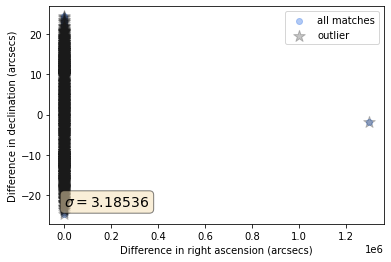

In [606]:
# difference between coordinates of vista and des for patch 1 candidate search

textstr = ''r'$\sigma=%.5f$' % (sigma_posv1, )

plt.scatter(vista_patch1['ra_comp'], vista_patch1['dec_comp'], alpha = 0.5, color = 'cornflowerblue', label = 'all matches')
plt.scatter(vista_patch1_3sigma['ra_comp'], vista_patch1_3sigma['dec_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(-25, -20, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.savefig('coordaccuracyvistadespatch1.png')

In [610]:
# match contaminants to catwise

cat_patch1 = pd.DataFrame()
radius = 0.007

for i in range(len(des_patch1)):
    ra0 = des_patch1.iloc[i, 0] # in degrees, right ascension
    dec0 = des_patch1.iloc[i, 1] # in degrees, declinarion
    query = """
    SELECT ra, dec, w1mpro, w2mpro, w1sigmpro, w2sigmpro, pmra, pmdec
    FROM catwise2020.main,
    q3c_dist(ra, dec, {:f}, {:f}) as rdist
    WHERE cc_flags = '0000'
    AND ab_flags = '00'
    AND q3c_radial_query(ra,dec,{:f},{:f},{:f})
    order by rdist
    """.format(ra0, dec0, ra0, dec0, radius)
    response = qc.query(sql=query,format='csv')
    sources = convert(response,'pandas')
    sources['ra_des'] = ra0
    sources['dec_des'] = dec0
    sources['ra_comp'] = (sources['ra'] - ra0) * np.cos(dec0 * (np.pi/180))   # difference in right ascension
    sources['dec_comp'] = sources['dec'] - dec0                               # difference in declination
    closestmatch = sources.head(1)
    cat_patch1 = pd.concat([cat_patch1, closestmatch], ignore_index = True) 

cat_patch1

,ra,dec,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,ra_des,dec_des,ra_comp,dec_comp
0,0.009433,-0.000871,15.570,15.469,0.023,0.043,0.00603,-0.07467,0.009438,-0.000891,-0.000005,0.000020
1,0.005504,-0.003232,17.119,16.728,0.061,0.131,0.08602,-0.02158,0.002972,-0.009281,0.002532,0.006049
2,0.015349,0.002541,16.433,16.180,0.036,0.075,-0.02163,-0.02874,0.014557,-0.001539,0.000792,0.004080
3,359.981999,-0.004264,16.094,16.216,0.029,0.082,0.10794,-0.01862,359.981970,-0.004286,0.000029,0.000022
4,359.980042,0.007923,16.833,16.736,0.048,0.130,0.11792,0.02204,359.980037,0.007888,0.000005,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...
14913,359.391040,0.793297,17.825,17.145,0.106,0.197,-0.12243,0.10900,359.391257,0.793308,-0.000216,-0.000011
14914,0.807837,-0.589046,18.365,17.798,0.180,NaN,-0.06835,-0.16081,0.807775,-0.589417,0.000062,0.000371
14915,359.299178,0.713706,17.315,17.280,0.070,0.207,-0.27649,0.03792,359.299602,0.713697,-0.000424,0.000009
14916,359.068355,0.363446,14.982,14.823,0.017,0.026,0.07484,-0.01873,359.068385,0.363441,-0.000030,0.000005


In [611]:
# converting to arc seconds

cat_patch1['dec_comp'] = cat_patch1['dec_comp'].apply(lambda x: x*3600)
cat_patch1['ra_comp'] = cat_patch1['ra_comp'].apply(lambda x: x*3600)

In [612]:
# statistics

cra_comp_array = cat_contam['ra_comp'].to_numpy()
cdec_comp_array = cat_contam['dec_comp'].to_numpy()

# manually get rid of outliers: +/- 12 arcseconds
cra_comp_array = [x for x in cra_comp_array if (x <= 12 and x >= -12)]
cra_comp_array = np.asarray(cra_comp_array)
cdec_comp_array = [x for x in cdec_comp_array  if (x <= 12 and x >= -12)]
cdec_comp_array = np.asarray(cdec_comp_array )

mu_rac1 = cra_comp_array.mean()
mu_decc1 = cdec_comp_array.mean()
sigma_rac1 = cra_comp_array.std()
sigma_decc1 = cdec_comp_array.std()
sigma_posc1 = np.sqrt(sigma_rac1**2 + sigma_decc1**2)

In [613]:
# flag 3 sigma outliers

upper_ra, lower_ra = mu_rac1 + 3*sigma_posc1, mu_rac1 - 3*sigma_posc1
upper_dec, lower_dec = mu_decc1 + 3*sigma_posc1, mu_decc1 - 3*sigma_posc1
sigma_flag = []

for i in range(len(cat_patch1)):
    if cat_patch1.iloc[i, 10] >= upper_ra:
        sigma_flag.append(True)
    elif cat_patch1.iloc[i, 11] >= upper_dec:
        sigma_flag.append(True)
    elif cat_patch1.iloc[i, 10] <= lower_ra:
        sigma_flag.append(True)
    elif cat_patch1.iloc[i, 11] <= lower_dec:
        sigma_flag.append(True)
    else:
        sigma_flag.append(False)
cat_patch1['sigma_3'] = np.array(sigma_flag)
cat_patch1_3sigma = cat_patch1.loc[cat_patch1['sigma_3']==True]
cat_patch1

,ra,dec,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,ra_des,dec_des,ra_comp,dec_comp,sigma_3
0,0.009433,-0.000871,15.570,15.469,0.023,0.043,0.00603,-0.07467,0.009438,-0.000891,-0.019080,0.07236,False
1,0.005504,-0.003232,17.119,16.728,0.061,0.131,0.08602,-0.02158,0.002972,-0.009281,9.114120,21.77496,True
2,0.015349,0.002541,16.433,16.180,0.036,0.075,-0.02163,-0.02874,0.014557,-0.001539,2.851560,14.68692,False
3,359.981999,-0.004264,16.094,16.216,0.029,0.082,0.10794,-0.01862,359.981970,-0.004286,0.104400,0.07956,False
4,359.980042,0.007923,16.833,16.736,0.048,0.130,0.11792,0.02204,359.980037,0.007888,0.018720,0.12456,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14913,359.391040,0.793297,17.825,17.145,0.106,0.197,-0.12243,0.10900,359.391257,0.793308,-0.779325,-0.03816,False
14914,0.807837,-0.589046,18.365,17.798,0.180,NaN,-0.06835,-0.16081,0.807775,-0.589417,0.223188,1.33632,False
14915,359.299178,0.713706,17.315,17.280,0.070,0.207,-0.27649,0.03792,359.299602,0.713697,-1.527002,0.03348,False
14916,359.068355,0.363446,14.982,14.823,0.017,0.026,0.07484,-0.01873,359.068385,0.363441,-0.107278,0.01692,False


In [620]:
len(cat_patch1_3sigma)

794

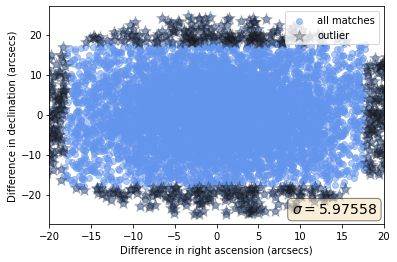

In [617]:
# difference between coordinates of catwise and des for patch 1 candidate search

textstr = ''r'$\sigma=%.5f$' % (sigma_posc1, )

plt.scatter(cat_patch1['ra_comp'], cat_patch1['dec_comp'], alpha = 0.5, color = 'cornflowerblue', label = 'all matches')
plt.scatter(cat_patch1_3sigma['ra_comp'], cat_patch1_3sigma['dec_comp'], 150, alpha = 0.25, \
           color = 'k', marker= '*', label = 'outlier')
plt.ylabel('Difference in declination (arcsecs)')
plt.xlabel('Difference in right ascension (arcsecs)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(9, -22, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.legend()
plt.xlim(-20, 20)
plt.savefig('coordaccuracycatdespatch1.png')

In [621]:
# create full patch 1

patch1 =  pd.merge(pd.merge(des_patch1, vista_patch1, on = 'ra_des'), cat_patch1, on = 'ra_des')
patch1

,ra_des,dec_des_x,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,wavg_magerr_psf_r,wavg_magerr_psf_i,wavg_magerr_psf_z,wavg_magerr_psf_y,...,w1mpro,w2mpro,w1sigmpro,w2sigmpro,pmra,pmdec,dec_des,ra_comp_y,dec_comp_y,sigma_3_y
0,0.009438,-0.000891,19.406658,18.277266,17.780422,17.655823,0.002174,0.001401,0.001426,0.004696,...,15.570,15.469,0.023,0.043,0.00603,-0.07467,-0.000891,-0.019080,0.07236,False
1,0.002972,-0.009281,23.173183,22.017733,21.584675,21.259579,0.052349,0.026425,0.026517,0.187202,...,17.119,16.728,0.061,0.131,0.08602,-0.02158,-0.009281,9.114120,21.77496,True
2,0.014557,-0.001539,21.977339,21.429302,21.161358,20.993170,0.017973,0.019059,0.021473,0.121224,...,16.433,16.180,0.036,0.075,-0.02163,-0.02874,-0.001539,2.851560,14.68692,False
3,359.981970,-0.004286,18.387526,18.089079,17.911003,17.893852,0.001147,0.001088,0.001307,0.005201,...,16.094,16.216,0.029,0.082,0.10794,-0.01862,-0.004286,0.104400,0.07956,False
4,359.980037,0.007888,19.167639,18.786613,18.568806,18.519855,0.001620,0.001631,0.002078,0.009178,...,16.833,16.736,0.048,0.130,0.11792,0.02204,0.007888,0.018720,0.12456,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15125,359.391257,0.793308,21.672410,20.557838,20.086067,19.955860,0.009638,0.005474,0.007106,0.030781,...,17.825,17.145,0.106,0.197,-0.12243,0.10900,0.793308,-0.779325,-0.03816,False
15126,0.807775,-0.589417,23.612259,21.939941,21.066195,20.862192,0.124489,0.021799,0.017508,0.053440,...,18.365,17.798,0.180,NaN,-0.06835,-0.16081,-0.589417,0.223188,1.33632,False
15127,359.299602,0.713697,19.217276,19.030685,18.933598,18.933268,0.001630,0.001902,0.002921,0.013974,...,17.315,17.280,0.070,0.207,-0.27649,0.03792,0.713697,-1.527002,0.03348,False
15128,359.068385,0.363441,19.537235,18.040432,17.388458,17.219418,0.002007,0.000953,0.000858,0.003032,...,14.982,14.823,0.017,0.026,0.07484,-0.01873,0.363441,-0.107278,0.01692,False


In [622]:
# remove outliers

patch1 = patch1.loc[patch1['sigma_3_x']==False]
patch1 = patch1.loc[patch1['sigma_3_y']==False]
len(patch1)

13184

In [623]:
patch1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 0 to 15129
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ra_des             13184 non-null  float64
 1   dec_des_x          13184 non-null  float64
 2   wavg_mag_psf_r     13184 non-null  float64
 3   wavg_mag_psf_i     13184 non-null  float64
 4   wavg_mag_psf_z     13184 non-null  float64
 5   wavg_mag_psf_y     13184 non-null  float64
 6   wavg_magerr_psf_r  13184 non-null  float64
 7   wavg_magerr_psf_i  13184 non-null  float64
 8   wavg_magerr_psf_z  13184 non-null  float64
 9   wavg_magerr_psf_y  13184 non-null  float64
 10  ra2000             13184 non-null  float64
 11  dec2000            13184 non-null  float64
 12  japermag3          12845 non-null  float64
 13  ksapermag3         10311 non-null  float64
 14  japermag3err       12845 non-null  float64
 15  ksapermag3err      10311 non-null  float64
 16  dec_des_y          131

In [ ]:
patch1 = patch1.dropna()
len(patch1)

In [637]:
# get just photometry in order to make color dataframe

patch1_color = patch1[['wavg_mag_psf_r', 'wavg_mag_psf_i', 'wavg_mag_psf_z', 'wavg_mag_psf_y', 'japermag3', 'ksapermag3',\
                       'w1mpro', 'w2mpro']].copy()
patch1_color

,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro
0,19.406658,18.277266,17.780422,17.655823,16.389029,15.657798,15.570,15.469
2,21.977339,21.429302,21.161358,20.993170,19.856636,NaN,16.433,16.180
3,18.387526,18.089079,17.911003,17.893852,16.837265,16.152044,16.094,16.216
4,19.167639,18.786613,18.568806,18.519855,17.408325,16.766650,16.833,16.736
5,20.326790,19.468105,19.058994,18.990072,17.911340,17.093748,16.947,17.228
...,...,...,...,...,...,...,...,...
15125,21.672410,20.557838,20.086067,19.955860,18.681332,18.243551,17.825,17.145
15126,23.612259,21.939941,21.066195,20.862192,19.456993,18.564571,18.365,17.798
15127,19.217276,19.030685,18.933598,18.933268,17.936270,17.584288,17.315,17.280
15128,19.537235,18.040432,17.388458,17.219418,15.927969,15.127724,14.982,14.823


In [638]:
patch1_color = patch1_color.dropna()
patch1_color = patch1_color.reset_index(drop = True)
patch1_color

,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro
0,19.406658,18.277266,17.780422,17.655823,16.389029,15.657798,15.570,15.469
1,18.387526,18.089079,17.911003,17.893852,16.837265,16.152044,16.094,16.216
2,19.167639,18.786613,18.568806,18.519855,17.408325,16.766650,16.833,16.736
3,20.326790,19.468105,19.058994,18.990072,17.911340,17.093748,16.947,17.228
4,17.293468,17.067337,16.939436,16.927132,15.913307,15.320703,15.222,15.470
...,...,...,...,...,...,...,...,...
10046,21.672410,20.557838,20.086067,19.955860,18.681332,18.243551,17.825,17.145
10047,23.612259,21.939941,21.066195,20.862192,19.456993,18.564571,18.365,17.798
10048,19.217276,19.030685,18.933598,18.933268,17.936270,17.584288,17.315,17.280
10049,19.537235,18.040432,17.388458,17.219418,15.927969,15.127724,14.982,14.823


In [639]:
for i in range(len(patch1_color.columns)):
    for j in range(0, 8): 
        if i != j and i < j:
            patch1_color[patch1_color.columns[i] + '_' + patch1_color.columns[j]] = patch1_color.iloc[:, i] - patch1_color.iloc[:, j]

patch1_color

,wavg_mag_psf_r,wavg_mag_psf_i,wavg_mag_psf_z,wavg_mag_psf_y,japermag3,ksapermag3,w1mpro,w2mpro,wavg_mag_psf_r_wavg_mag_psf_i,wavg_mag_psf_r_wavg_mag_psf_z,...,wavg_mag_psf_y_japermag3,wavg_mag_psf_y_ksapermag3,wavg_mag_psf_y_w1mpro,wavg_mag_psf_y_w2mpro,japermag3_ksapermag3,japermag3_w1mpro,japermag3_w2mpro,ksapermag3_w1mpro,ksapermag3_w2mpro,w1mpro_w2mpro
0,19.406658,18.277266,17.780422,17.655823,16.389029,15.657798,15.570,15.469,1.129392,1.626236,...,1.266794,1.998025,2.085823,2.186823,0.731231,0.819029,0.920029,0.087798,0.188798,0.101
1,18.387526,18.089079,17.911003,17.893852,16.837265,16.152044,16.094,16.216,0.298447,0.476523,...,1.056587,1.741808,1.799852,1.677852,0.685221,0.743265,0.621265,0.058044,-0.063956,-0.122
2,19.167639,18.786613,18.568806,18.519855,17.408325,16.766650,16.833,16.736,0.381026,0.598833,...,1.111530,1.753205,1.686855,1.783855,0.641675,0.575325,0.672325,-0.066350,0.030650,0.097
3,20.326790,19.468105,19.058994,18.990072,17.911340,17.093748,16.947,17.228,0.858685,1.267796,...,1.078732,1.896324,2.043072,1.762072,0.817592,0.964340,0.683340,0.146748,-0.134252,-0.281
4,17.293468,17.067337,16.939436,16.927132,15.913307,15.320703,15.222,15.470,0.226131,0.354032,...,1.013825,1.606429,1.705132,1.457132,0.592604,0.691307,0.443307,0.098703,-0.149297,-0.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,21.672410,20.557838,20.086067,19.955860,18.681332,18.243551,17.825,17.145,1.114572,1.586343,...,1.274528,1.712309,2.130860,2.810860,0.437781,0.856332,1.536332,0.418551,1.098551,0.680
10047,23.612259,21.939941,21.066195,20.862192,19.456993,18.564571,18.365,17.798,1.672318,2.546064,...,1.405199,2.297621,2.497192,3.064192,0.892422,1.091993,1.658993,0.199571,0.766571,0.567
10048,19.217276,19.030685,18.933598,18.933268,17.936270,17.584288,17.315,17.280,0.186591,0.283678,...,0.996998,1.348980,1.618268,1.653268,0.351982,0.621270,0.656270,0.269288,0.304288,0.035
10049,19.537235,18.040432,17.388458,17.219418,15.927969,15.127724,14.982,14.823,1.496803,2.148777,...,1.291449,2.091694,2.237418,2.396418,0.800245,0.945969,1.104969,0.145724,0.304724,0.159


In [640]:
patch1_colorrf = patch1_color.iloc[:, 8:]
patch1_colorrf

,wavg_mag_psf_r_wavg_mag_psf_i,wavg_mag_psf_r_wavg_mag_psf_z,wavg_mag_psf_r_wavg_mag_psf_y,wavg_mag_psf_r_japermag3,wavg_mag_psf_r_ksapermag3,wavg_mag_psf_r_w1mpro,wavg_mag_psf_r_w2mpro,wavg_mag_psf_i_wavg_mag_psf_z,wavg_mag_psf_i_wavg_mag_psf_y,wavg_mag_psf_i_japermag3,...,wavg_mag_psf_y_japermag3,wavg_mag_psf_y_ksapermag3,wavg_mag_psf_y_w1mpro,wavg_mag_psf_y_w2mpro,japermag3_ksapermag3,japermag3_w1mpro,japermag3_w2mpro,ksapermag3_w1mpro,ksapermag3_w2mpro,w1mpro_w2mpro
0,1.129392,1.626236,1.750835,3.017629,3.748860,3.836658,3.937658,0.496844,0.621443,1.888237,...,1.266794,1.998025,2.085823,2.186823,0.731231,0.819029,0.920029,0.087798,0.188798,0.101
1,0.298447,0.476523,0.493674,1.550261,2.235482,2.293526,2.171526,0.178076,0.195227,1.251814,...,1.056587,1.741808,1.799852,1.677852,0.685221,0.743265,0.621265,0.058044,-0.063956,-0.122
2,0.381026,0.598833,0.647784,1.759314,2.400989,2.334639,2.431639,0.217807,0.266758,1.378288,...,1.111530,1.753205,1.686855,1.783855,0.641675,0.575325,0.672325,-0.066350,0.030650,0.097
3,0.858685,1.267796,1.336718,2.415450,3.233042,3.379790,3.098790,0.409111,0.478033,1.556765,...,1.078732,1.896324,2.043072,1.762072,0.817592,0.964340,0.683340,0.146748,-0.134252,-0.281
4,0.226131,0.354032,0.366336,1.380161,1.972765,2.071468,1.823468,0.127901,0.140205,1.154030,...,1.013825,1.606429,1.705132,1.457132,0.592604,0.691307,0.443307,0.098703,-0.149297,-0.248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,1.114572,1.586343,1.716550,2.991078,3.428859,3.847410,4.527410,0.471771,0.601978,1.876506,...,1.274528,1.712309,2.130860,2.810860,0.437781,0.856332,1.536332,0.418551,1.098551,0.680
10047,1.672318,2.546064,2.750067,4.155266,5.047688,5.247259,5.814259,0.873746,1.077749,2.482948,...,1.405199,2.297621,2.497192,3.064192,0.892422,1.091993,1.658993,0.199571,0.766571,0.567
10048,0.186591,0.283678,0.284008,1.281006,1.632988,1.902276,1.937276,0.097087,0.097417,1.094415,...,0.996998,1.348980,1.618268,1.653268,0.351982,0.621270,0.656270,0.269288,0.304288,0.035
10049,1.496803,2.148777,2.317817,3.609266,4.409511,4.555235,4.714235,0.651974,0.821014,2.112463,...,1.291449,2.091694,2.237418,2.396418,0.800245,0.945969,1.104969,0.145724,0.304724,0.159


In [641]:
# predicting patch 1

patch1_preds = RF_model3.predict(patch1_colorrf)

patch1_results = patch1_colorrf.copy()
patch1_results['pred_label'] = patch1_preds.tolist()
patch1_ucds = patch1_results.loc[patch1_results['pred_label']==1]
len(patch1_ucds)

92